In [5]:
import os
from os import path
import shutil
import pandas as pd
from matplotlib import pyplot as plt

Fetching all the trace files and storing them in Two variables. One of them include trace files of Simulation for Linear movement, while the other variable include trace files of Real robot.

In [18]:
# Fetch all regular motion files
target_path_1 = '../Traces_Real/Linear_new'
target_path_2 = '../Traces_Simulation/Linear_new'

root_path = './'
fileNames_1 = os.listdir(target_path_1)
fileNames_2 = os.listdir(target_path_2)

fileNames_Linear_Real = [file for file in fileNames_1 if 'KRCIpo.csv' in file]
fileNames_Linear_Sim = [file for file in fileNames_2 if 'KRCIpo.csv' in file]

for file in fileNames_Linear_Real:
    shutil.copy(path.join(target_path_1, file), root_path)

for file in fileNames_Linear_Sim:
    shutil.copy(path.join(target_path_2, file), root_path)


Plot comparison of Cartesian coordinates for Real robot and simulation

Quadrilaterl -  1


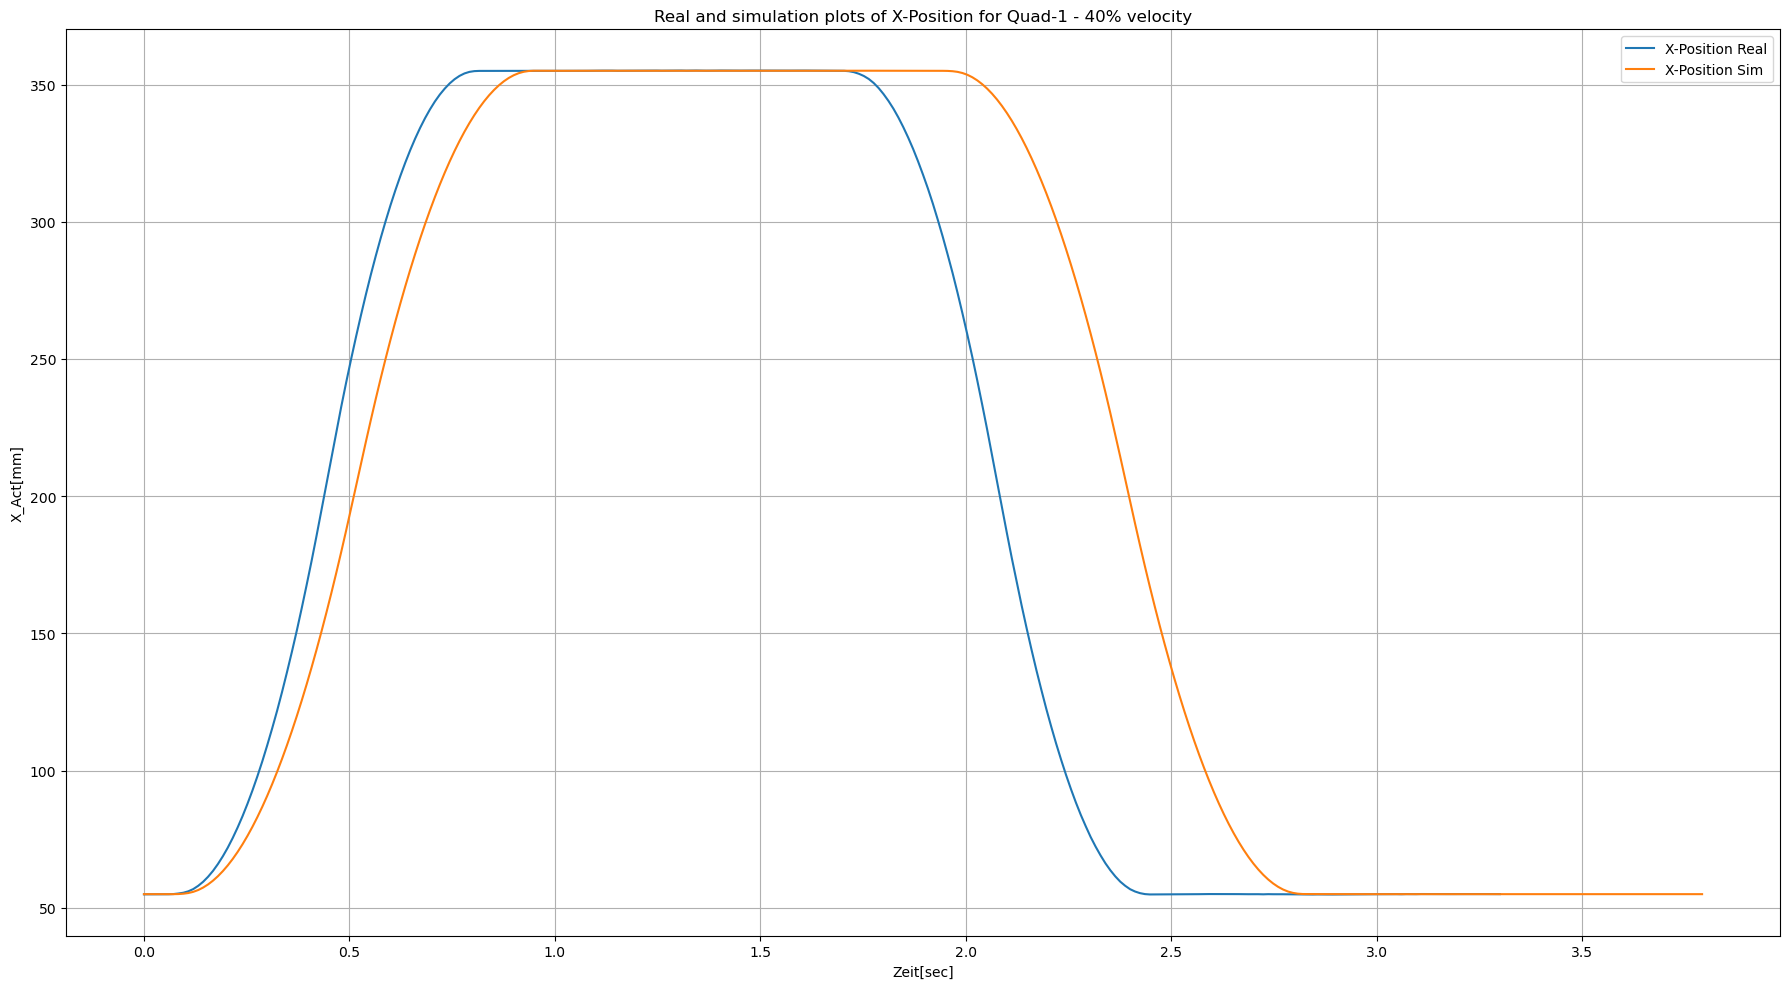

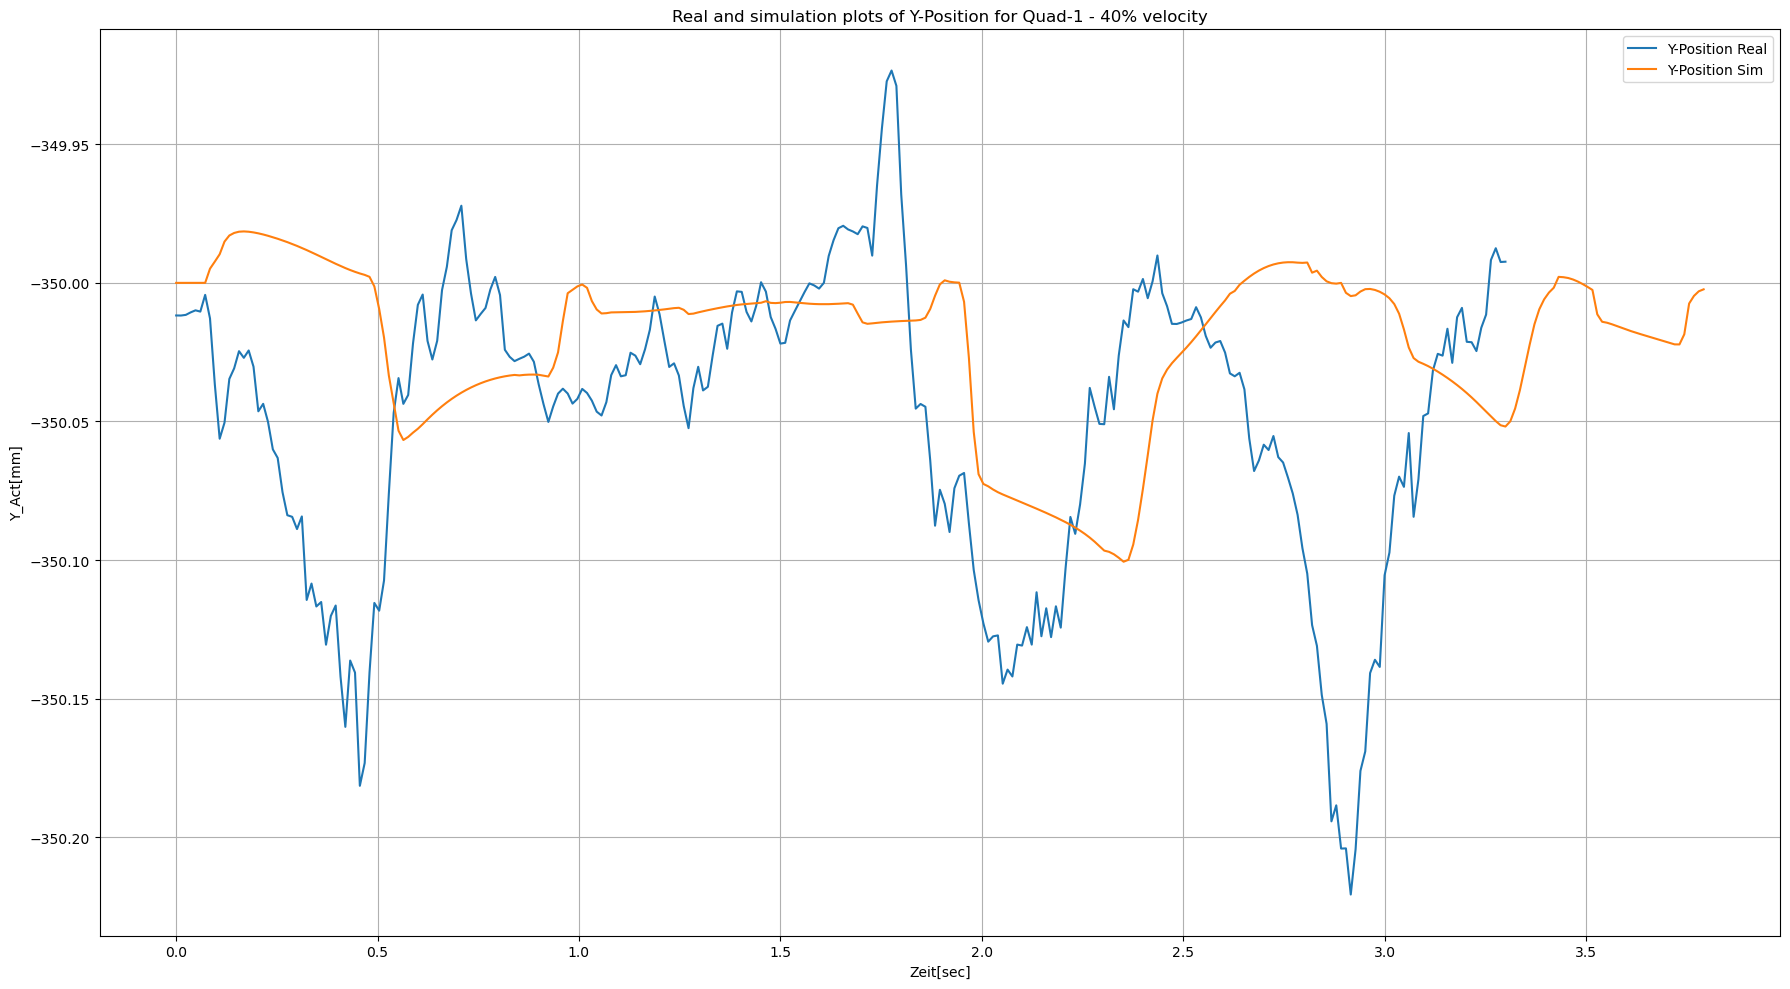

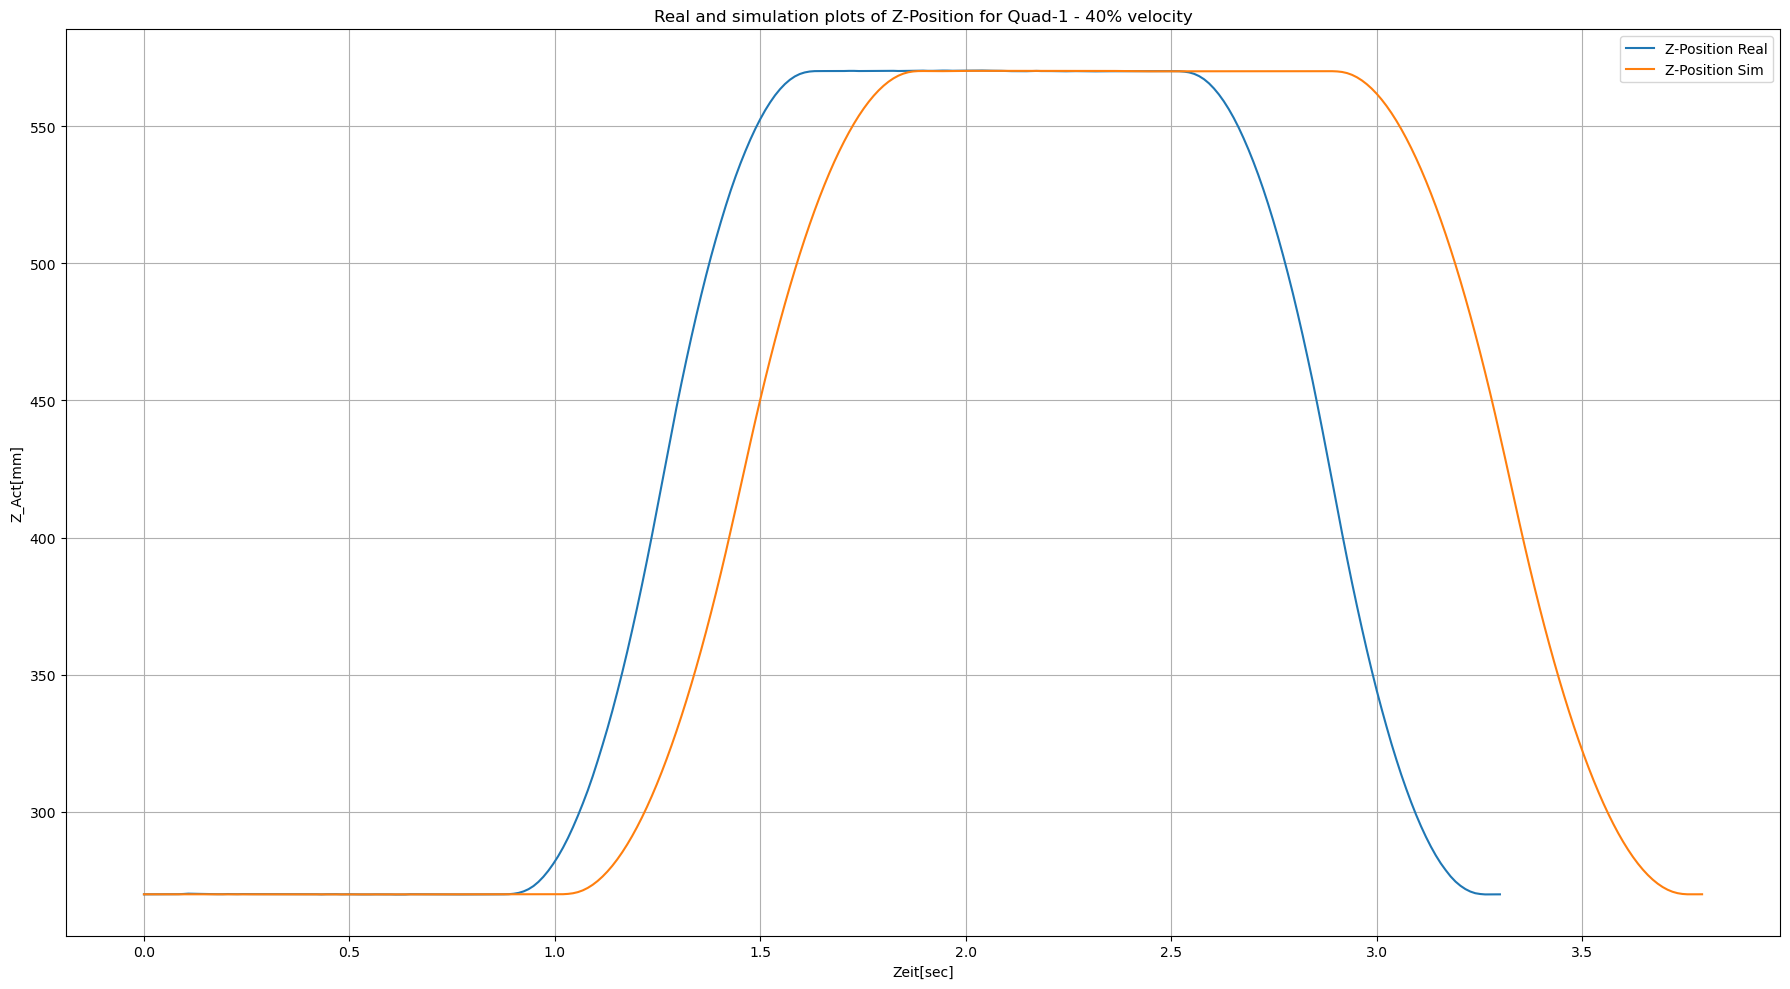

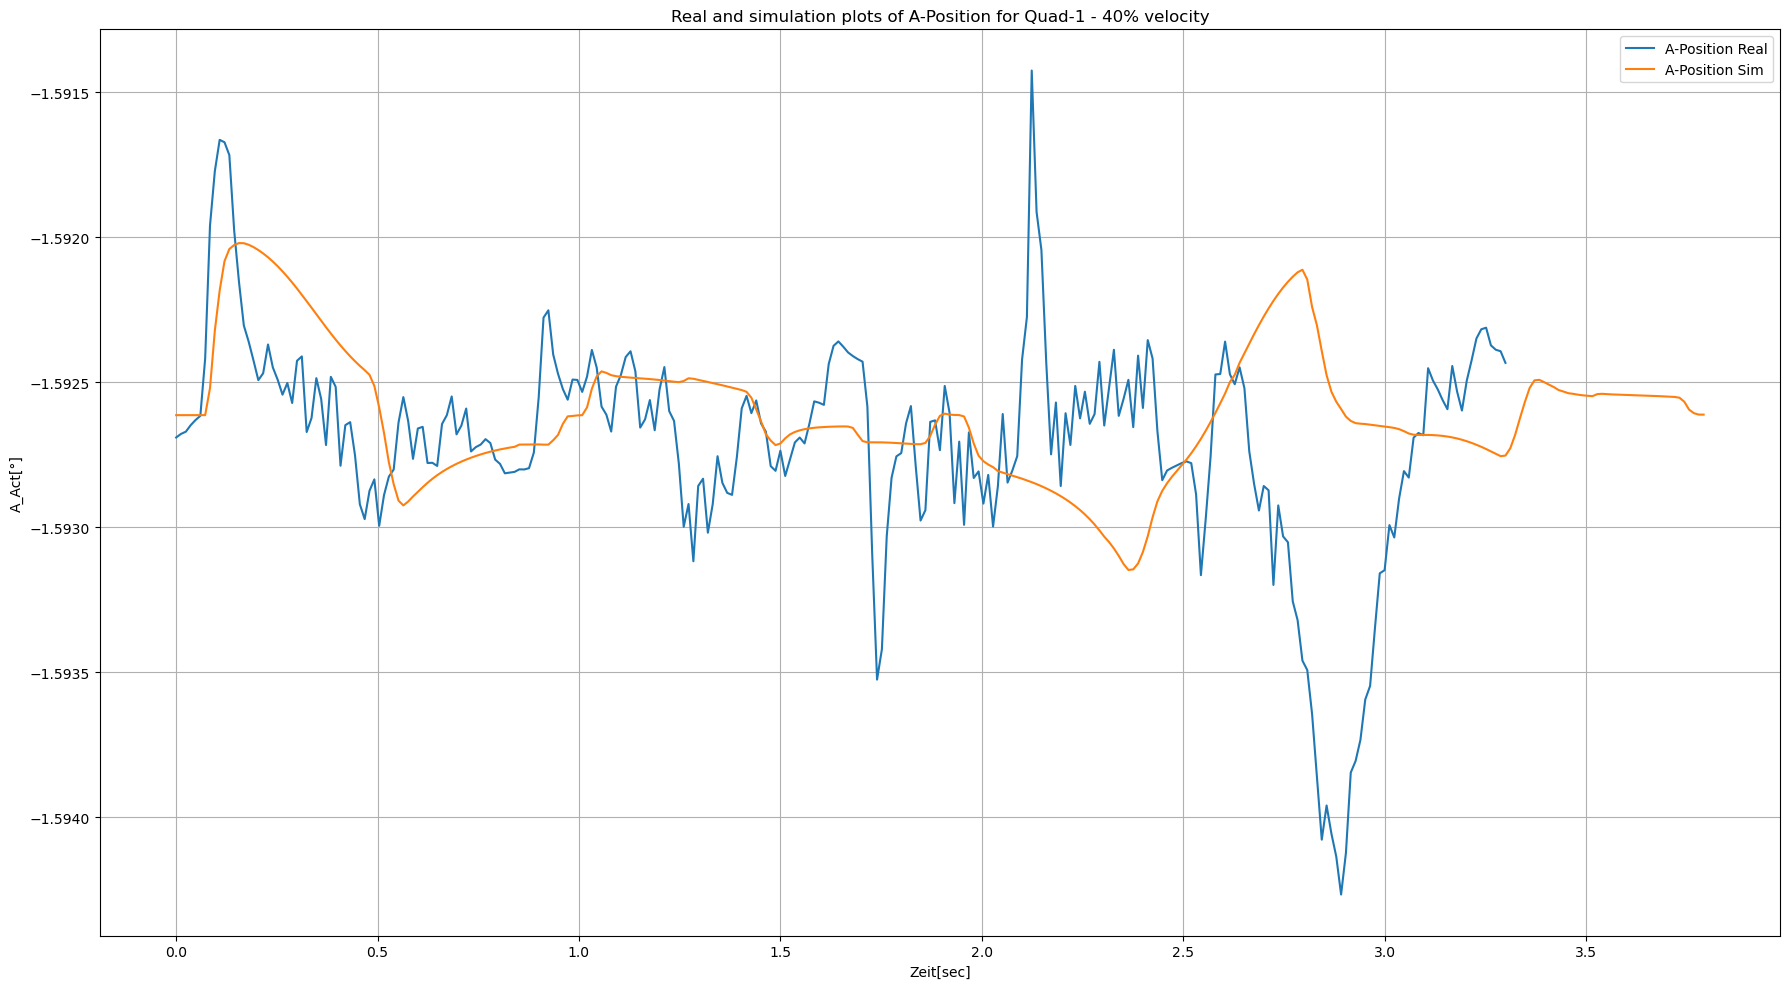

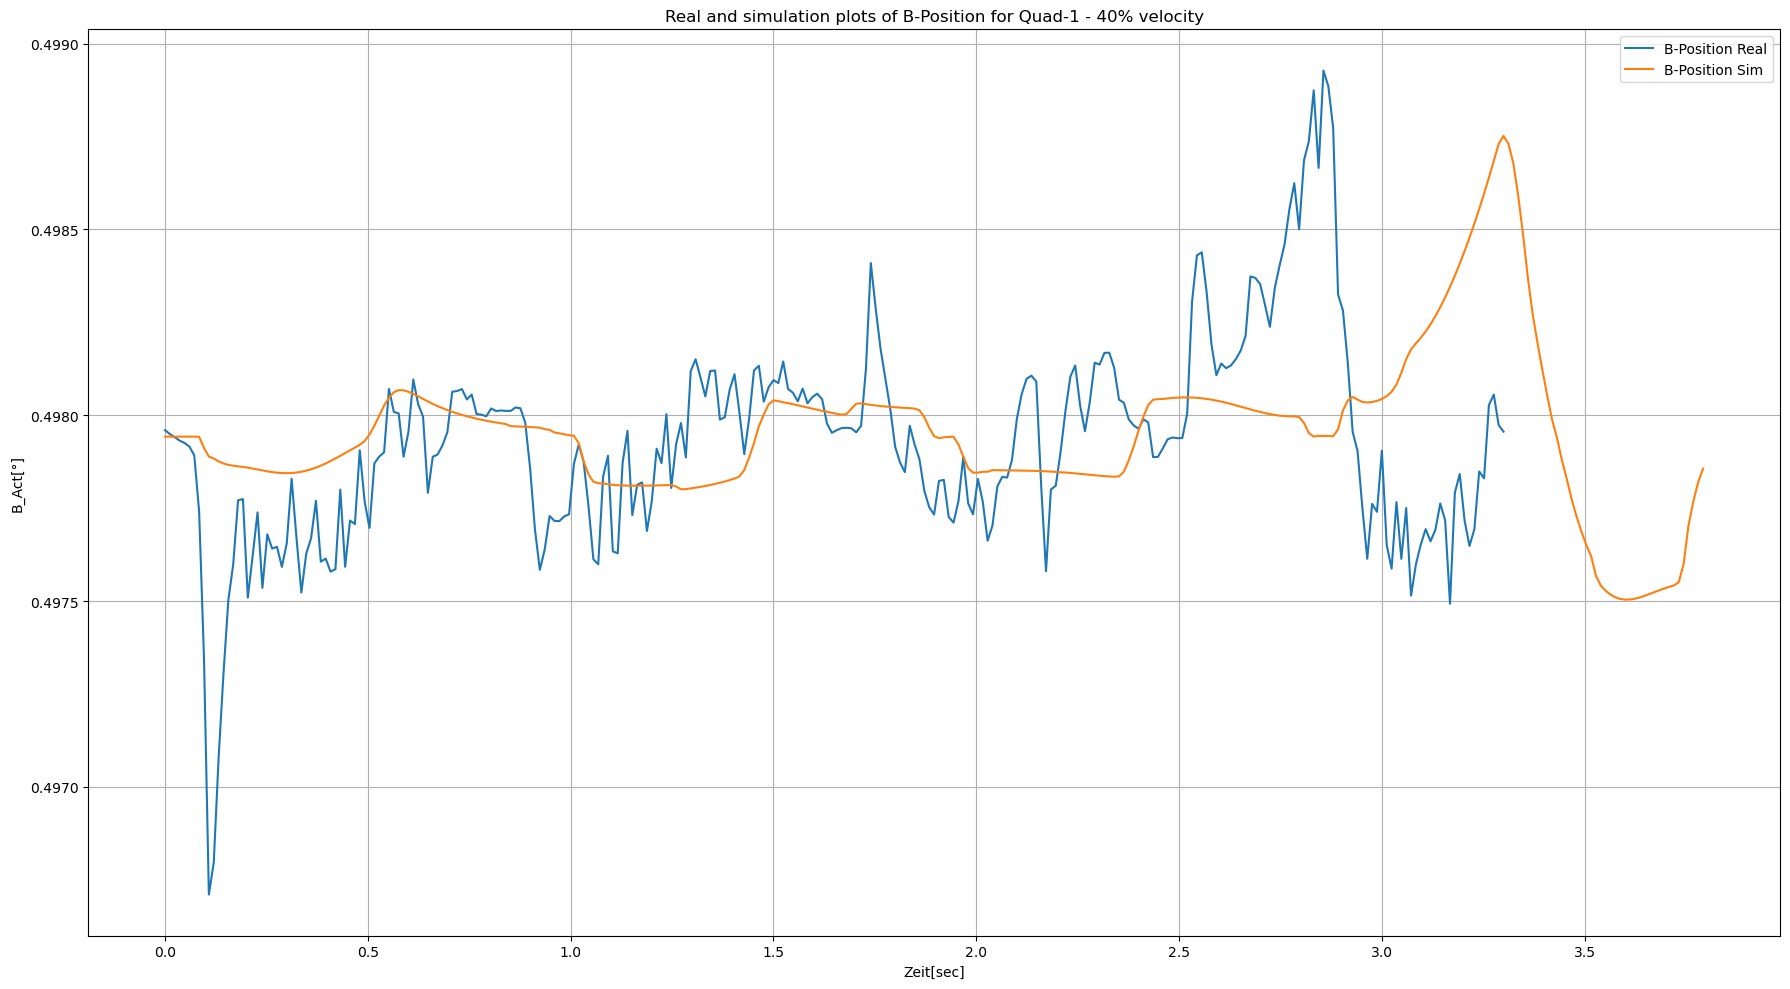

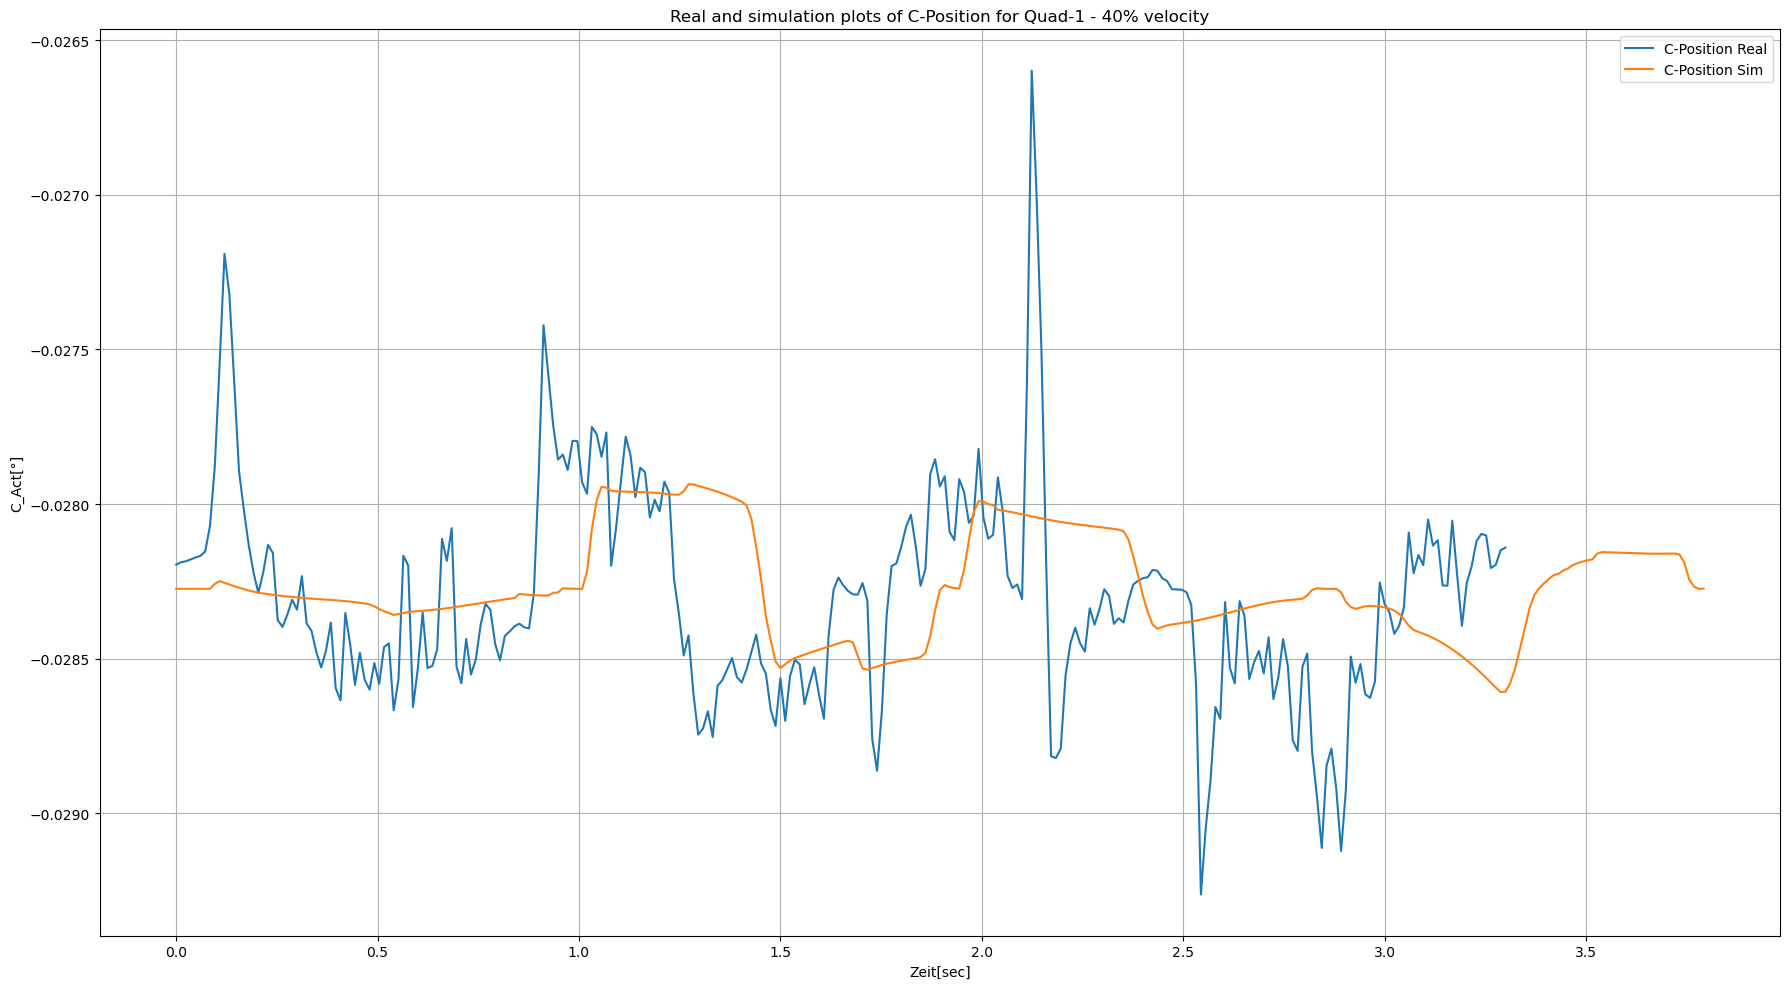

Quadrilaterl -  2


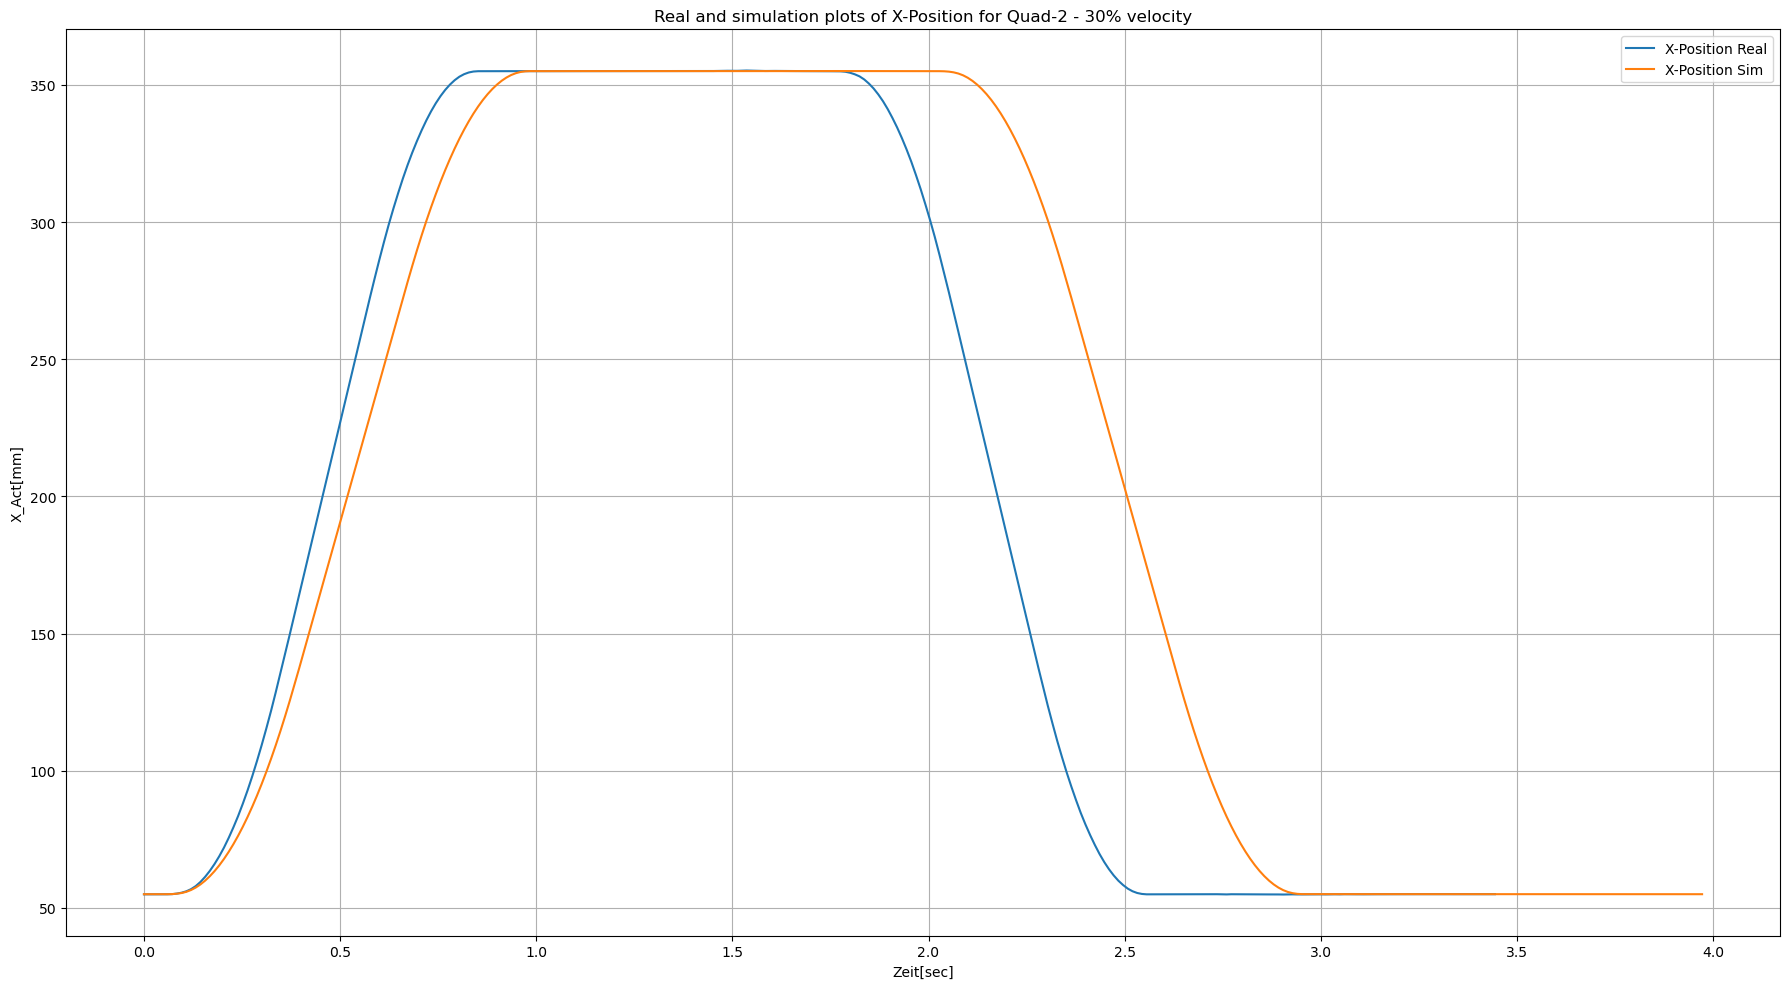

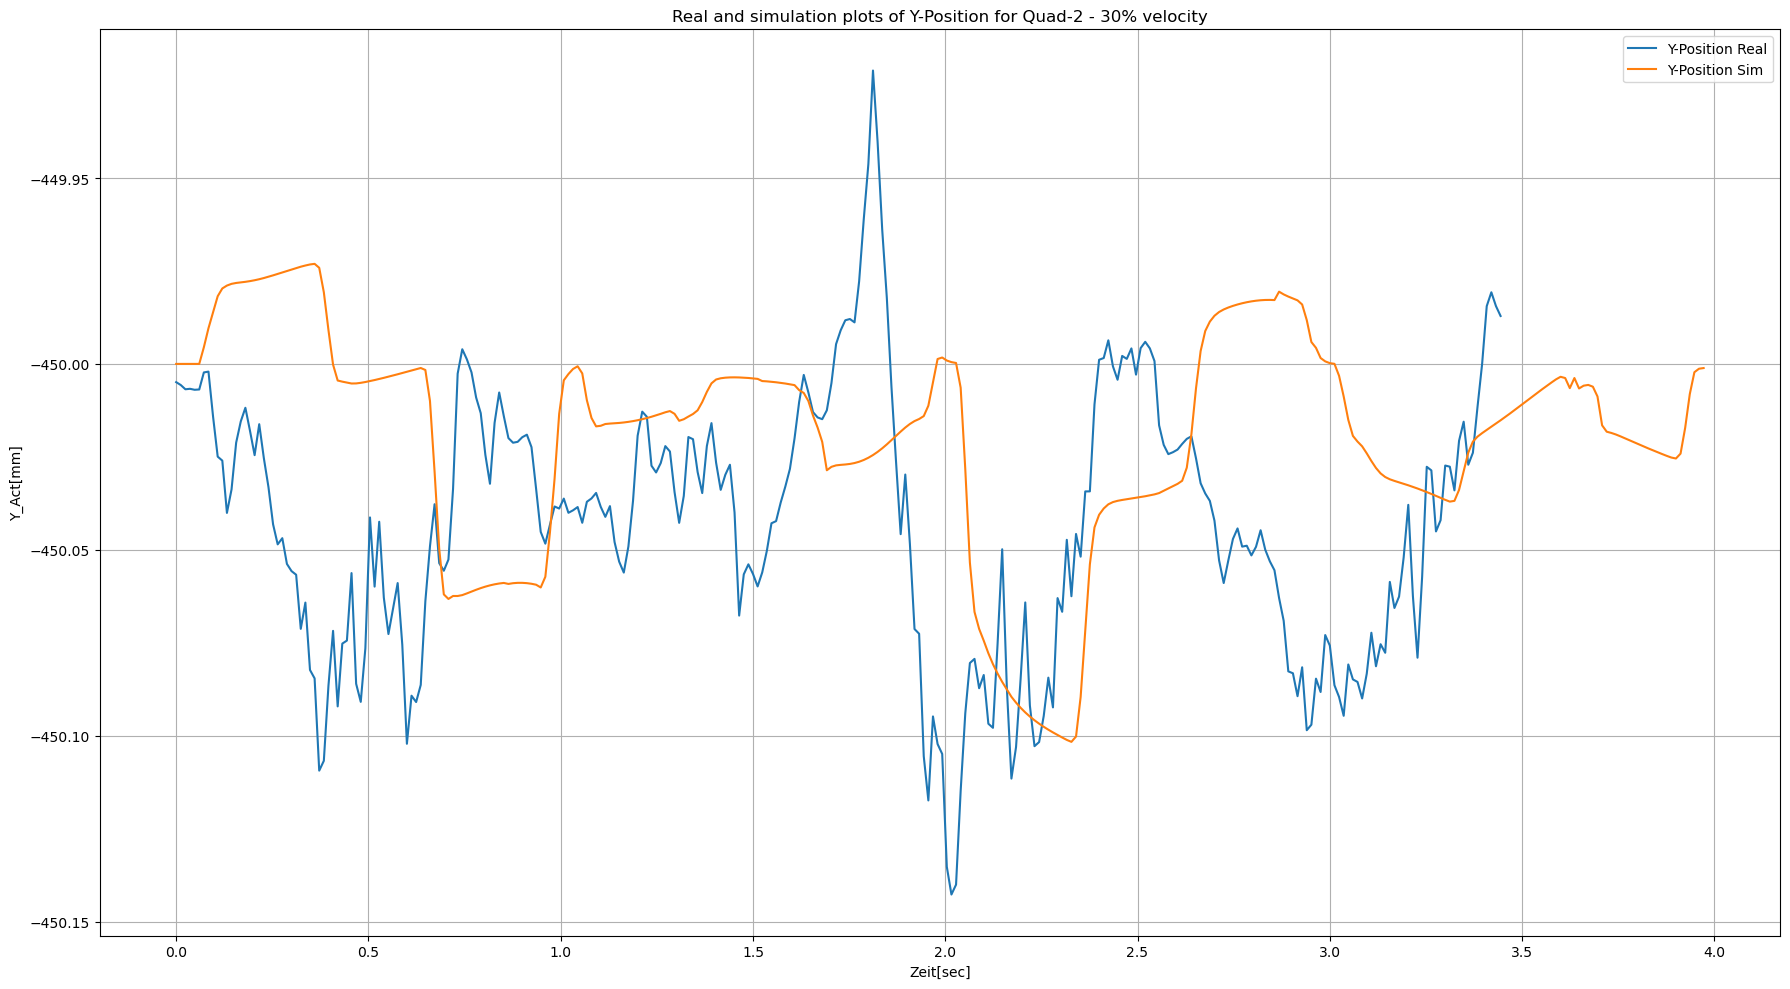

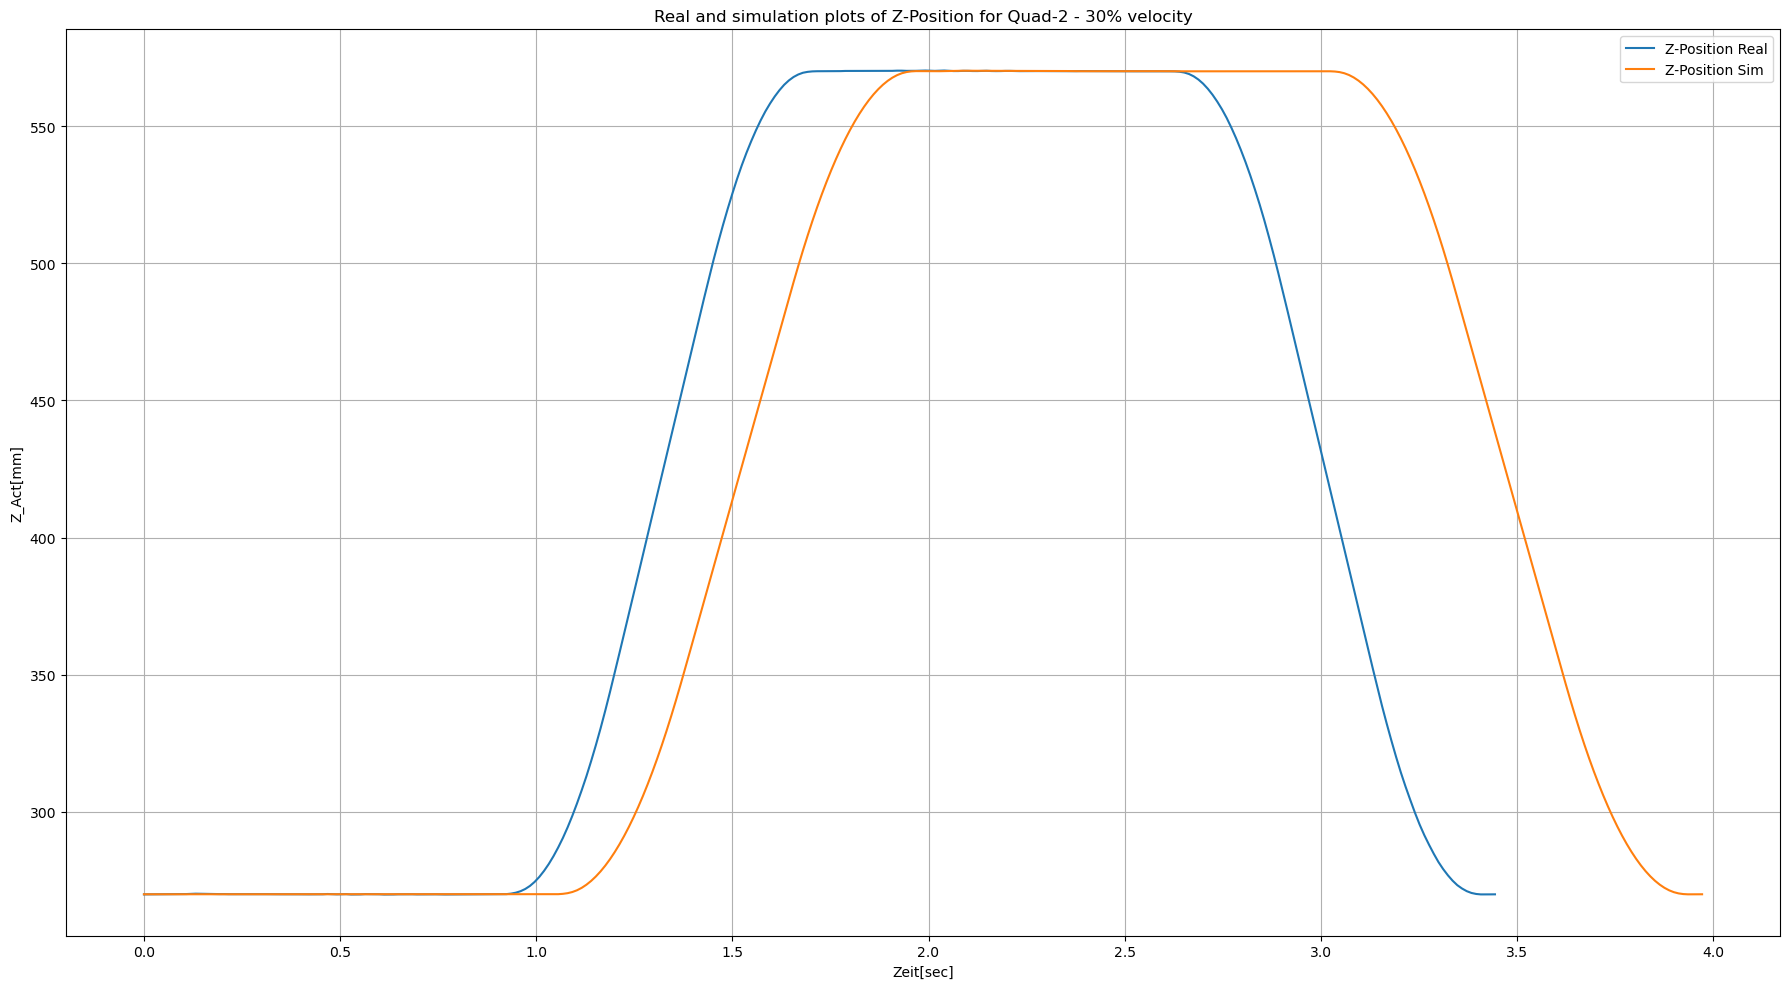

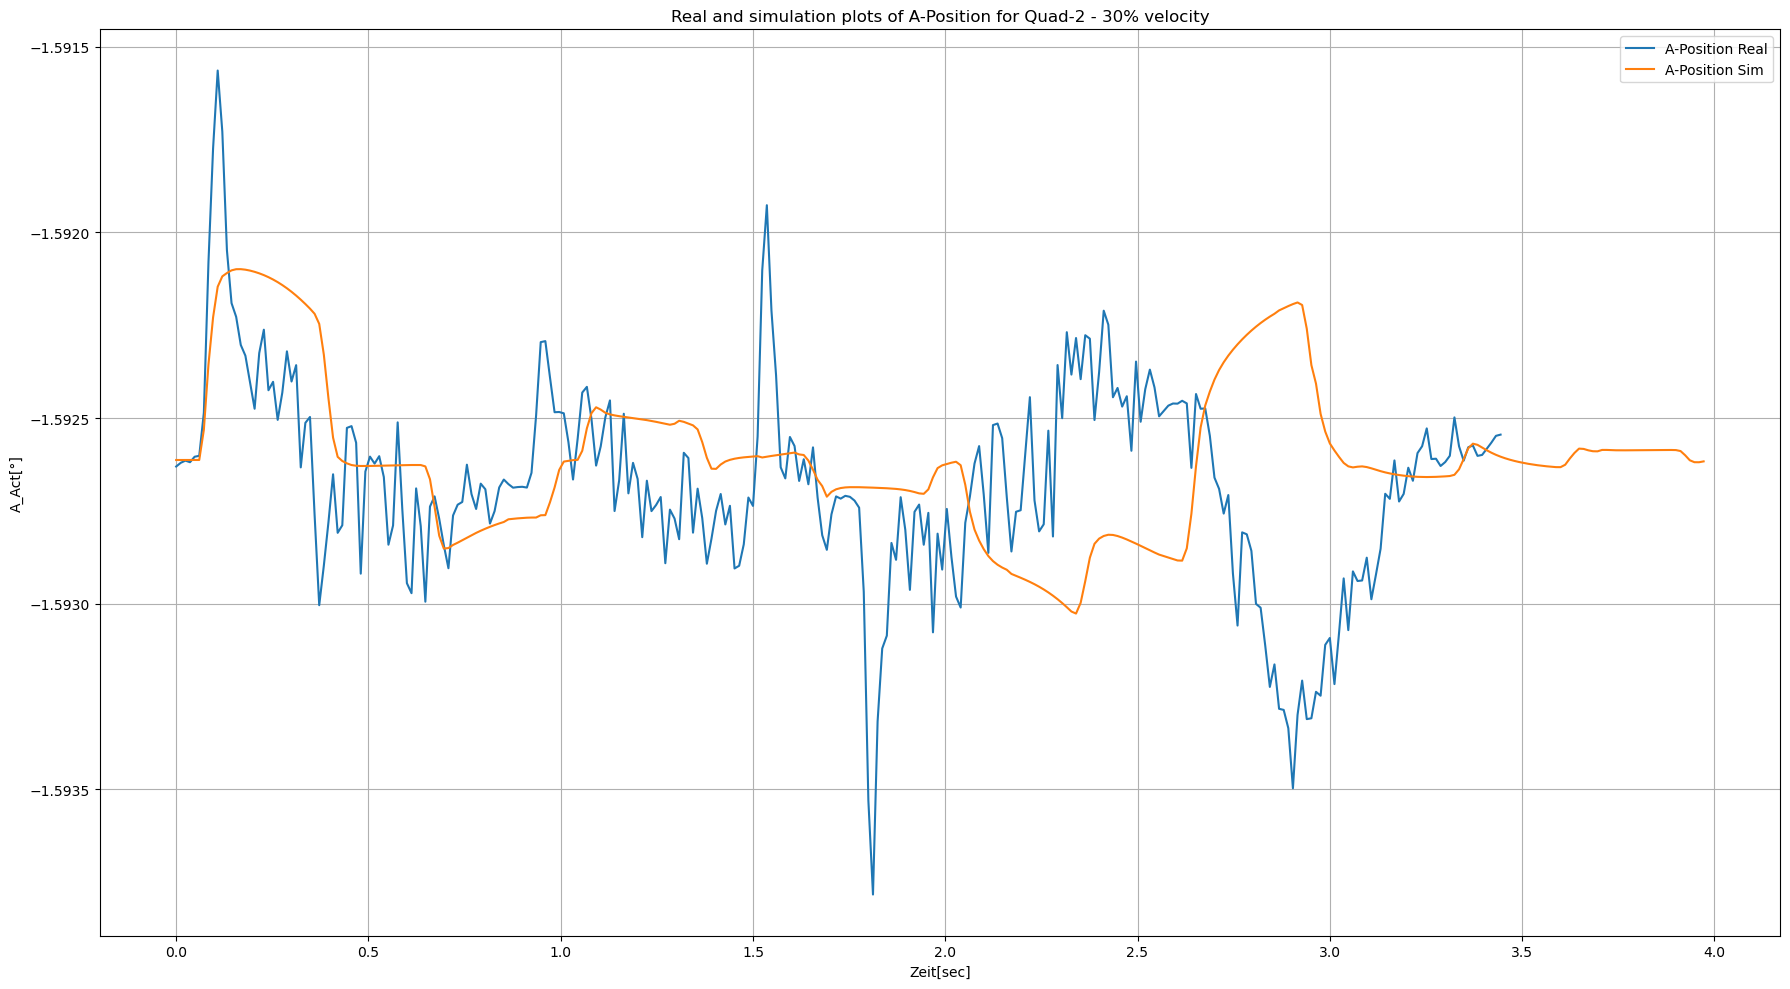

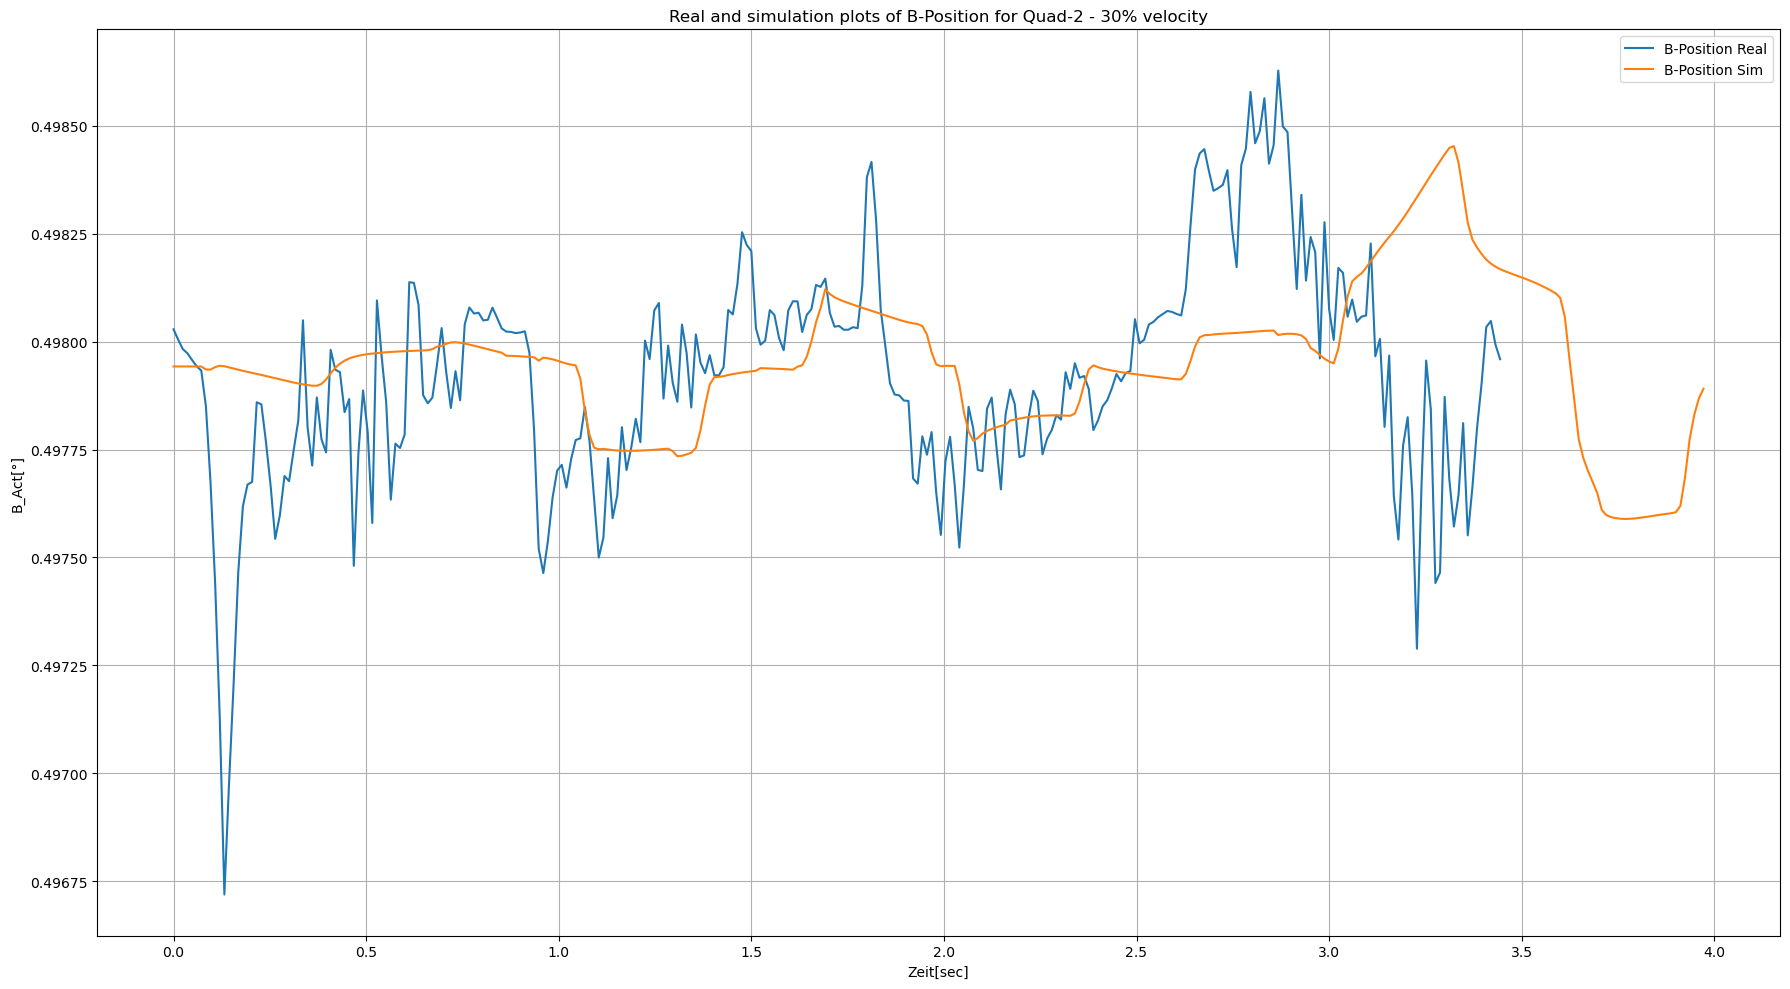

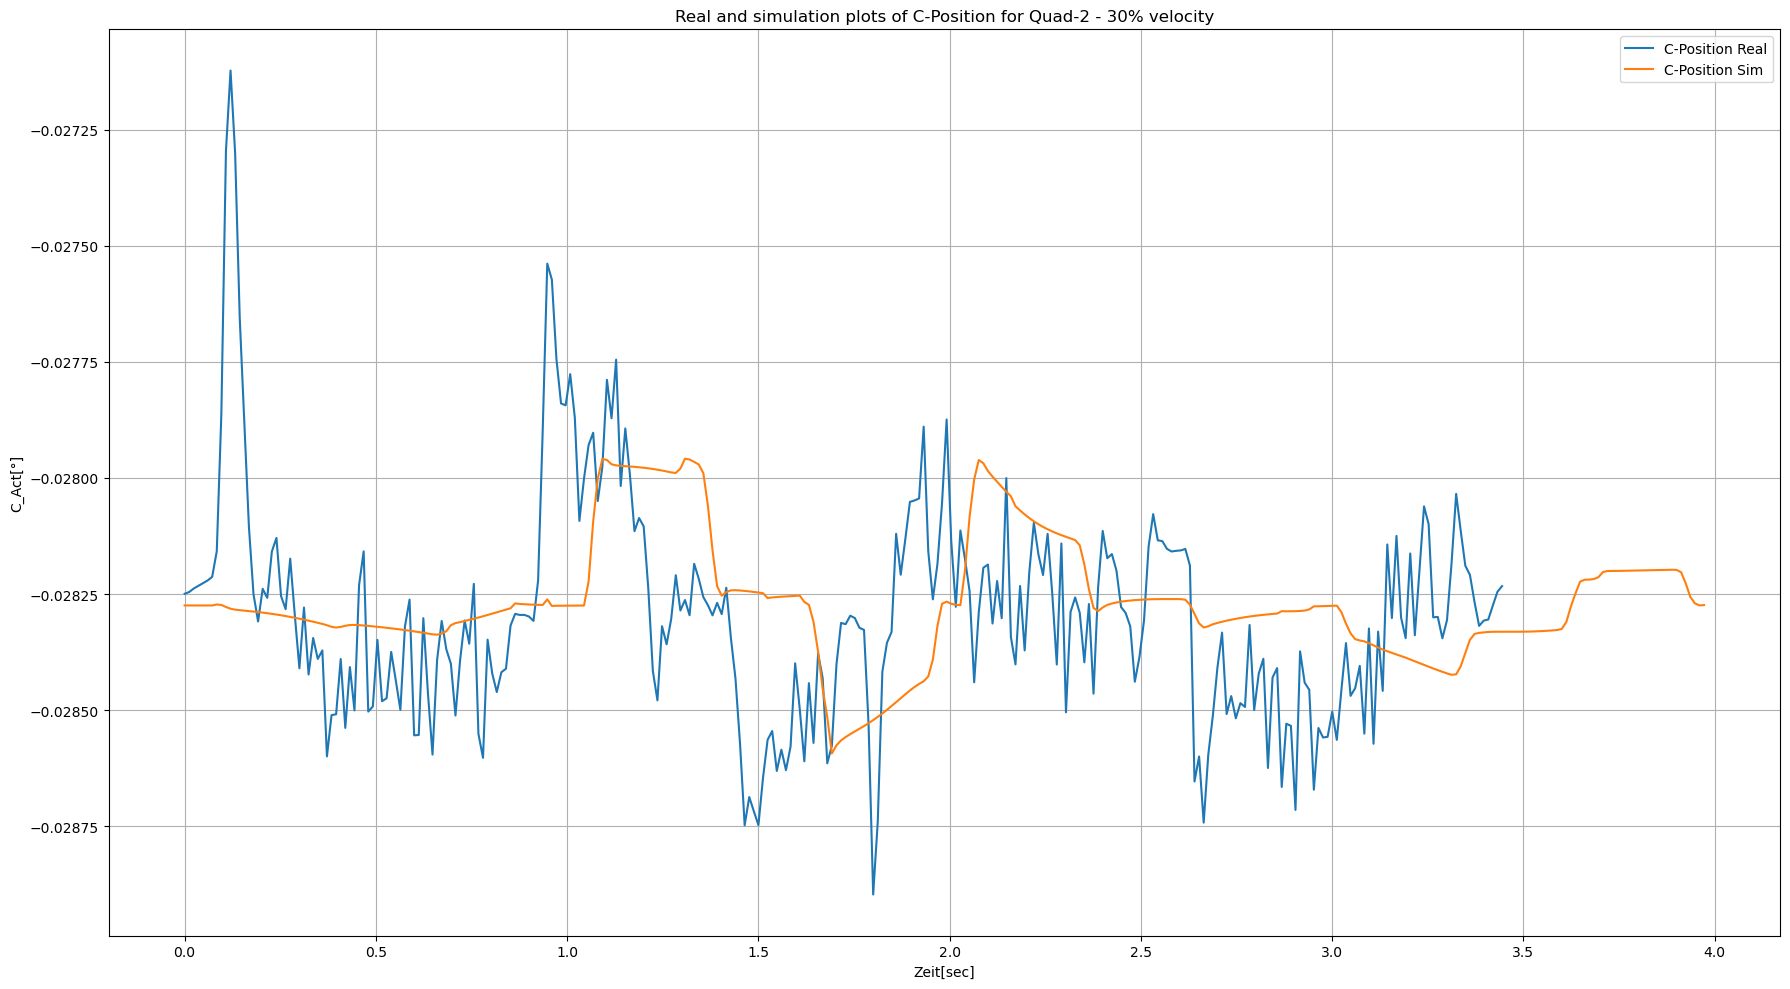

Quadrilaterl -  3


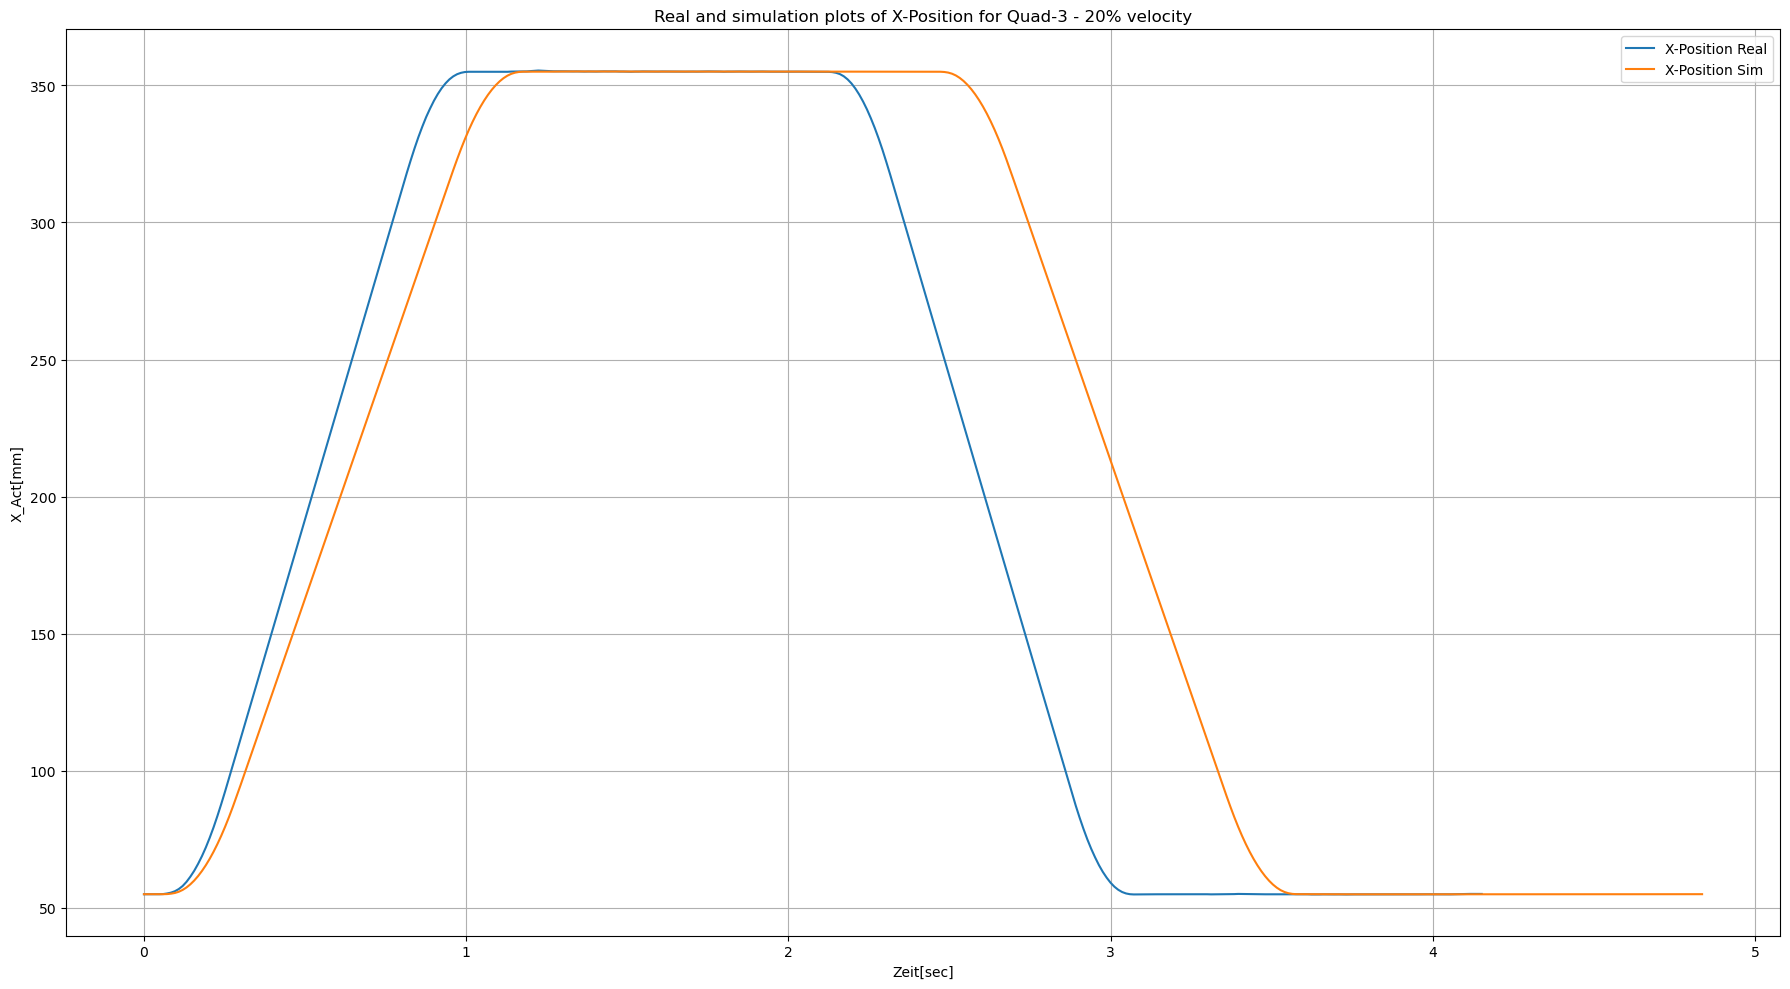

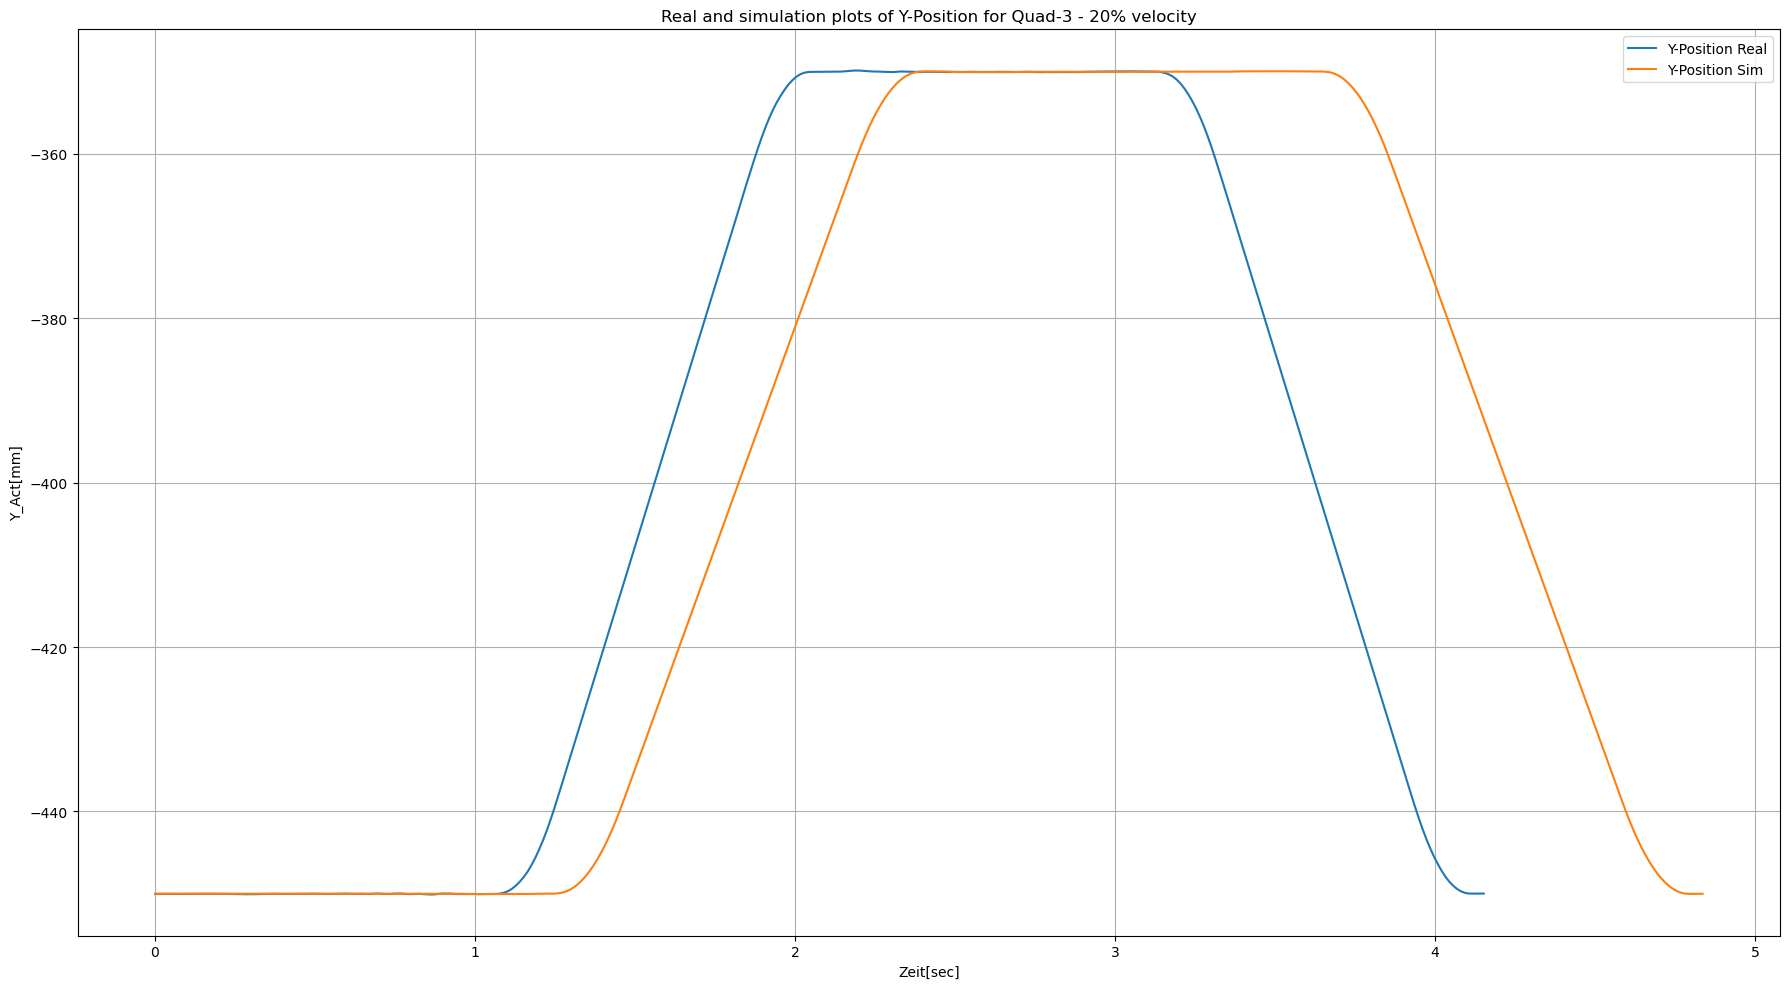

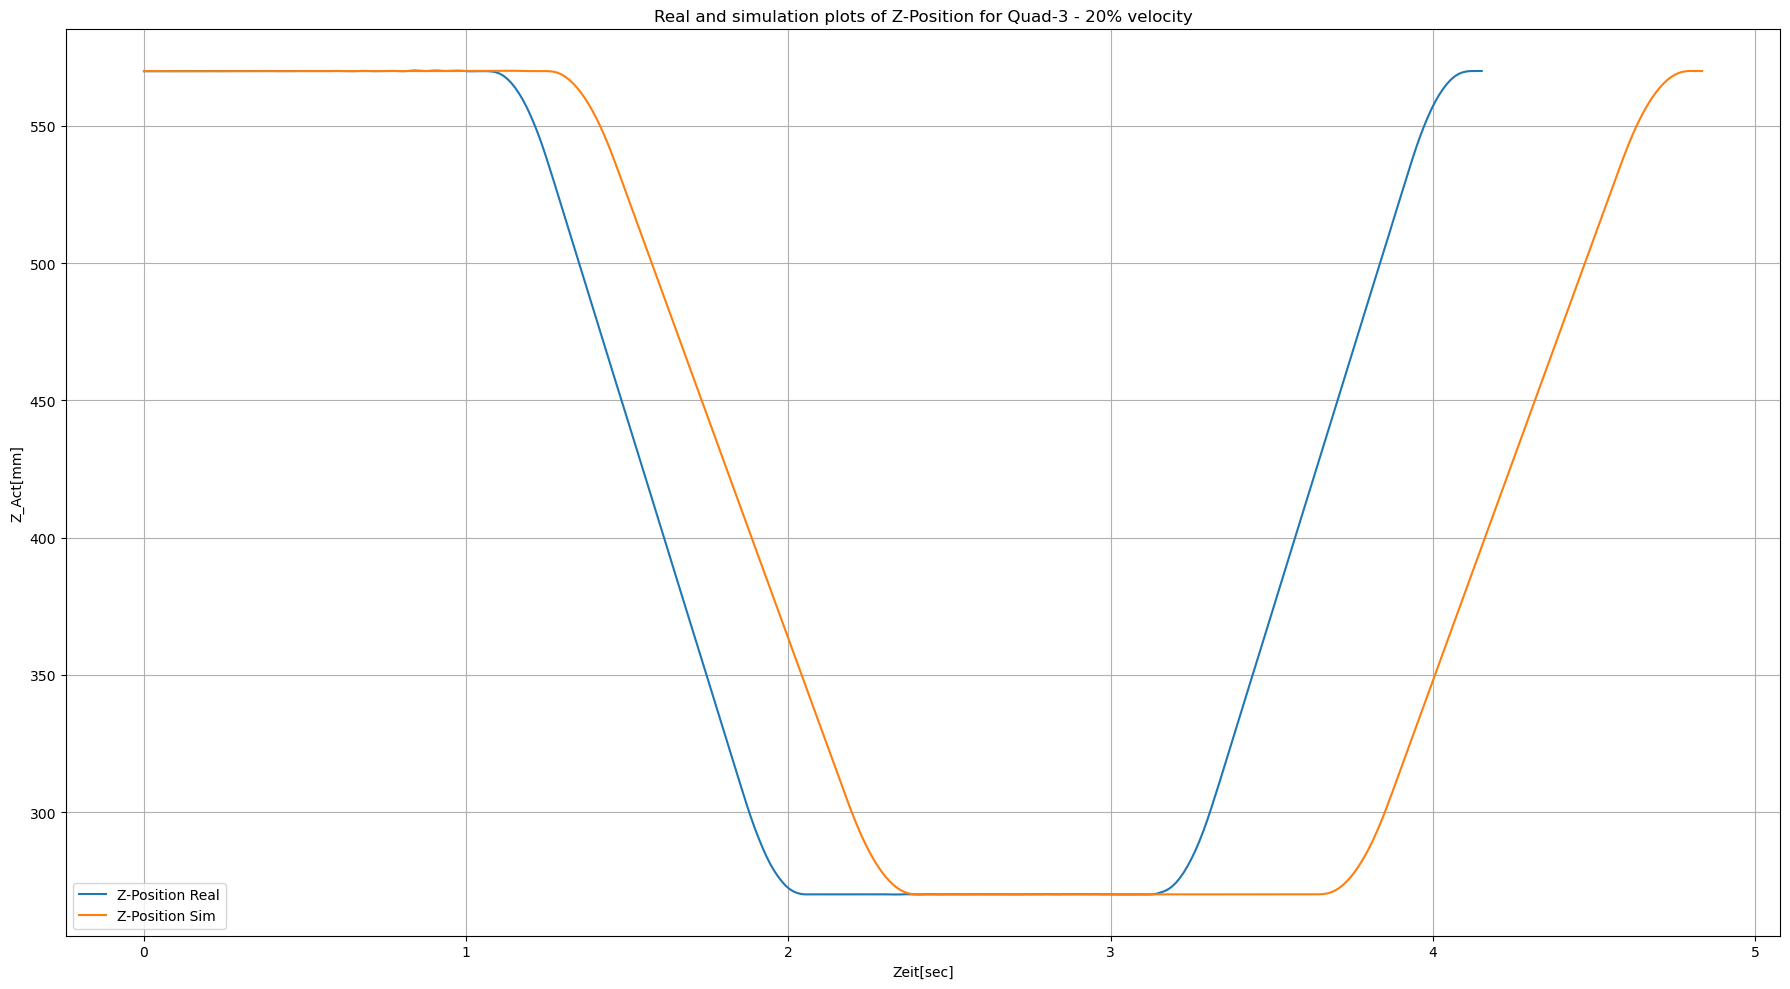

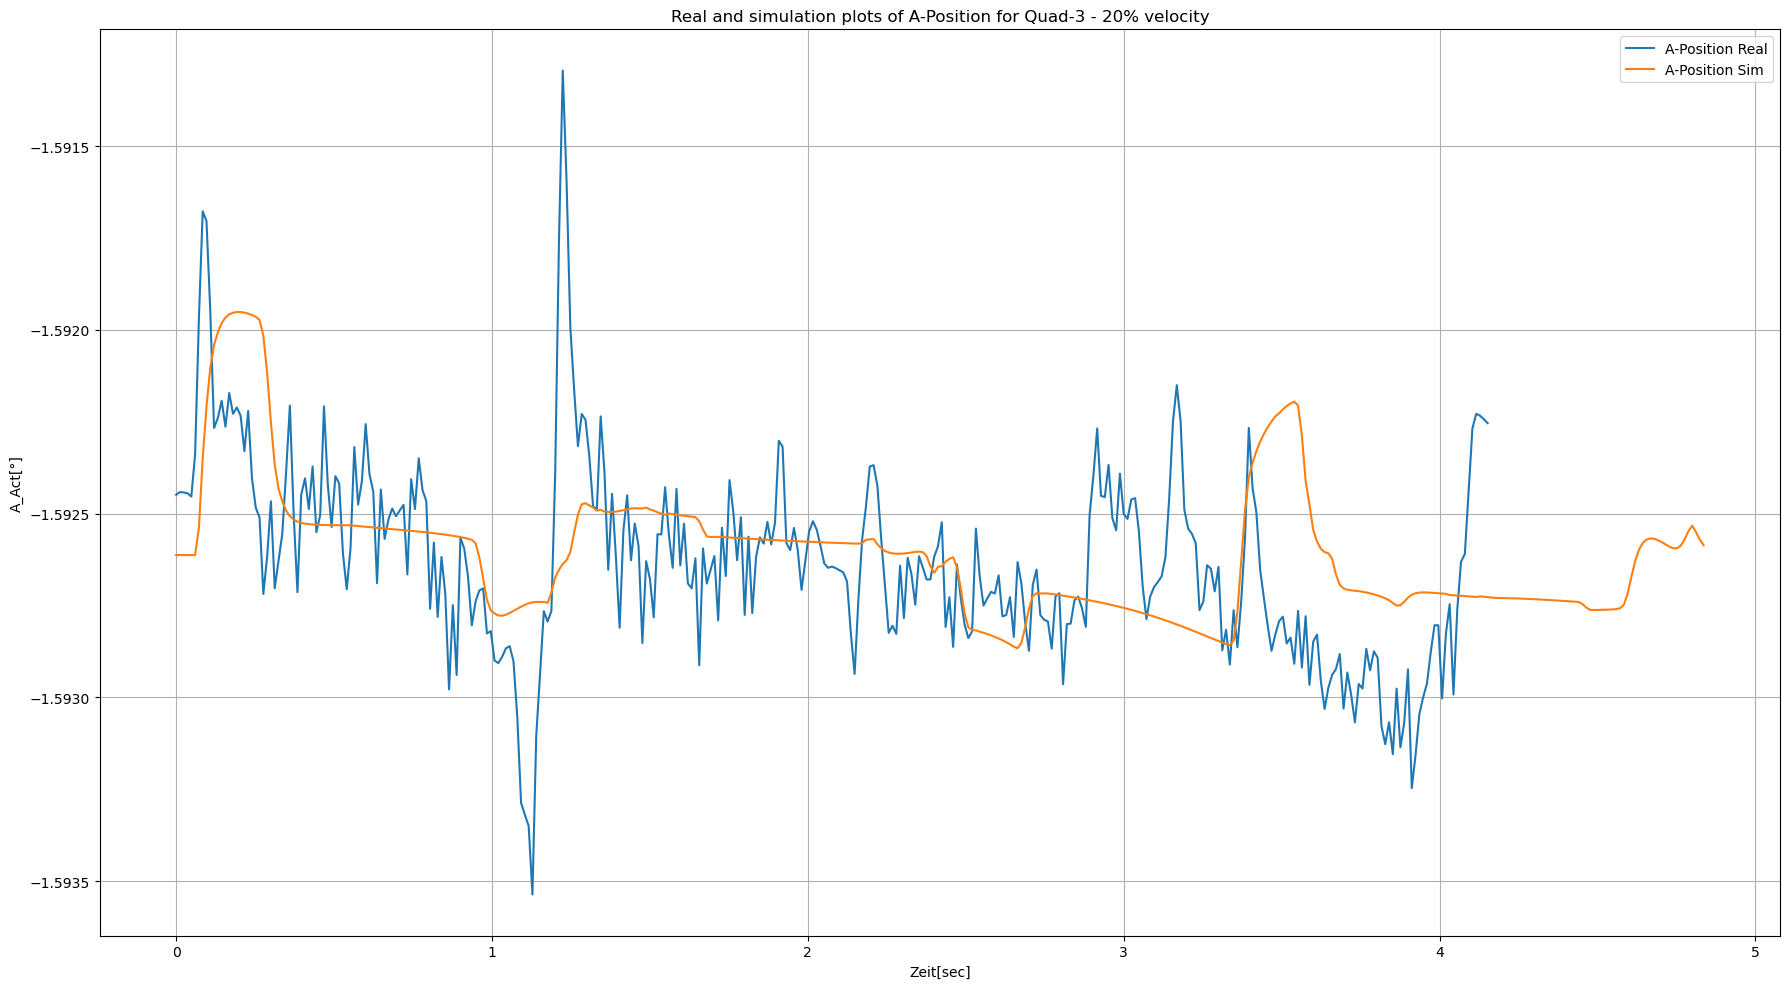

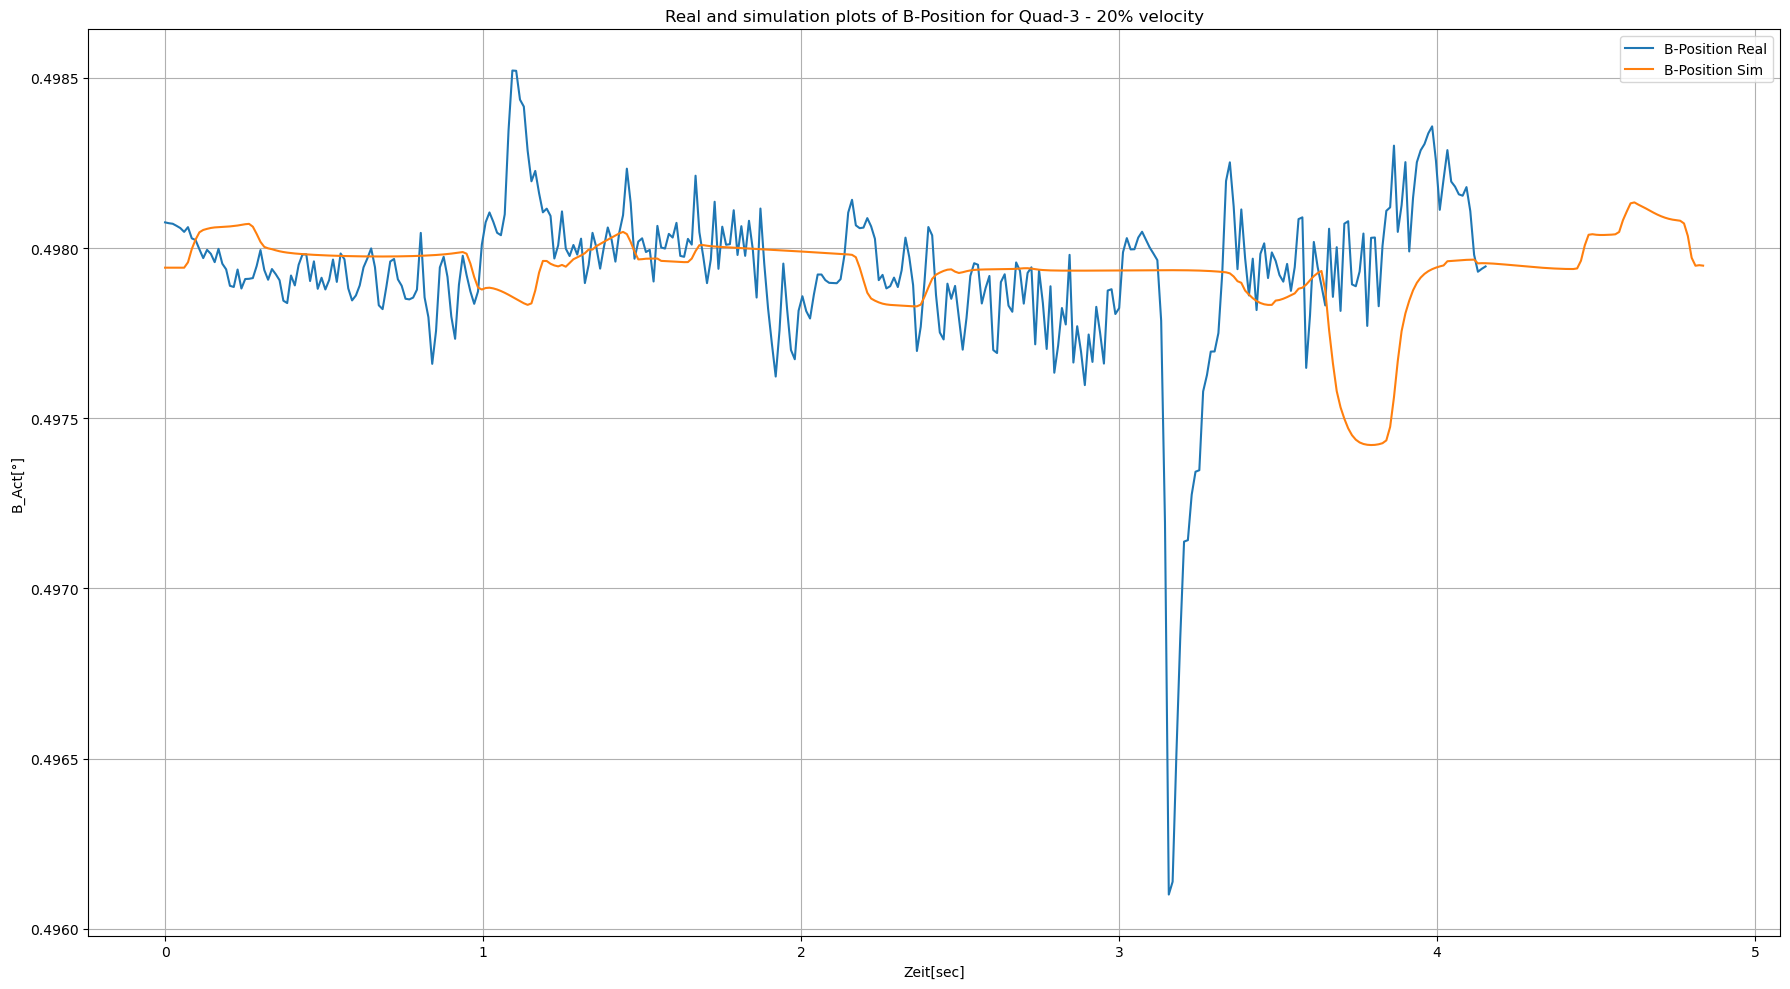

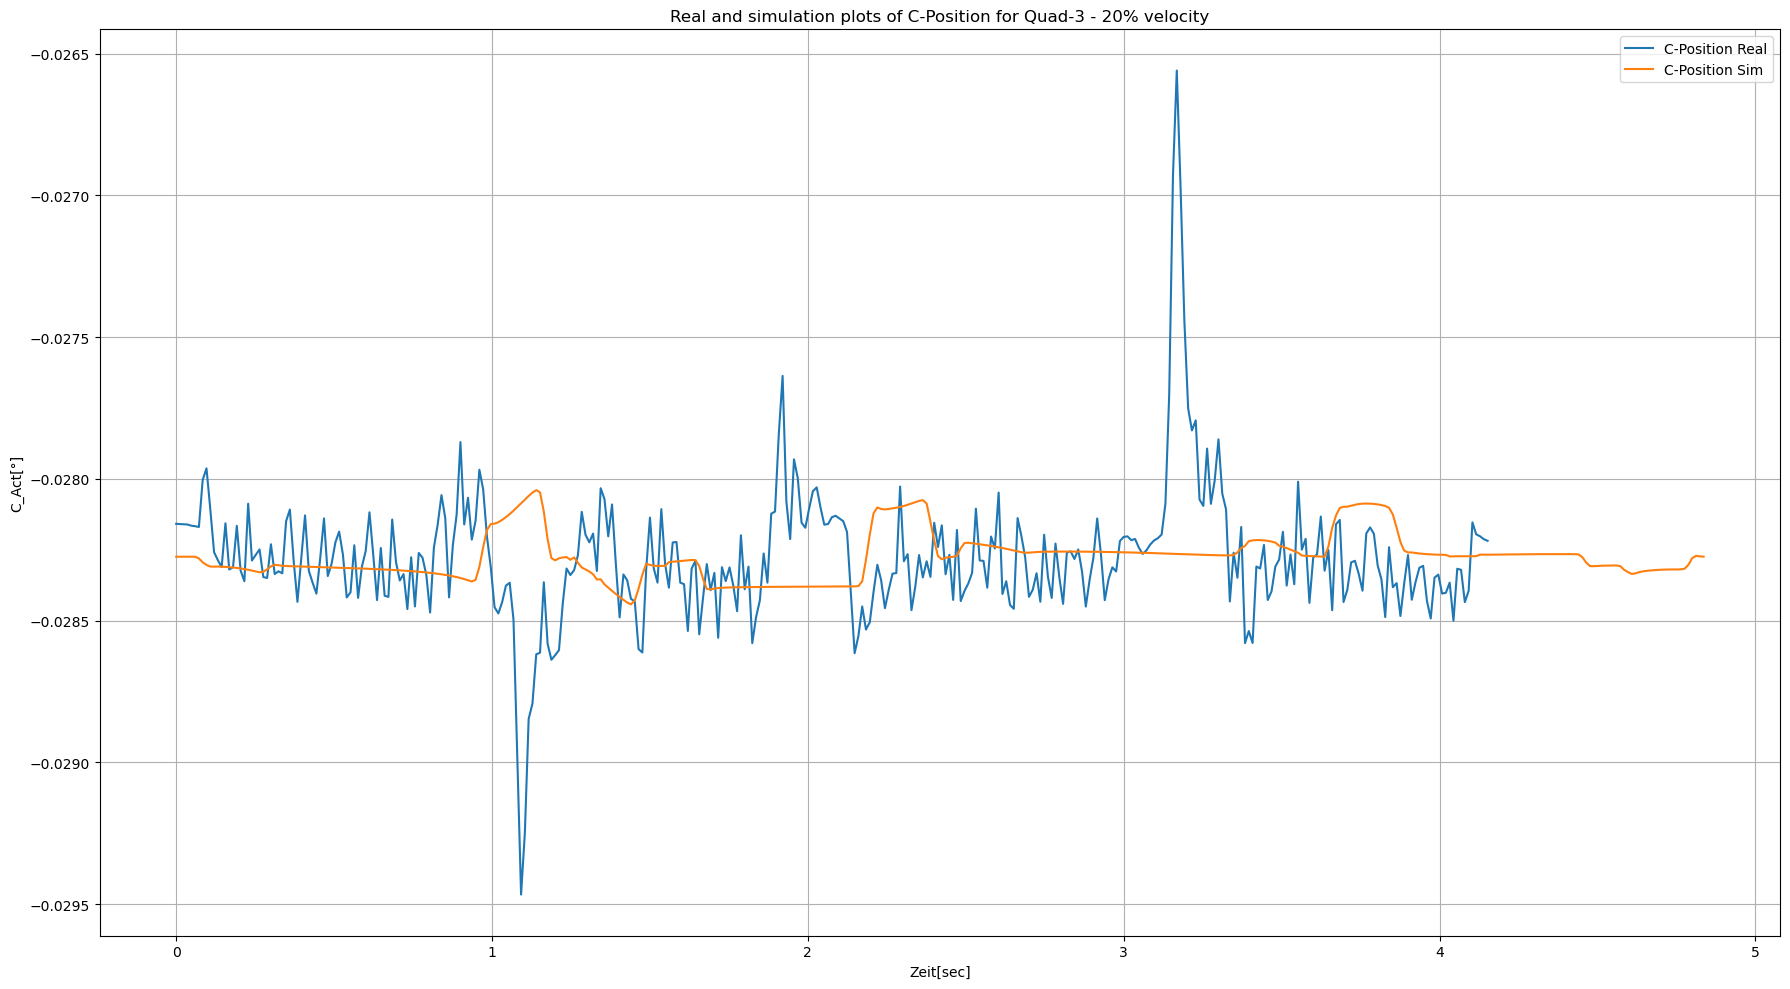

Quadrilaterl -  4


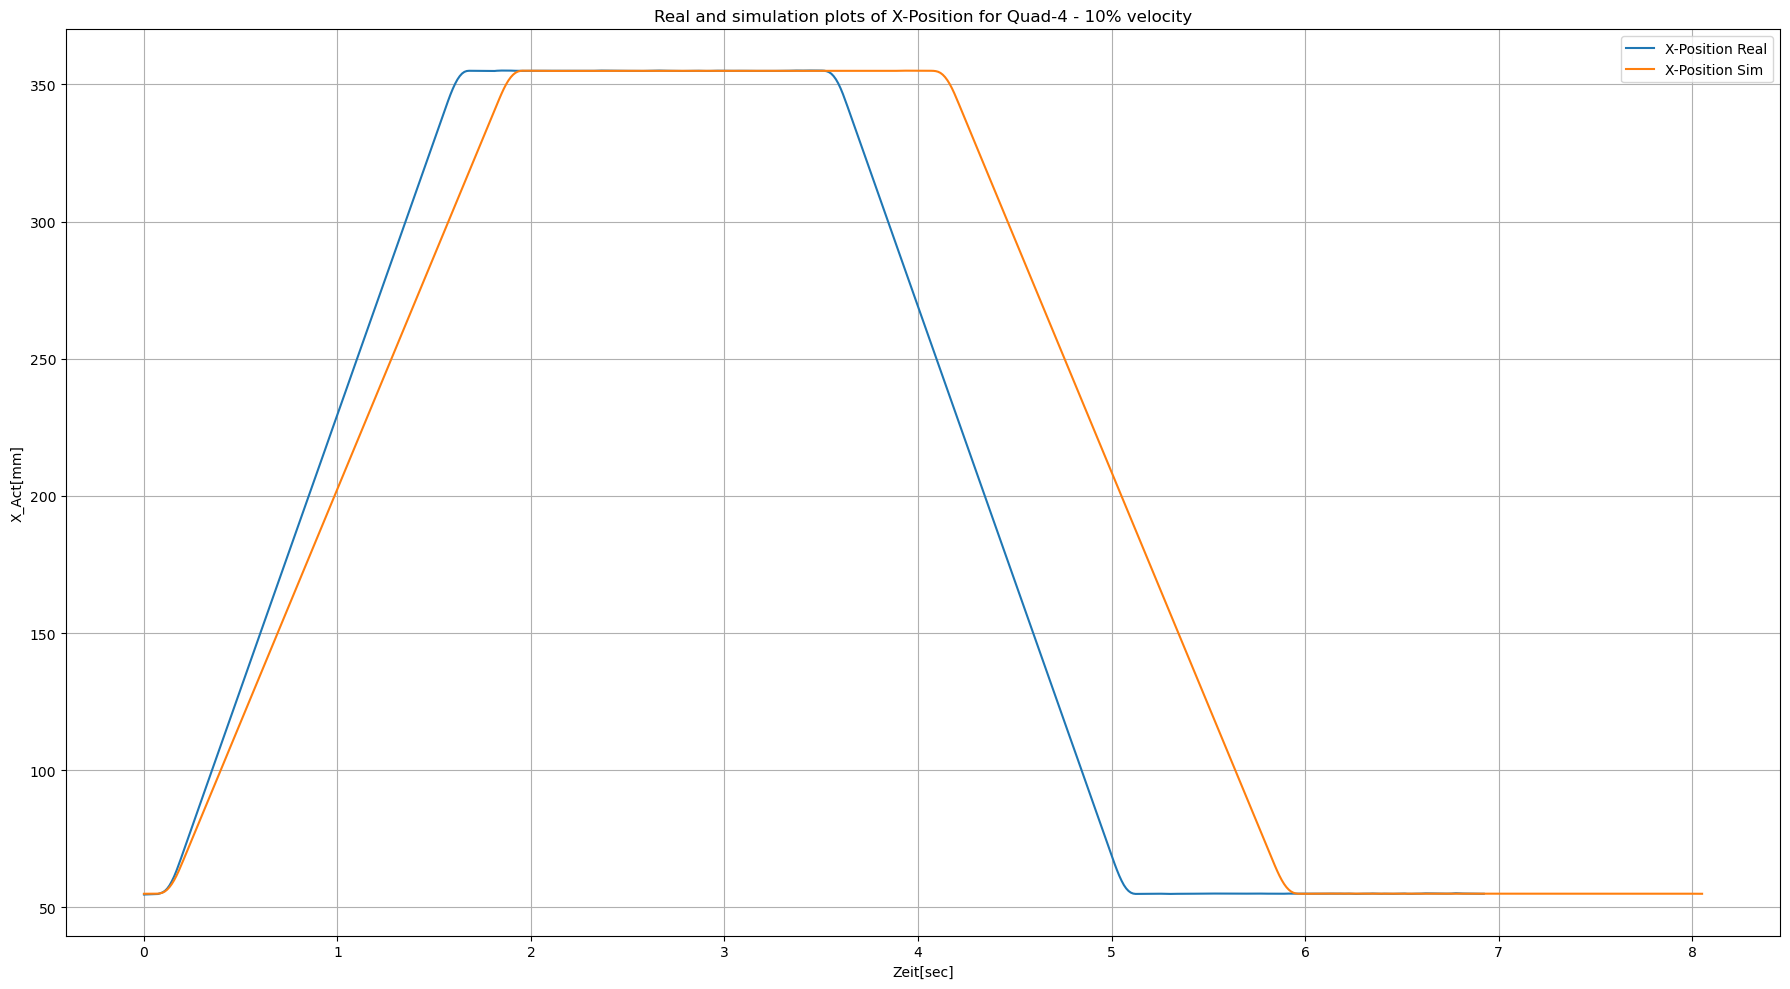

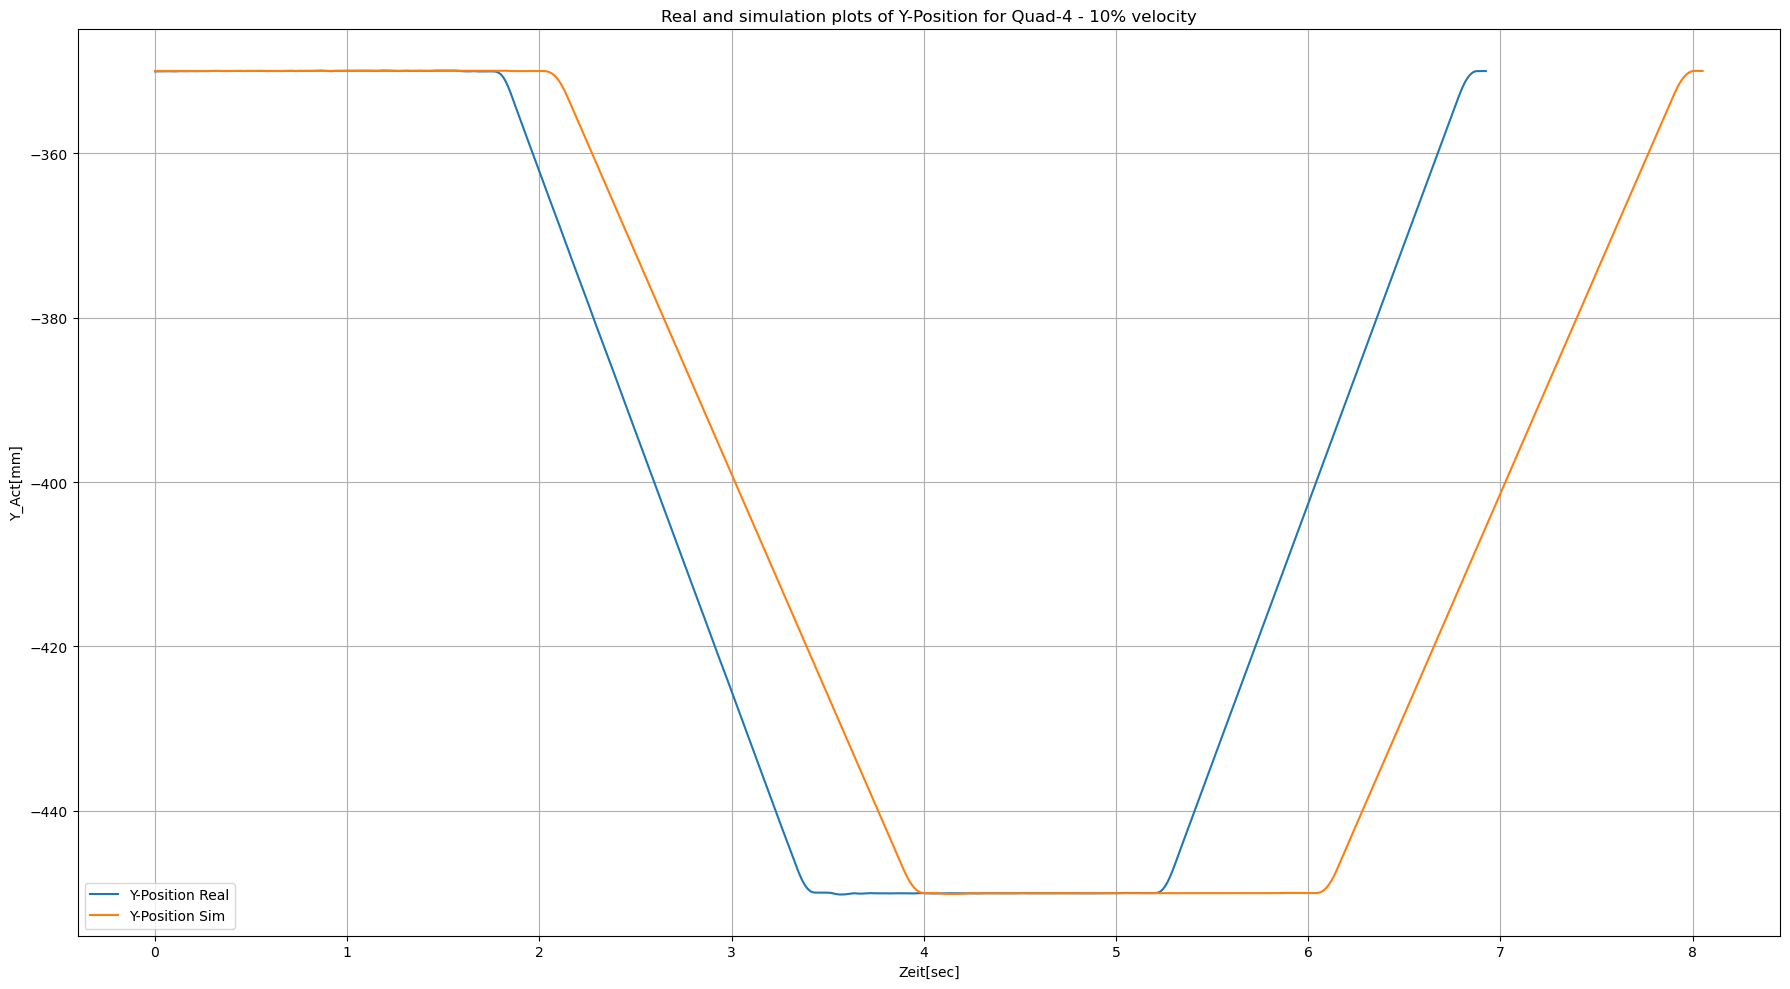

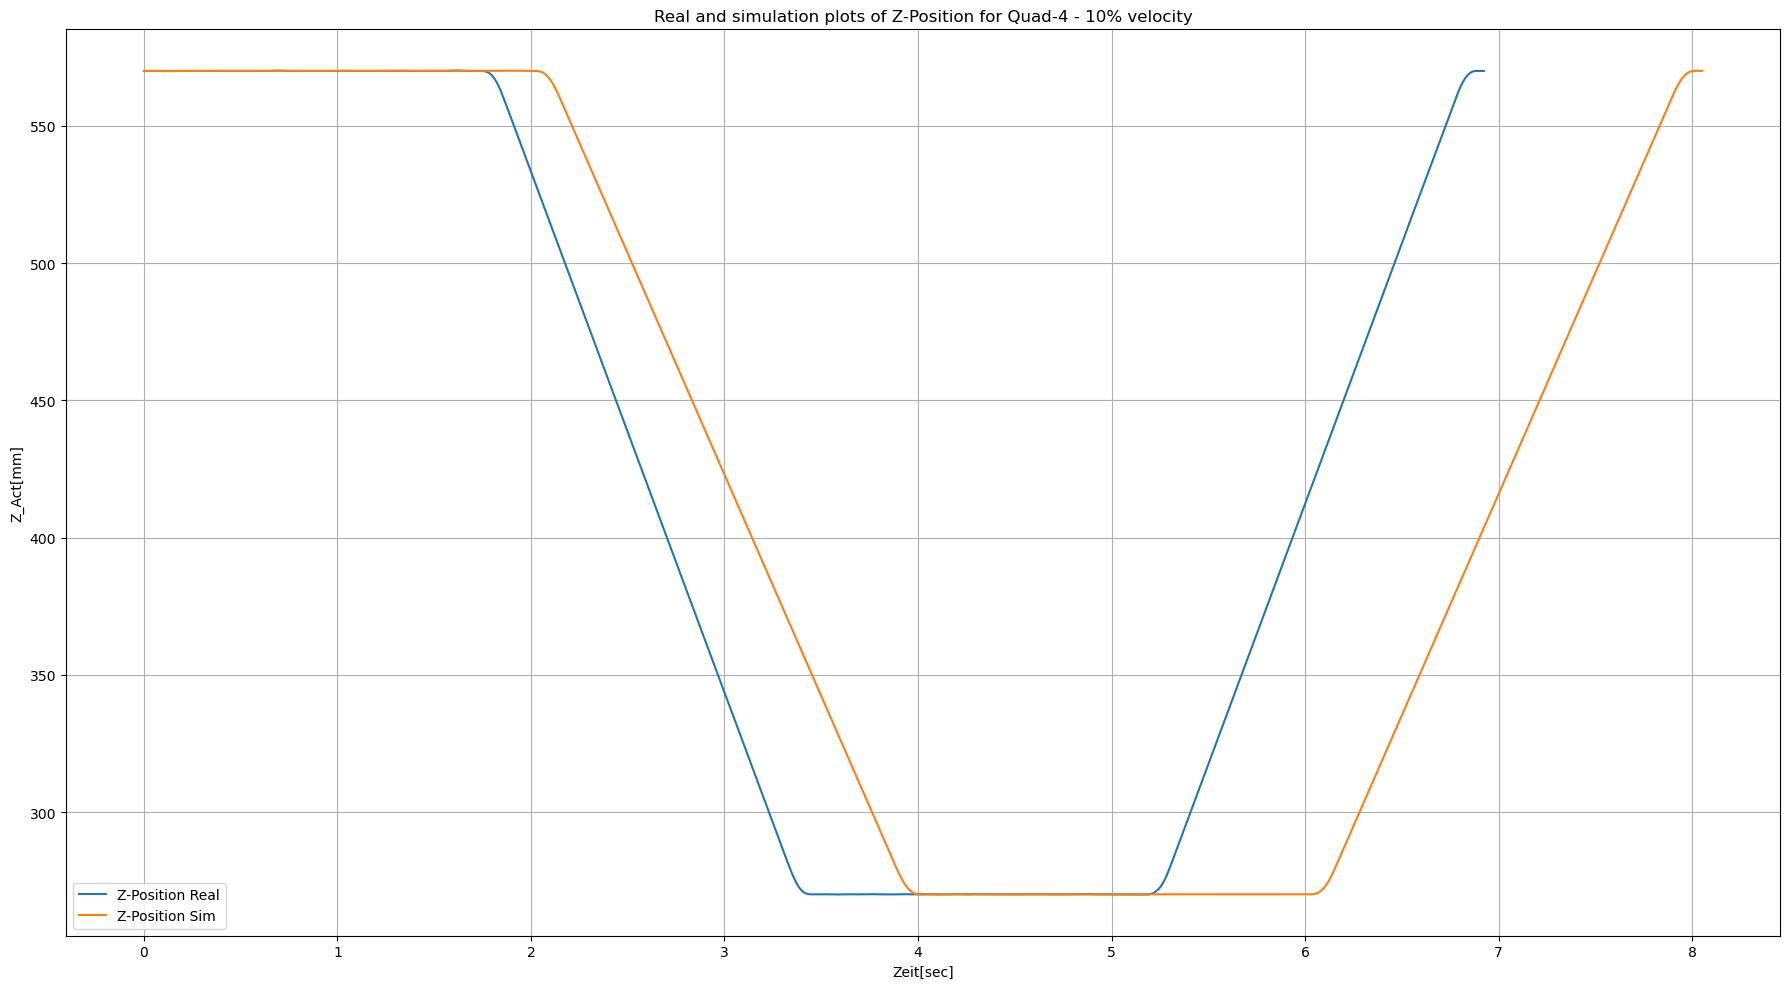

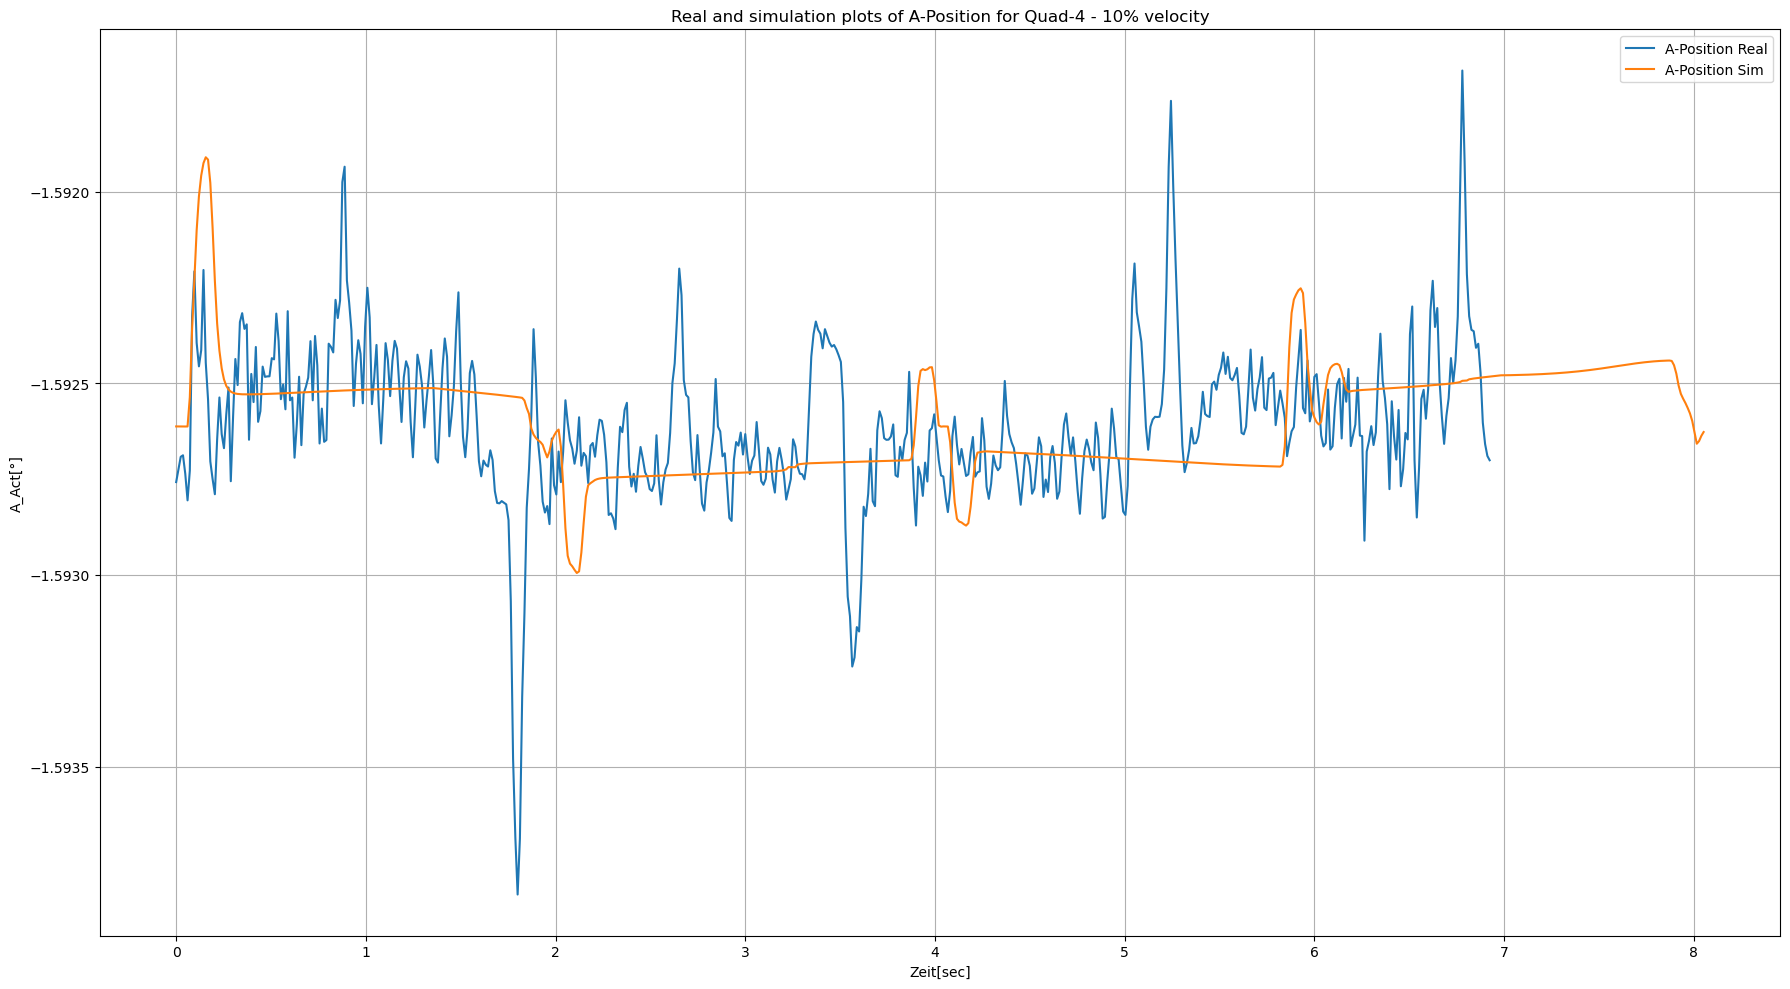

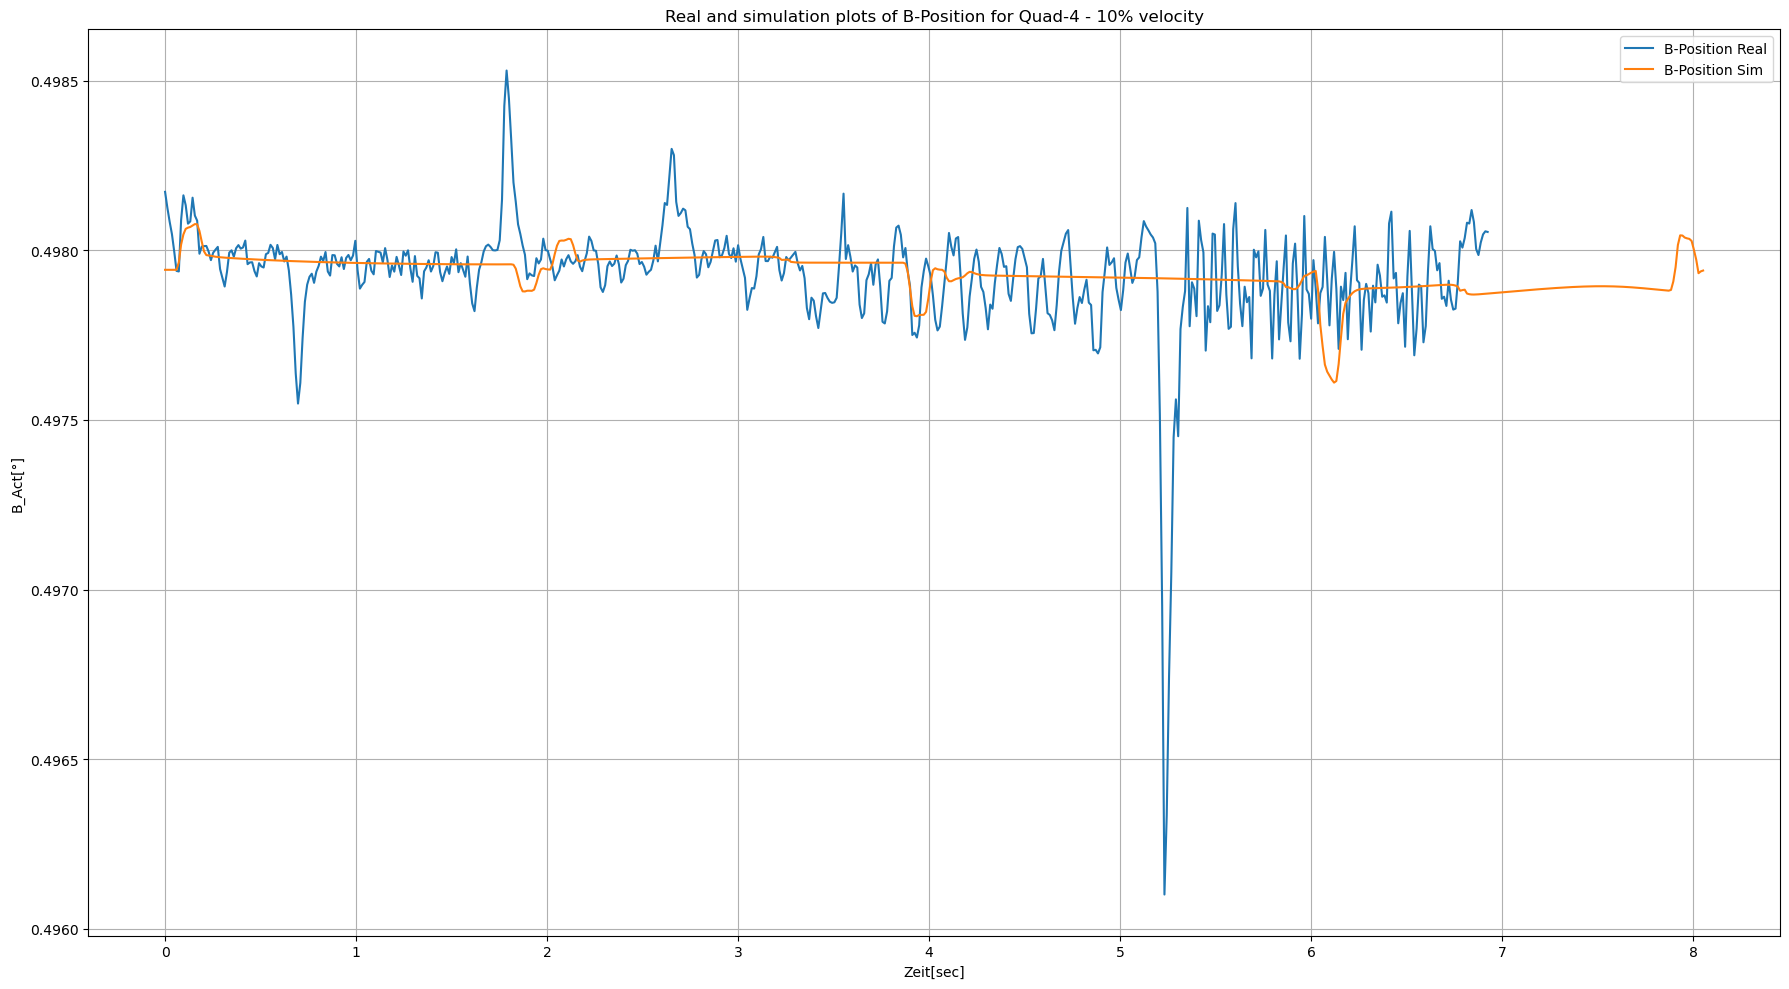

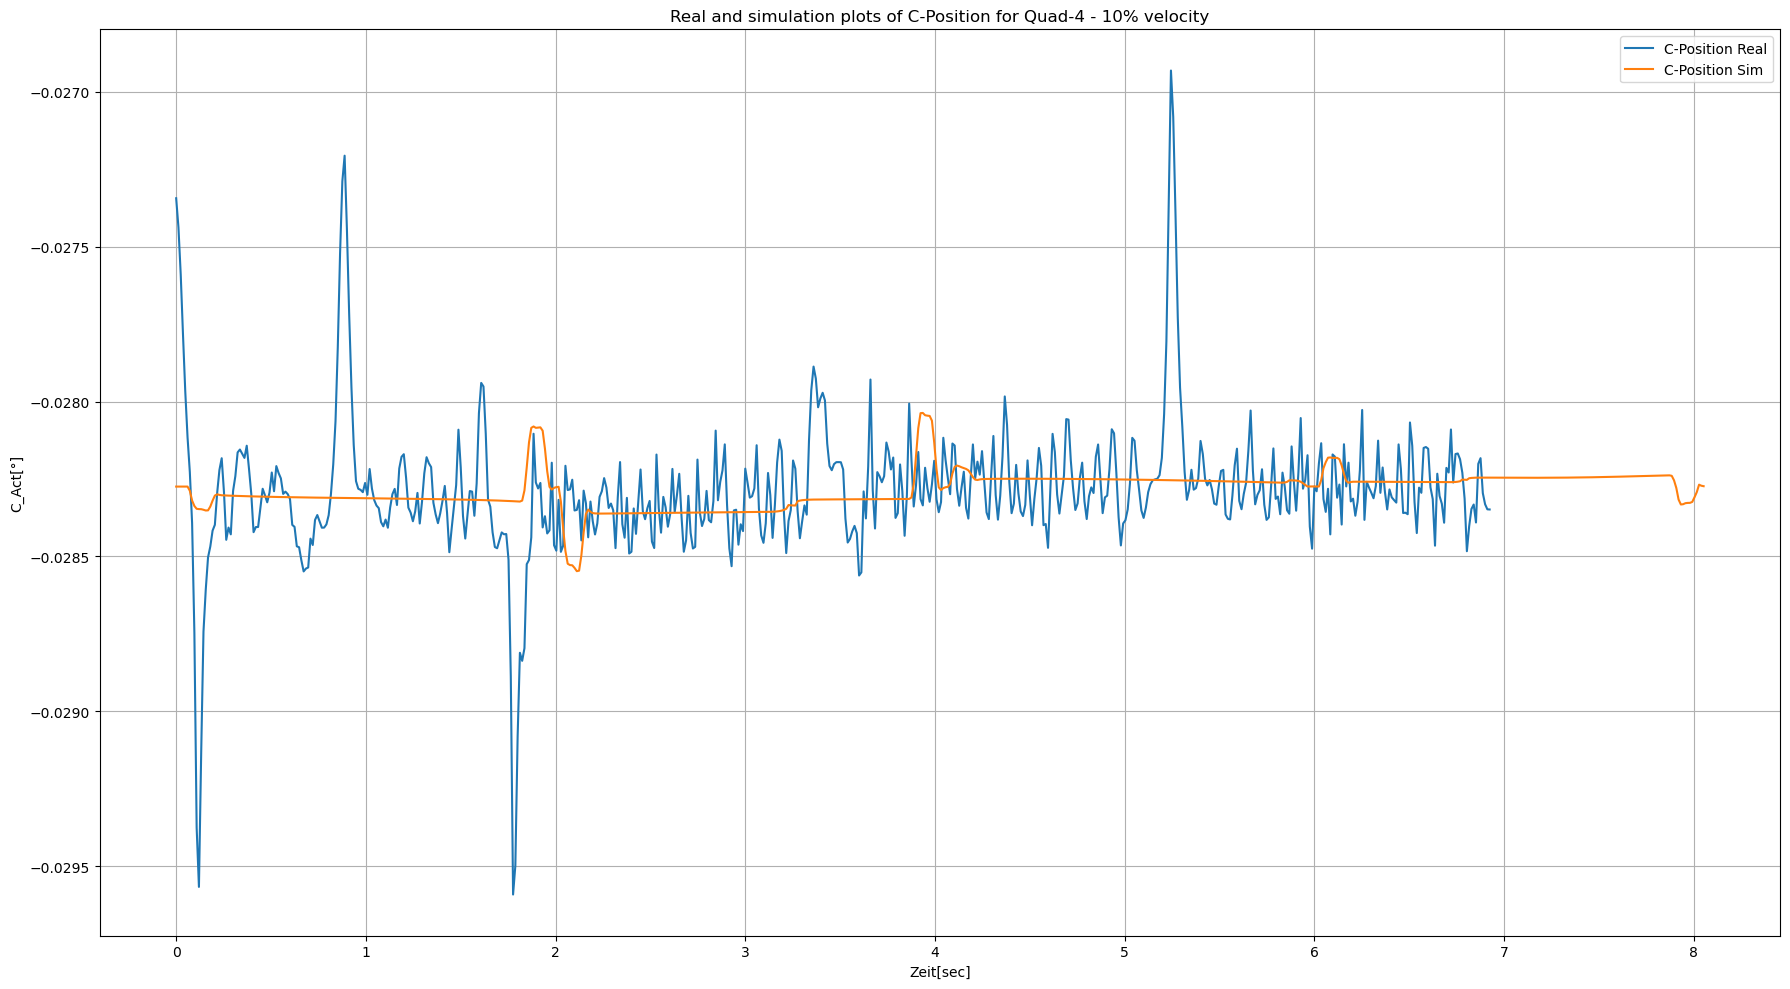

In [20]:
## Cartesian Coordinates comparison Real and Simulation
li_Linear_Real = []
li_Linear_Sim = []

if (len(fileNames_Linear_Real)==len(fileNames_Linear_Sim)):
    for i in range (len(fileNames_Linear_Real)):
        vel = 40 - (i*10)
        df_Linear_Real = pd.read_csv(fileNames_Linear_Real[i], delimiter=';', encoding='cp1252')
        df_Linear_Sim = pd.read_csv(fileNames_Linear_Sim[i], delimiter=';', encoding='cp1252')  

        li_Linear_Real.append(df_Linear_Real)
        li_Linear_Sim.append(df_Linear_Sim)

        print("Quadrilaterl - ", i+1)

        # # Set time delay
        # if (i==0):     # Quad 1 
        #     delay = 0.41
        # elif (i==1):       # Quad 2
        #     delay = 0.45
        # elif (i==2):       # Quad 3
        #     delay = 0.34
        # elif (i==3):       # Quad 4
        #     delay = 0.3
        # else:               # default
        #     delay = 0

        delay = 0

        #Shift Real robot trace to eliminate PTP influence
        time_Shift = li_Linear_Real[i]['Zeit[sec]'] - delay    
        li_Linear_Real[i]['Zeit[sec]'] = time_Shift


        # Plotting the cartesian coordinates (X, Y, Z, A, B, C)
        # X, Y, Z are the coordinates in space
        # A, B, C are the orientation angles with respect to the normal
        for j in range(6):
            
            #Converting the integer to character using ASCII
            if j < 3:
                a = j + 88                          #characters - X, Y, Z
            else:
                a = j + 62                          #characters - A, B, C


            pos_real = li_Linear_Real[i].columns[j+1]
            pos_sim = li_Linear_Sim[i].columns[j+1]

            label_real = chr(a) + '-Position Real'
            label_sim = chr(a) + '-Position Sim'

            #Plotting the TCP position in terms of cartesian coordinates
            plt.figure(num=1, figsize=(18,10), dpi=100, tight_layout=True)
            plt.plot(li_Linear_Real[i]['Zeit[sec]'], li_Linear_Real[i][pos_real], label = label_real)
            plt.plot(li_Linear_Sim[i]['Zeit[sec]'], li_Linear_Sim[i][pos_sim], label = label_sim)
            plt.legend()
            plt.grid()
            # plt.xlim(left=0)
            plt.xlabel(li_Linear_Sim[i].columns[0])
            plt.ylabel(li_Linear_Sim[i].columns[j+1])
            plt.title('Real and simulation plots of ' + chr(a) + '-Position for Quad-' + str(i+1) +' - ' + str(vel) + '% velocity')
            if not os.path.exists('Images/Linear'):
                os.makedirs('Images/Linear')
            plt.savefig('Images/Linear/' + chr(a) + '-Pos Rect ' + str(i+1) + '.jpg')
            plt.show()
            plt.close()

Plot comparison of Axis position for Real robot and simulation

Quadrilaterl -  1


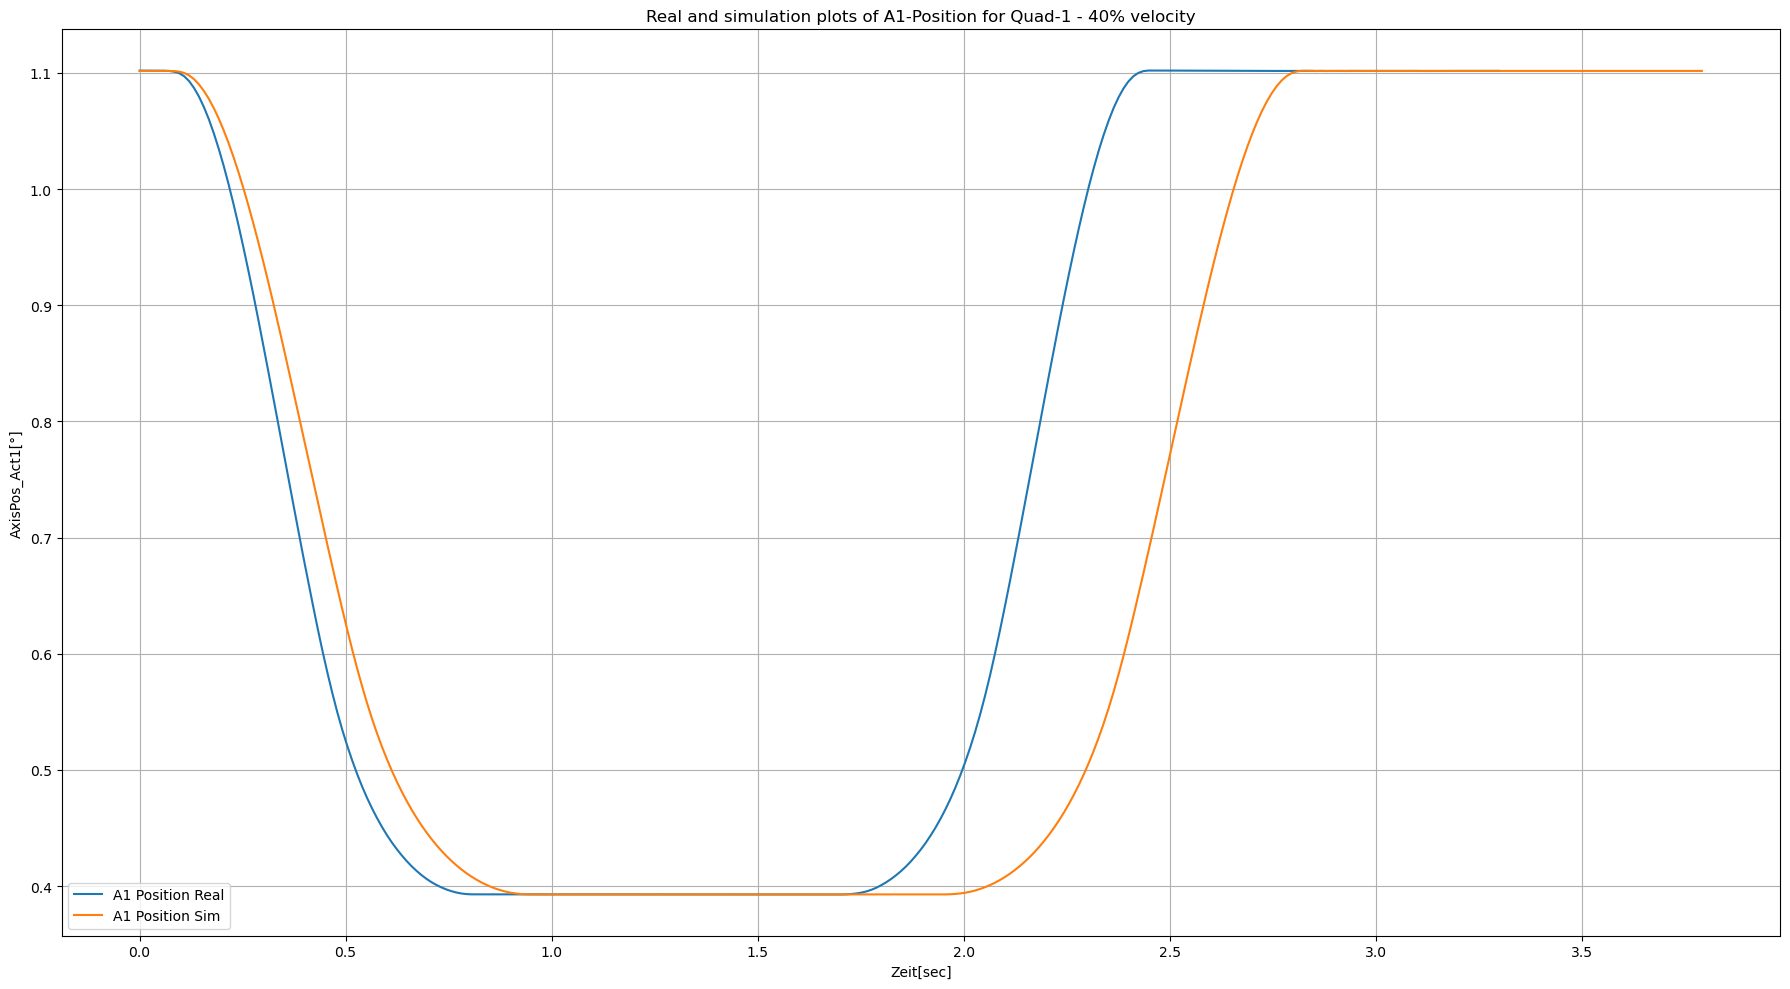

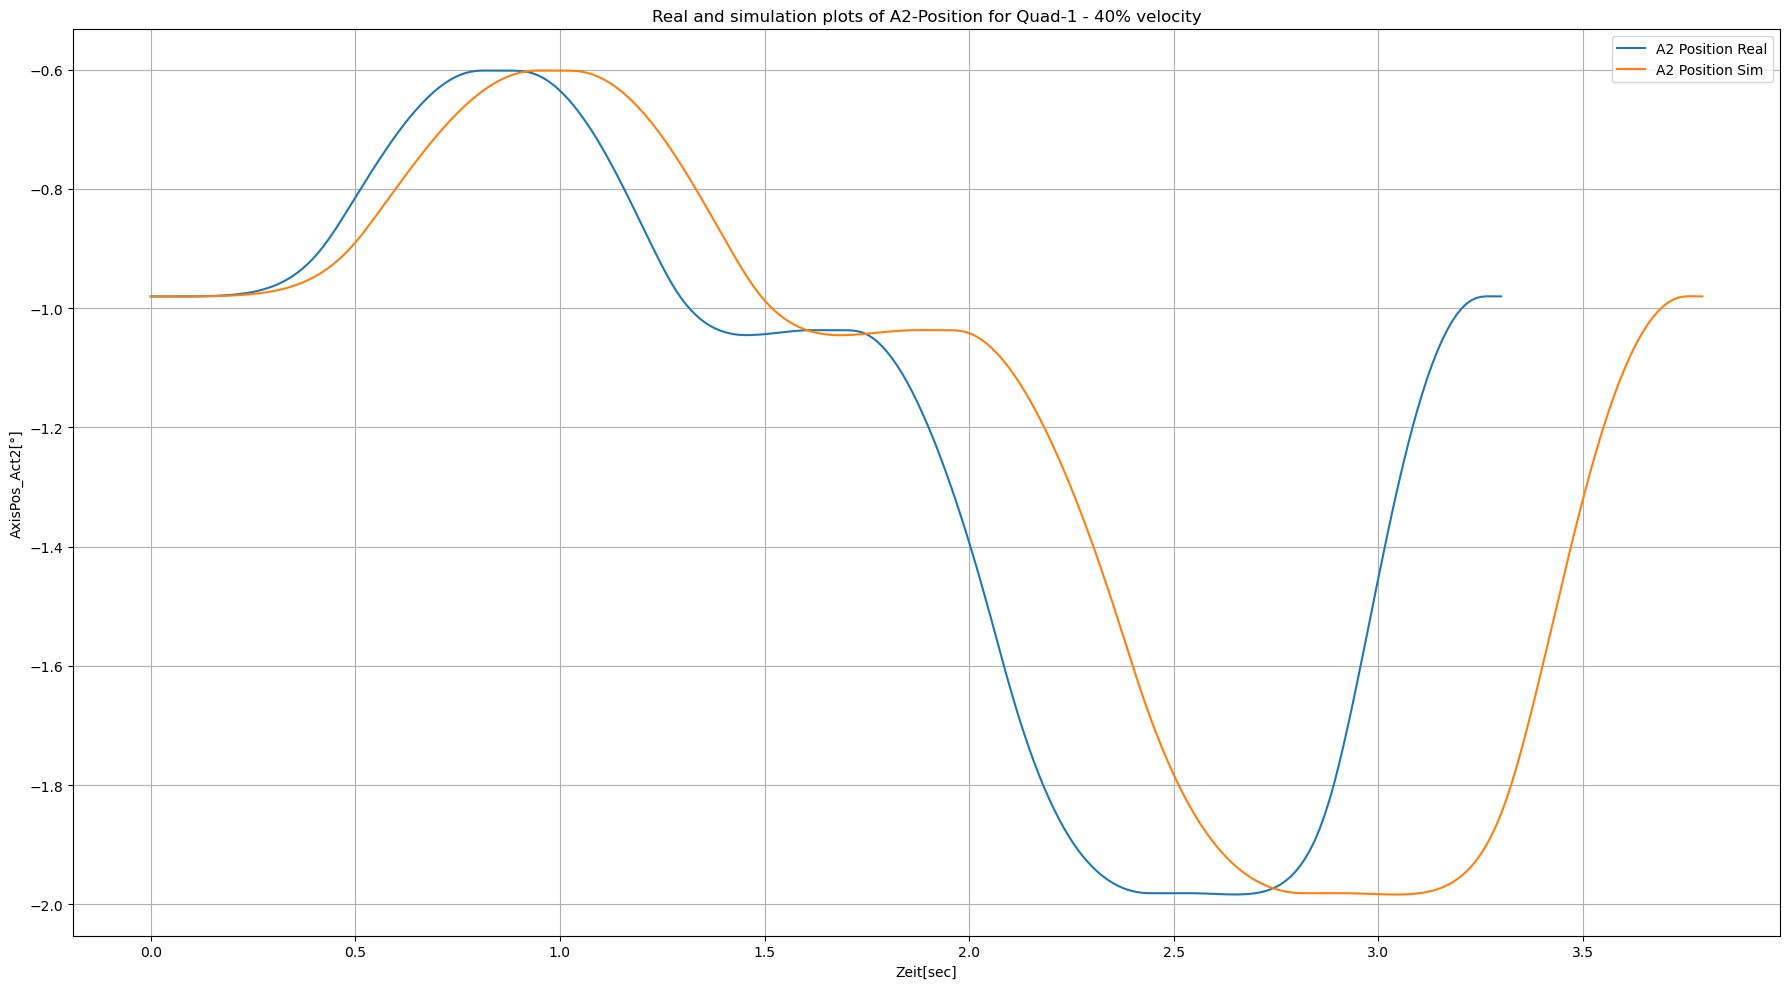

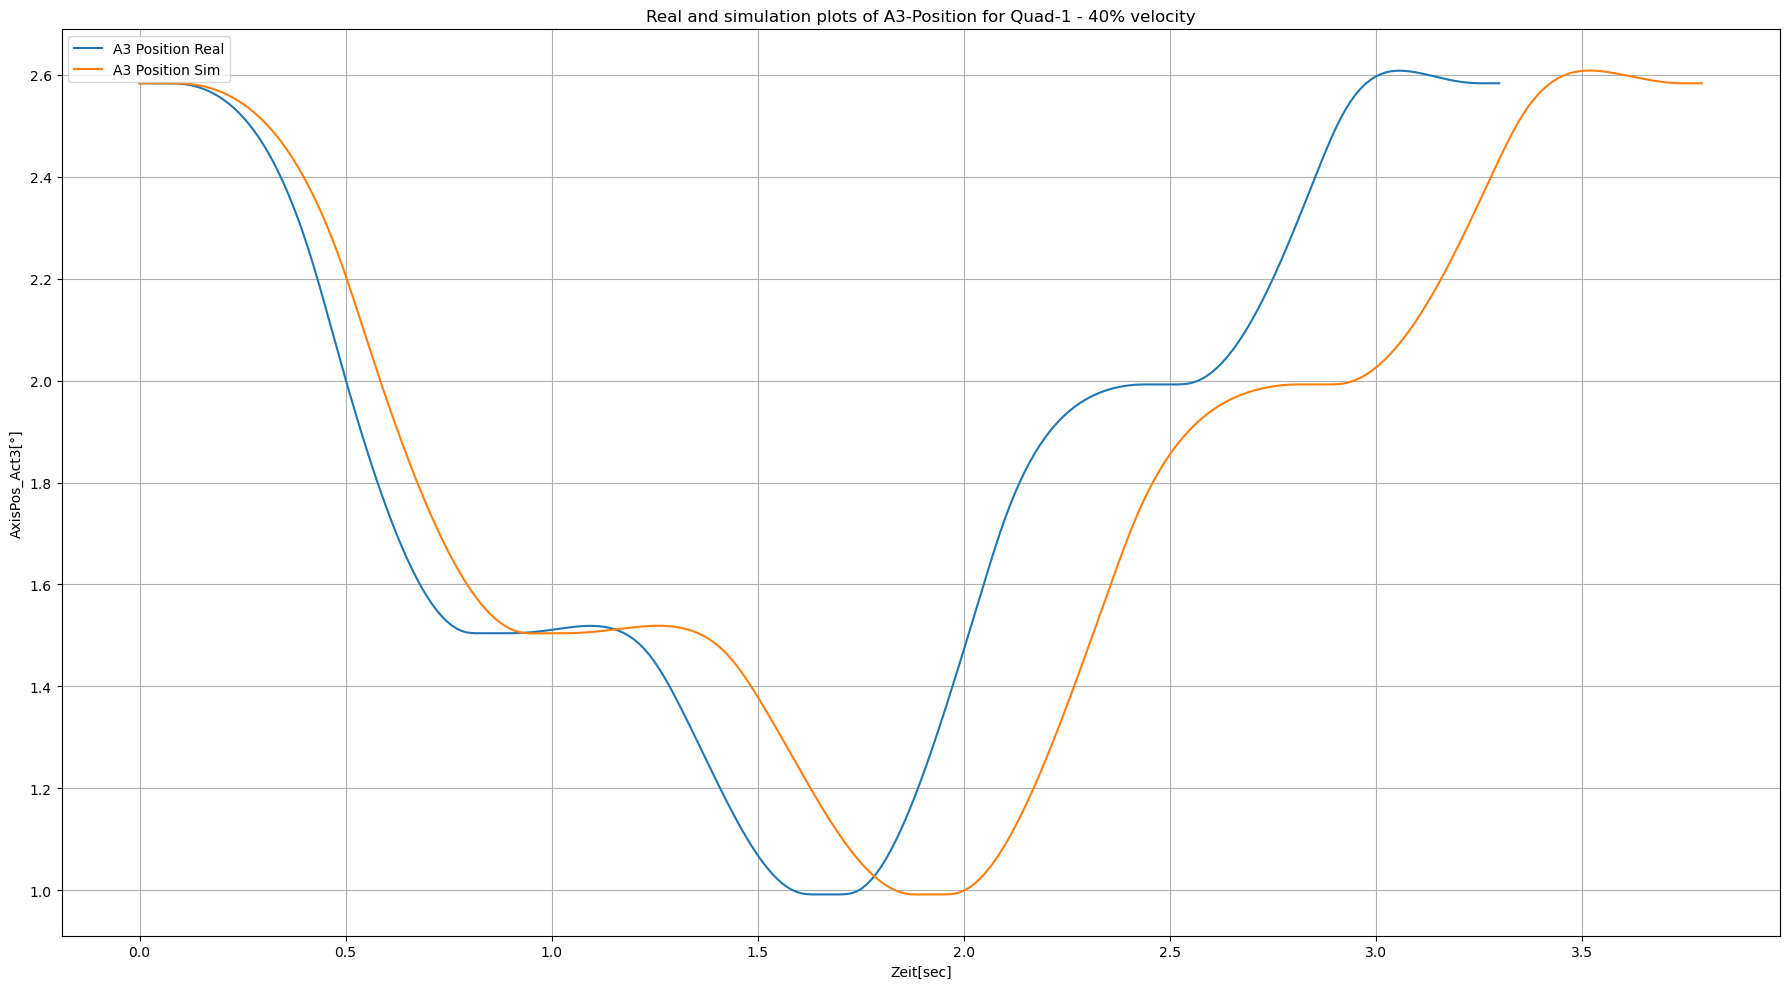

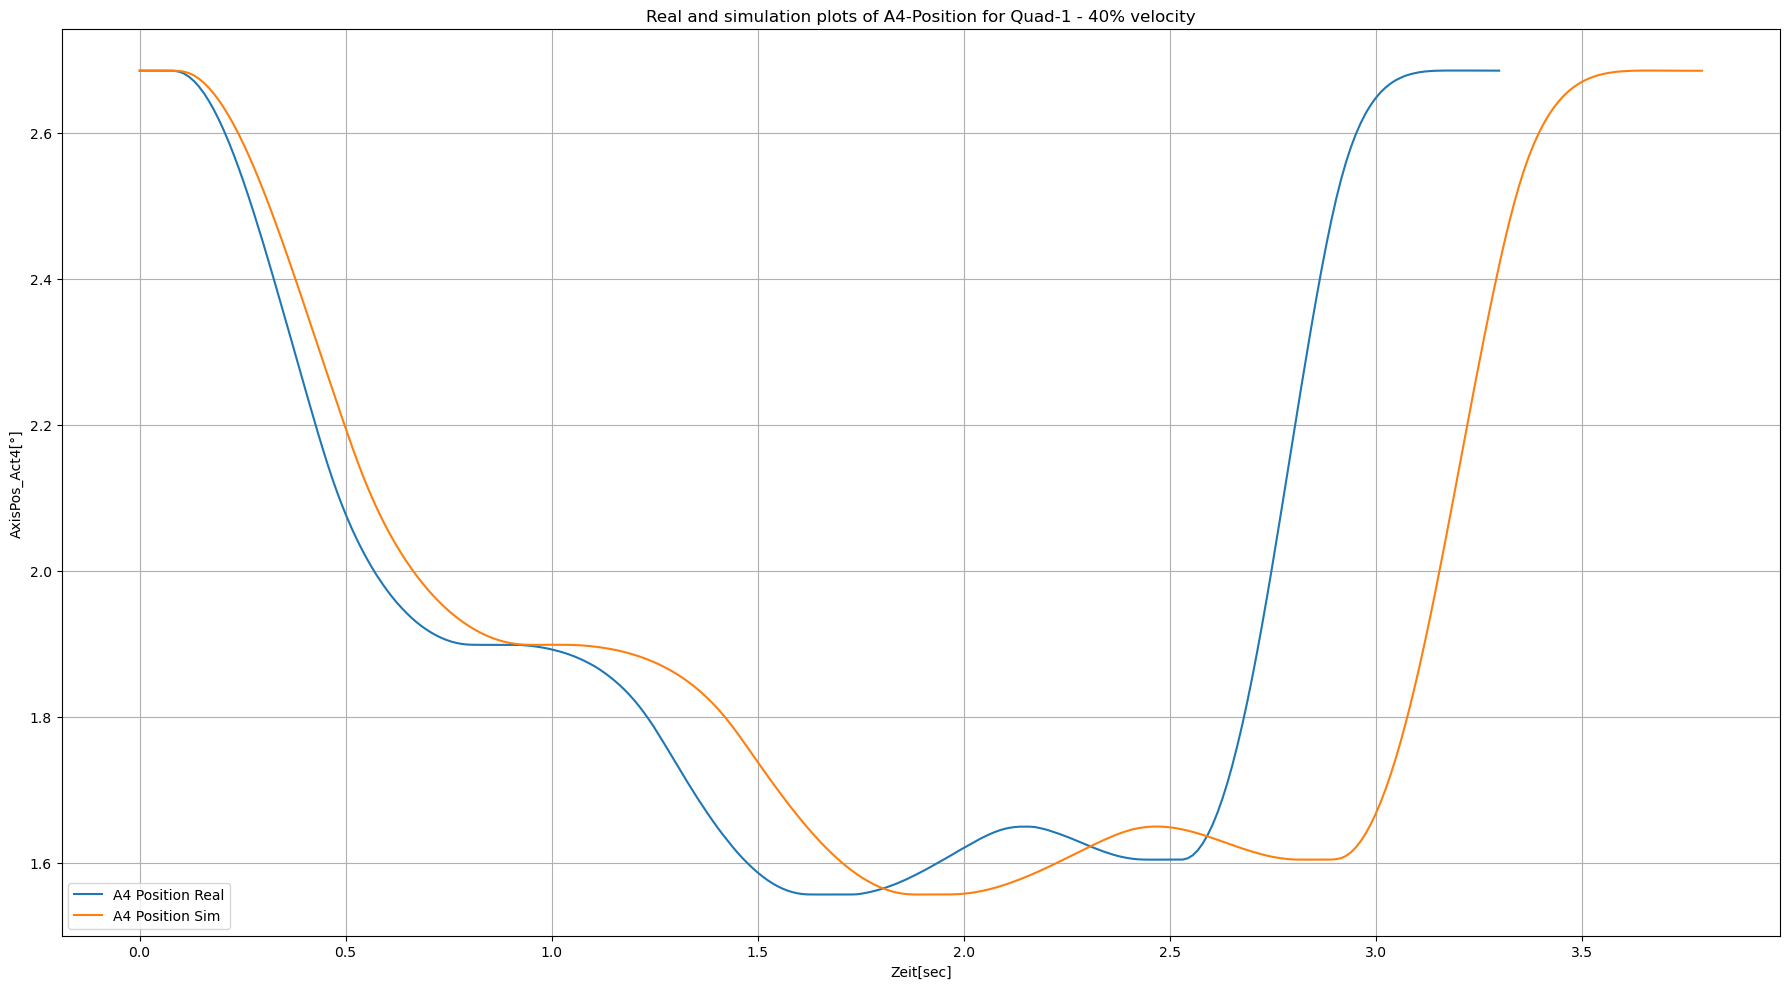

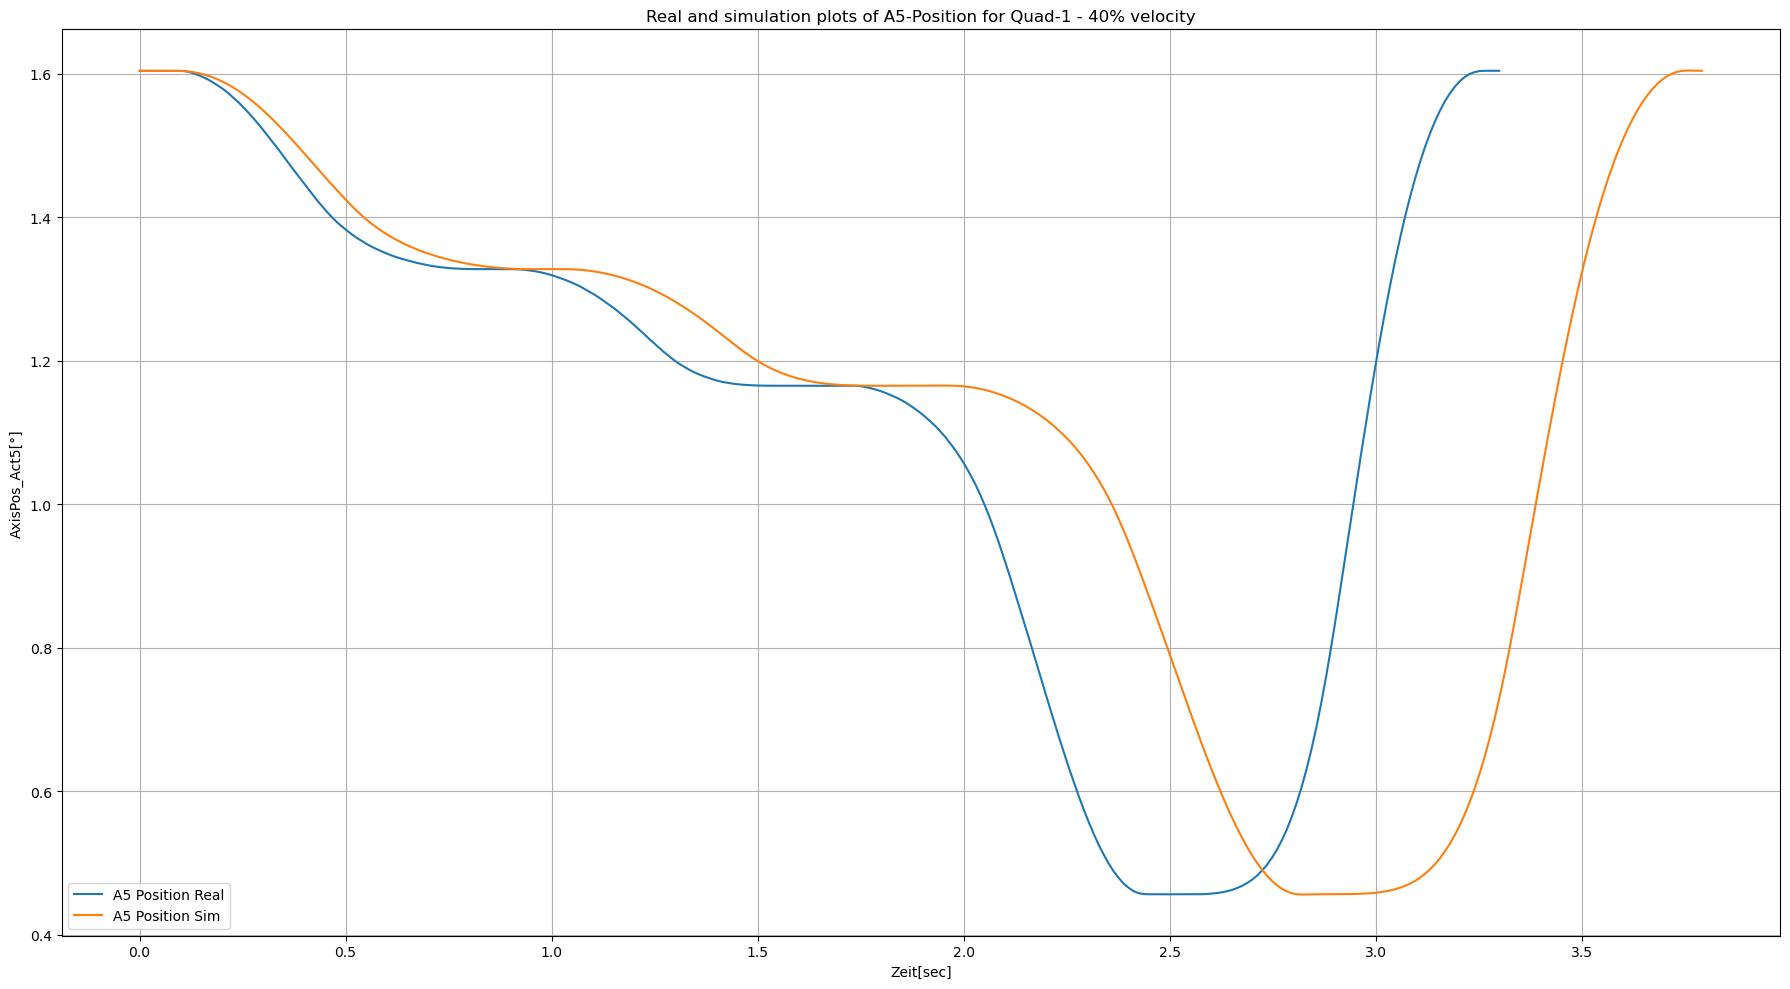

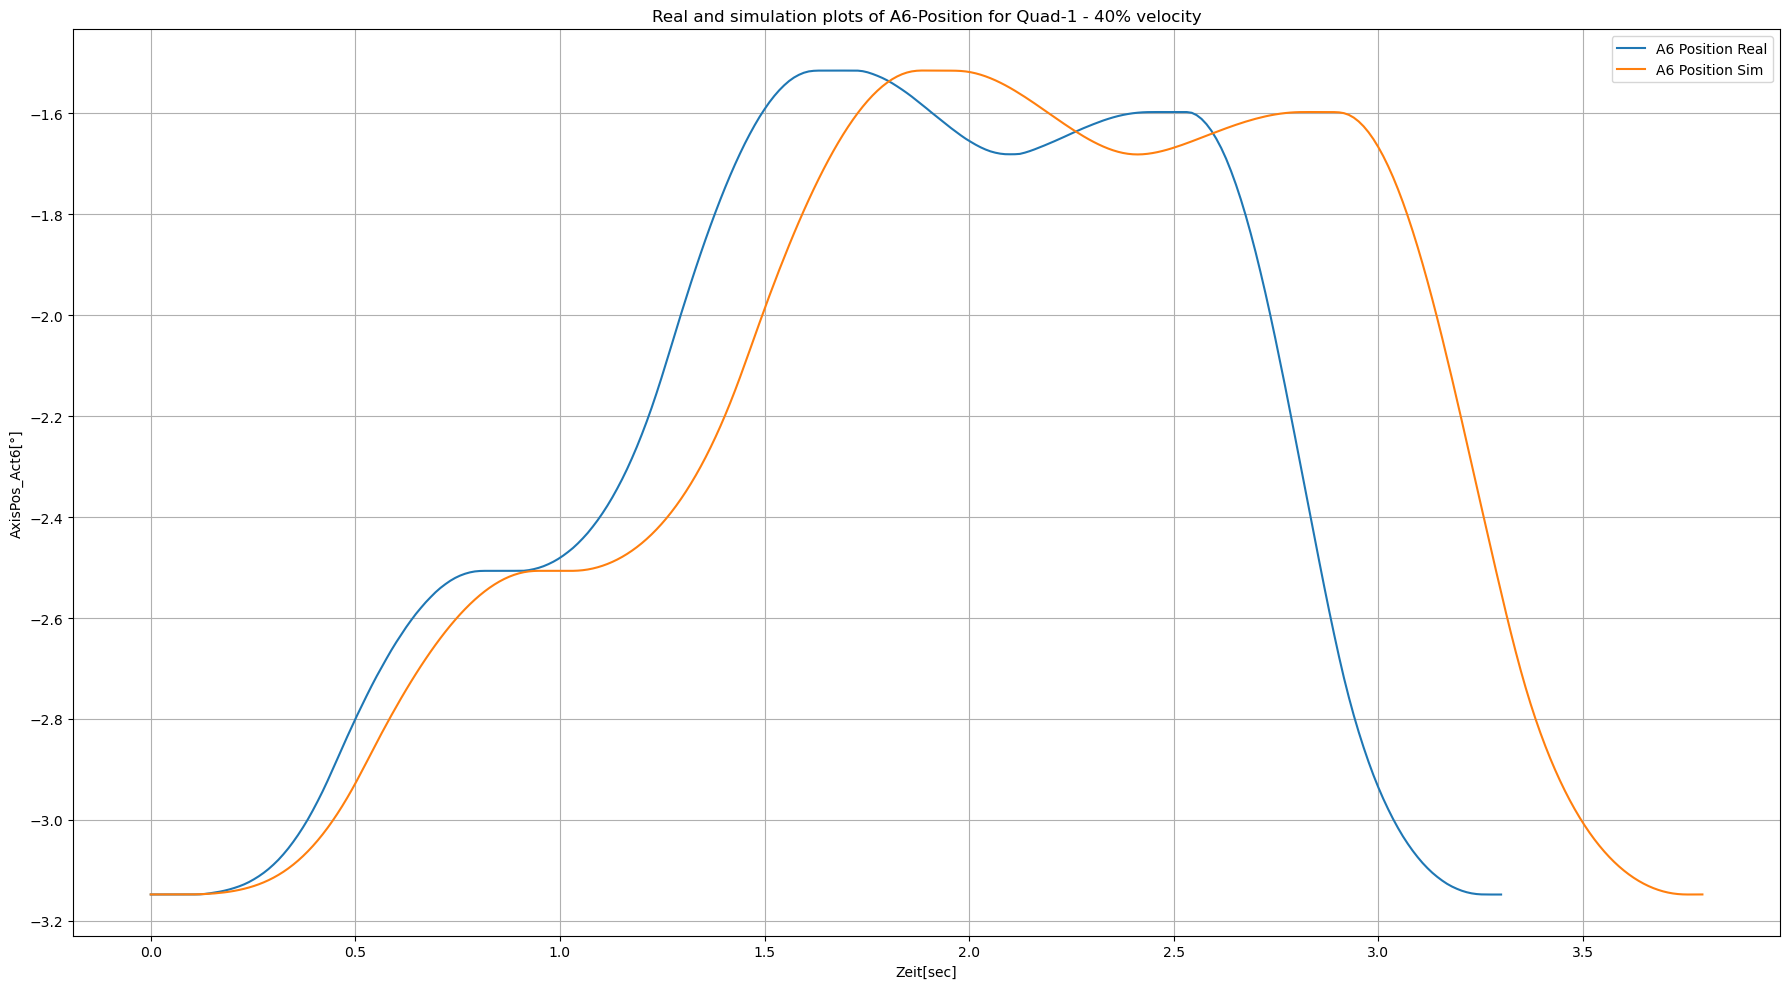

Quadrilaterl -  2


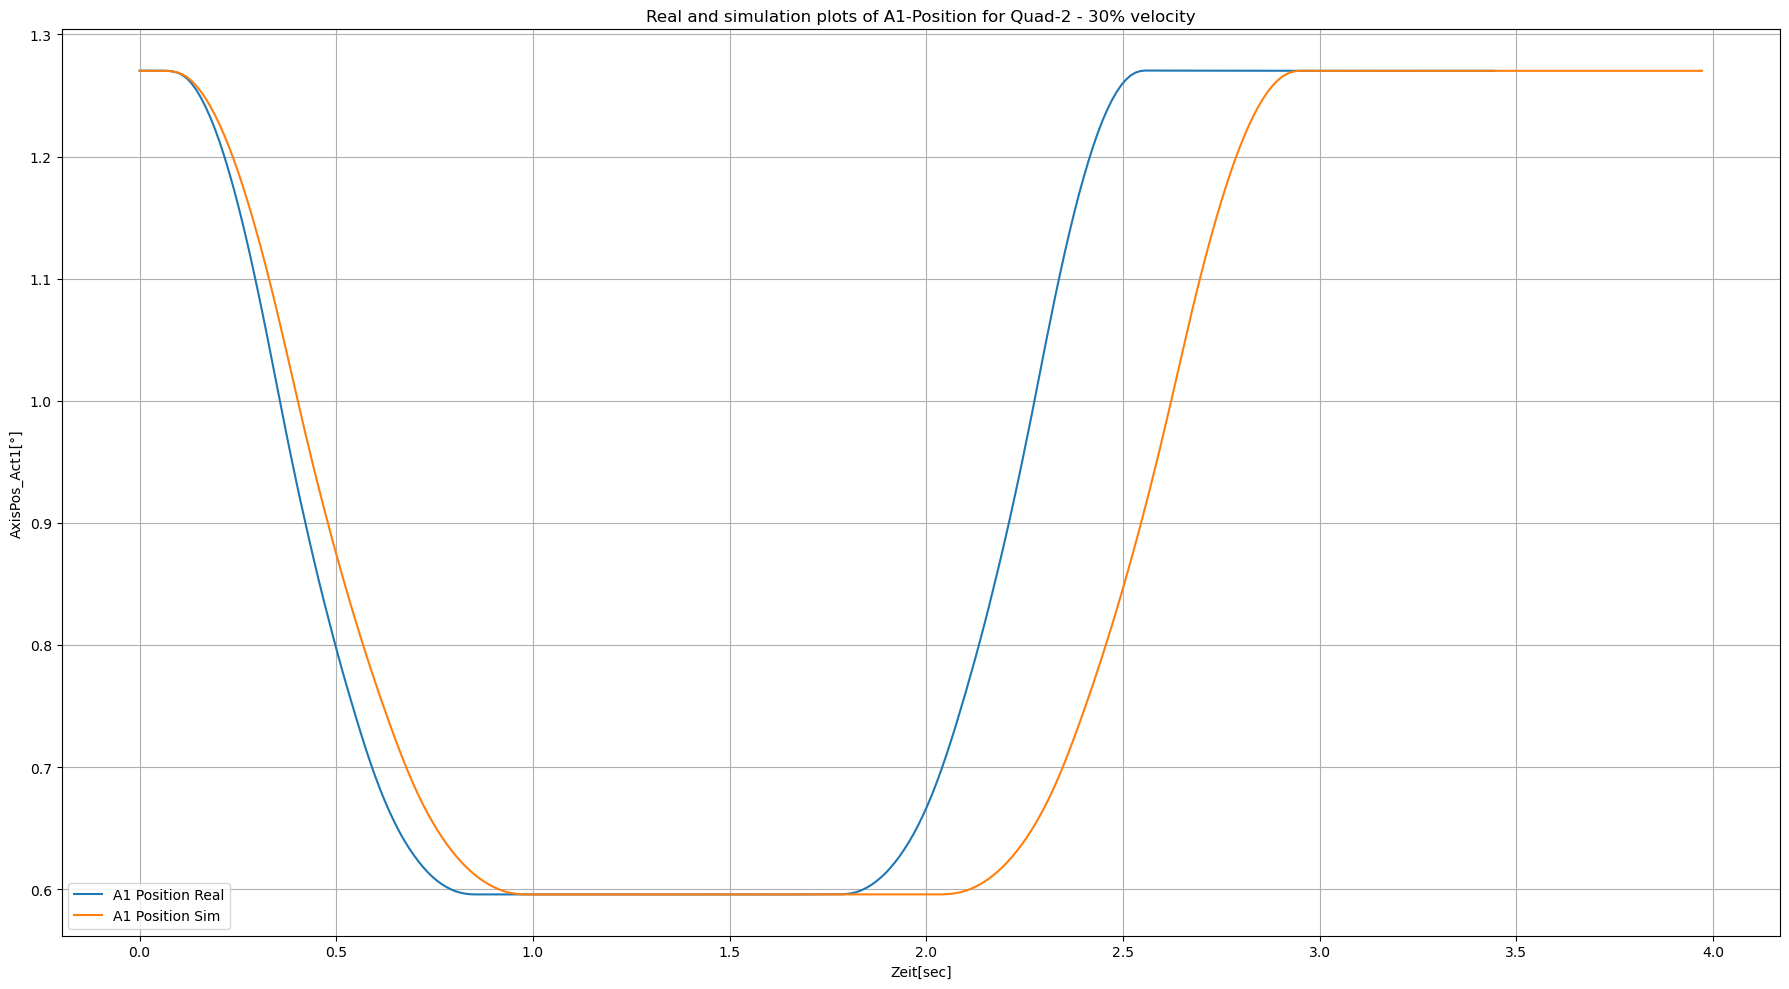

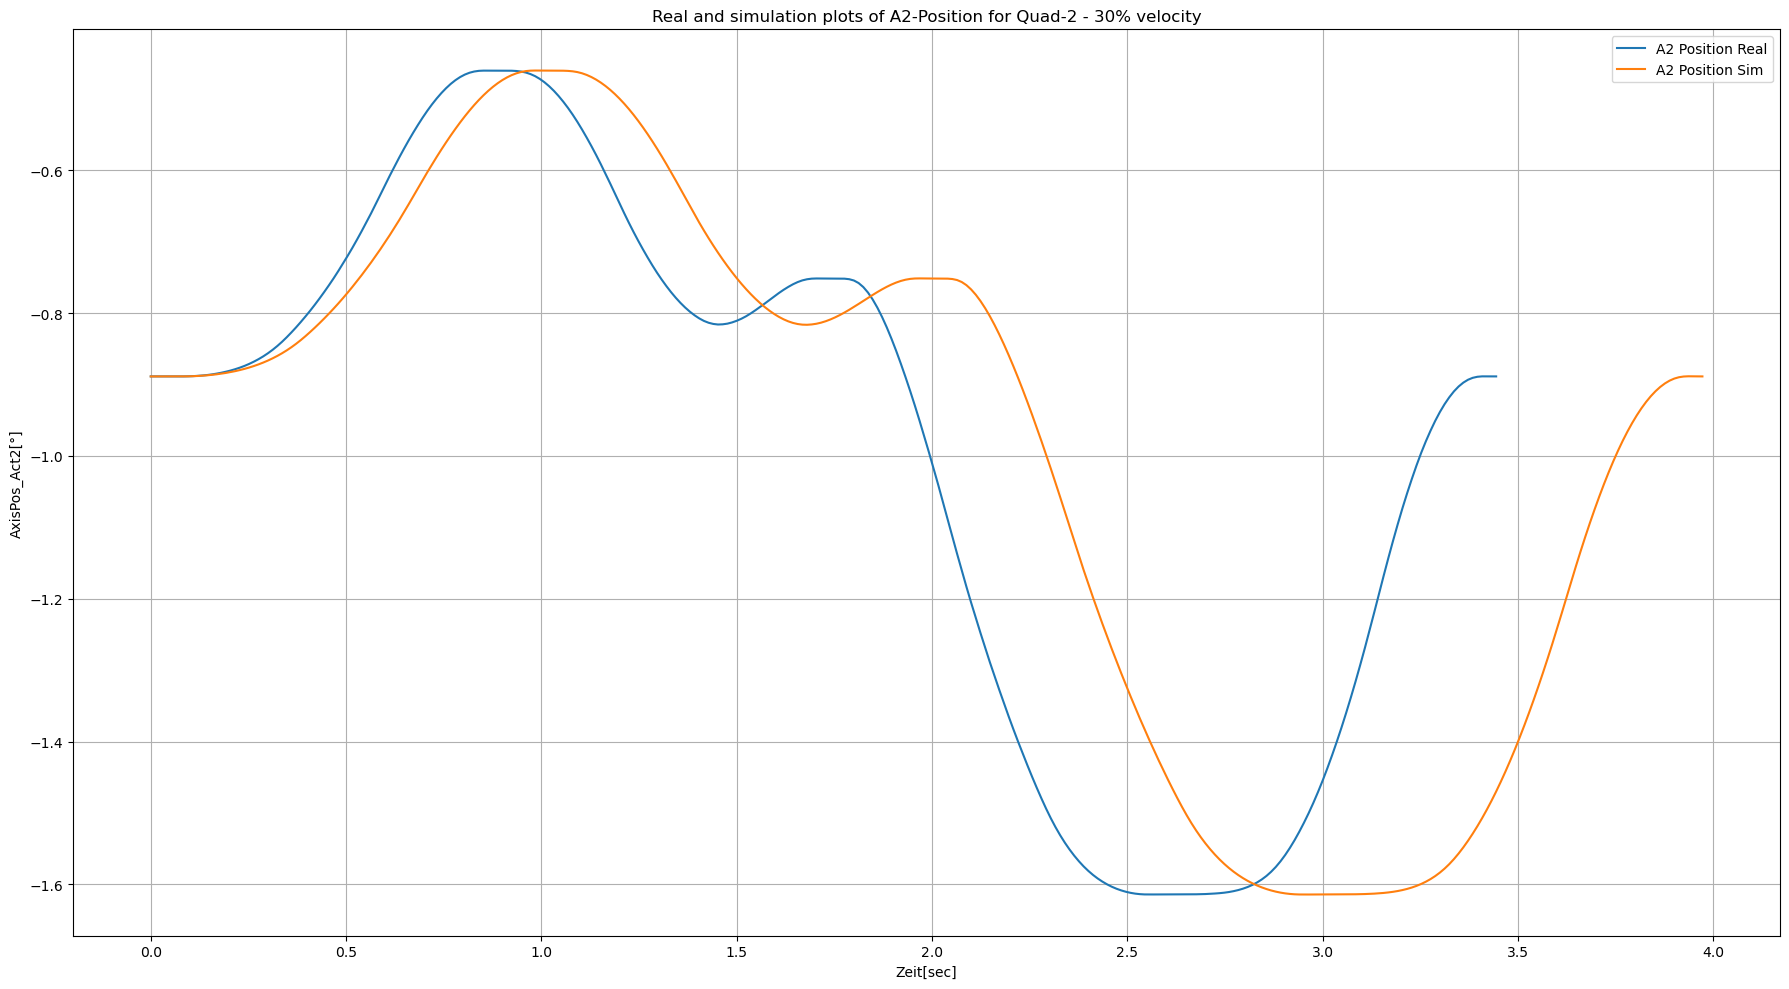

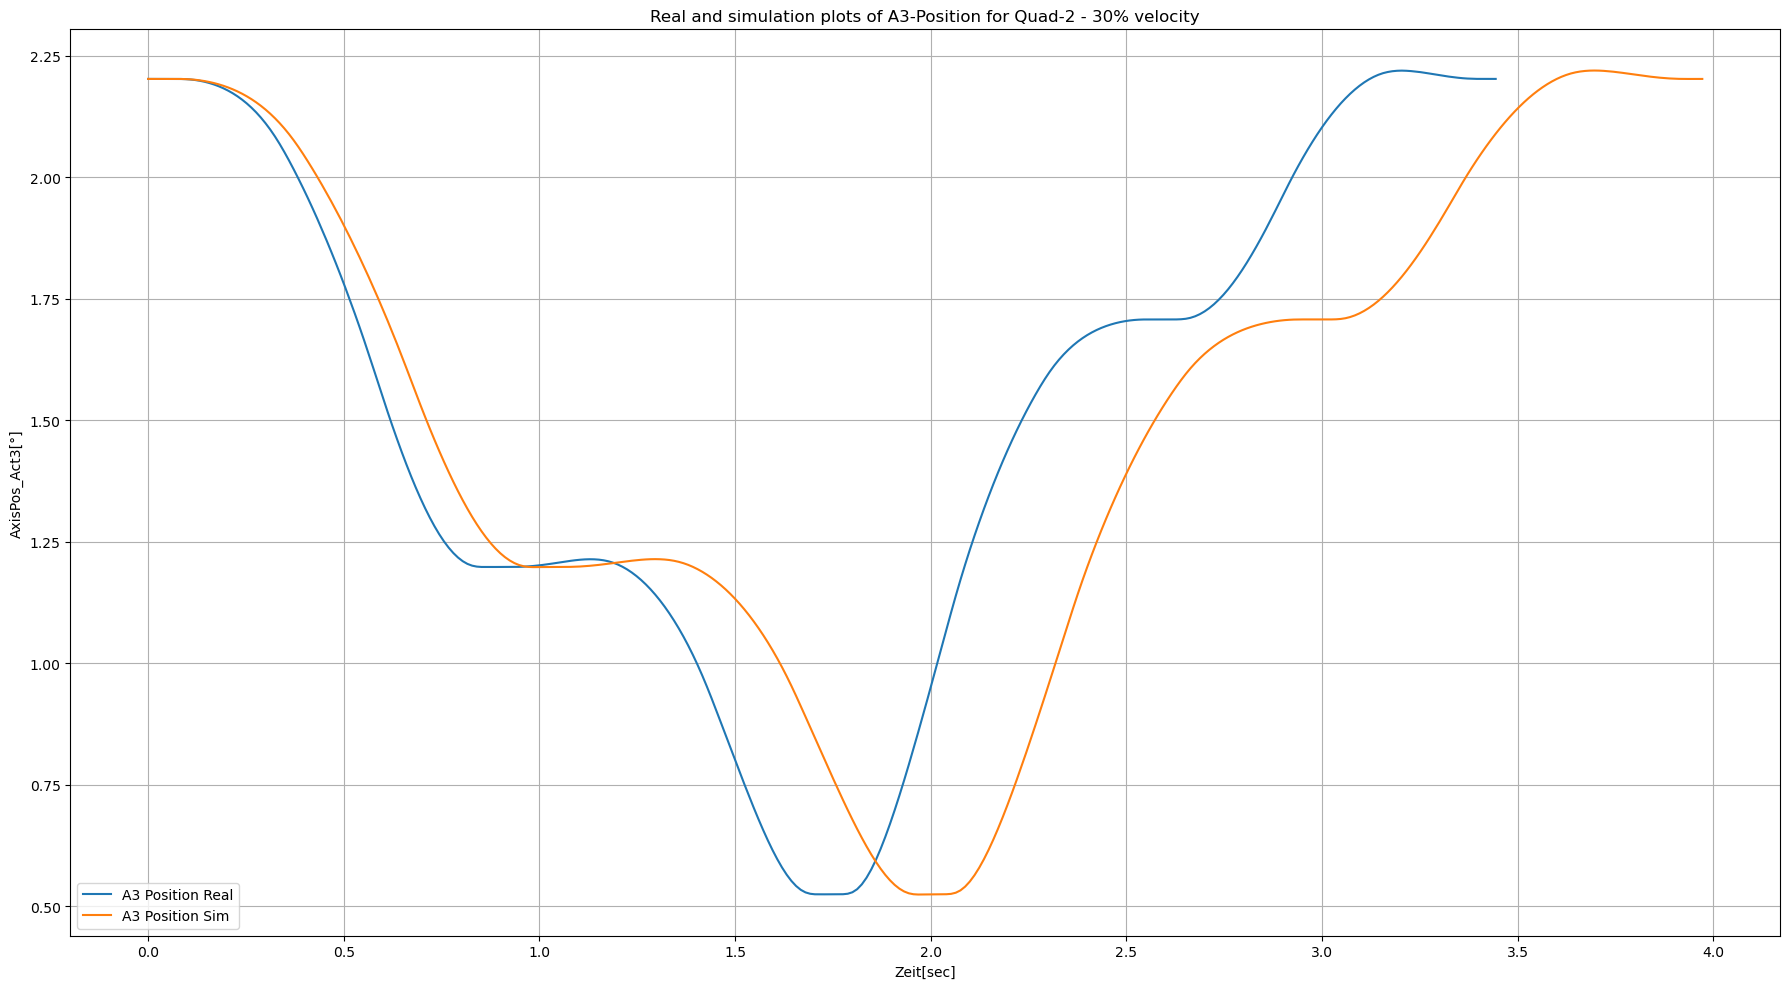

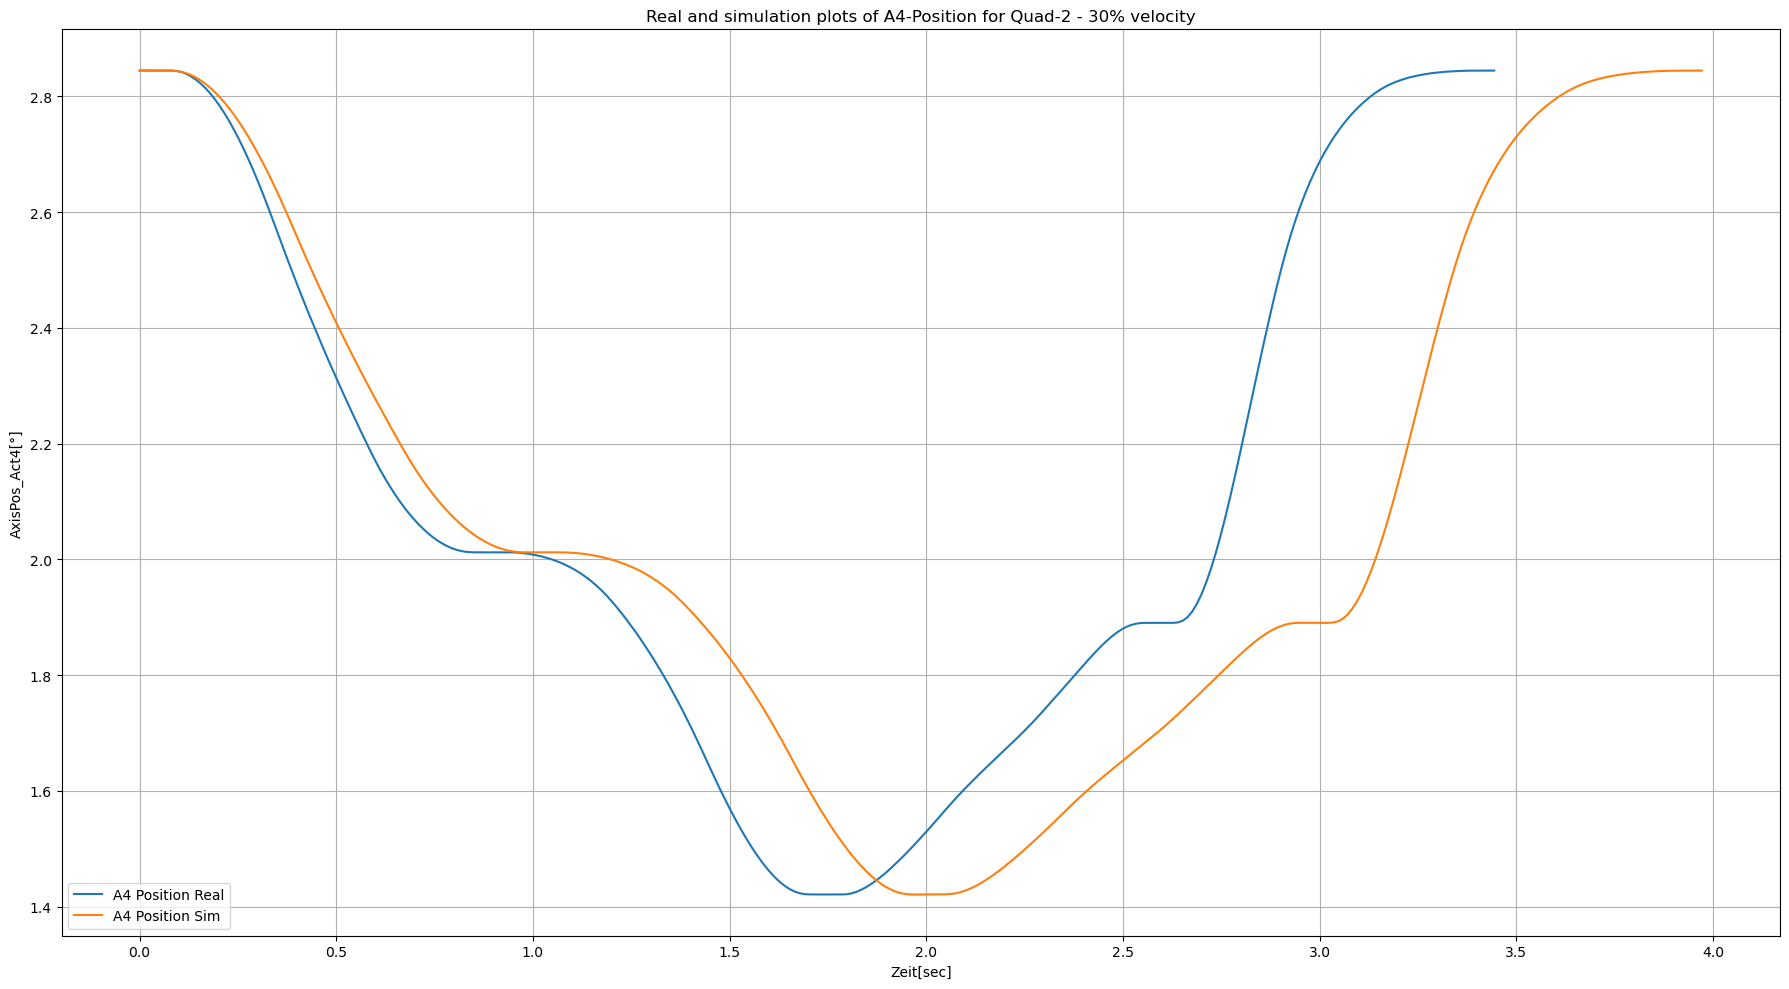

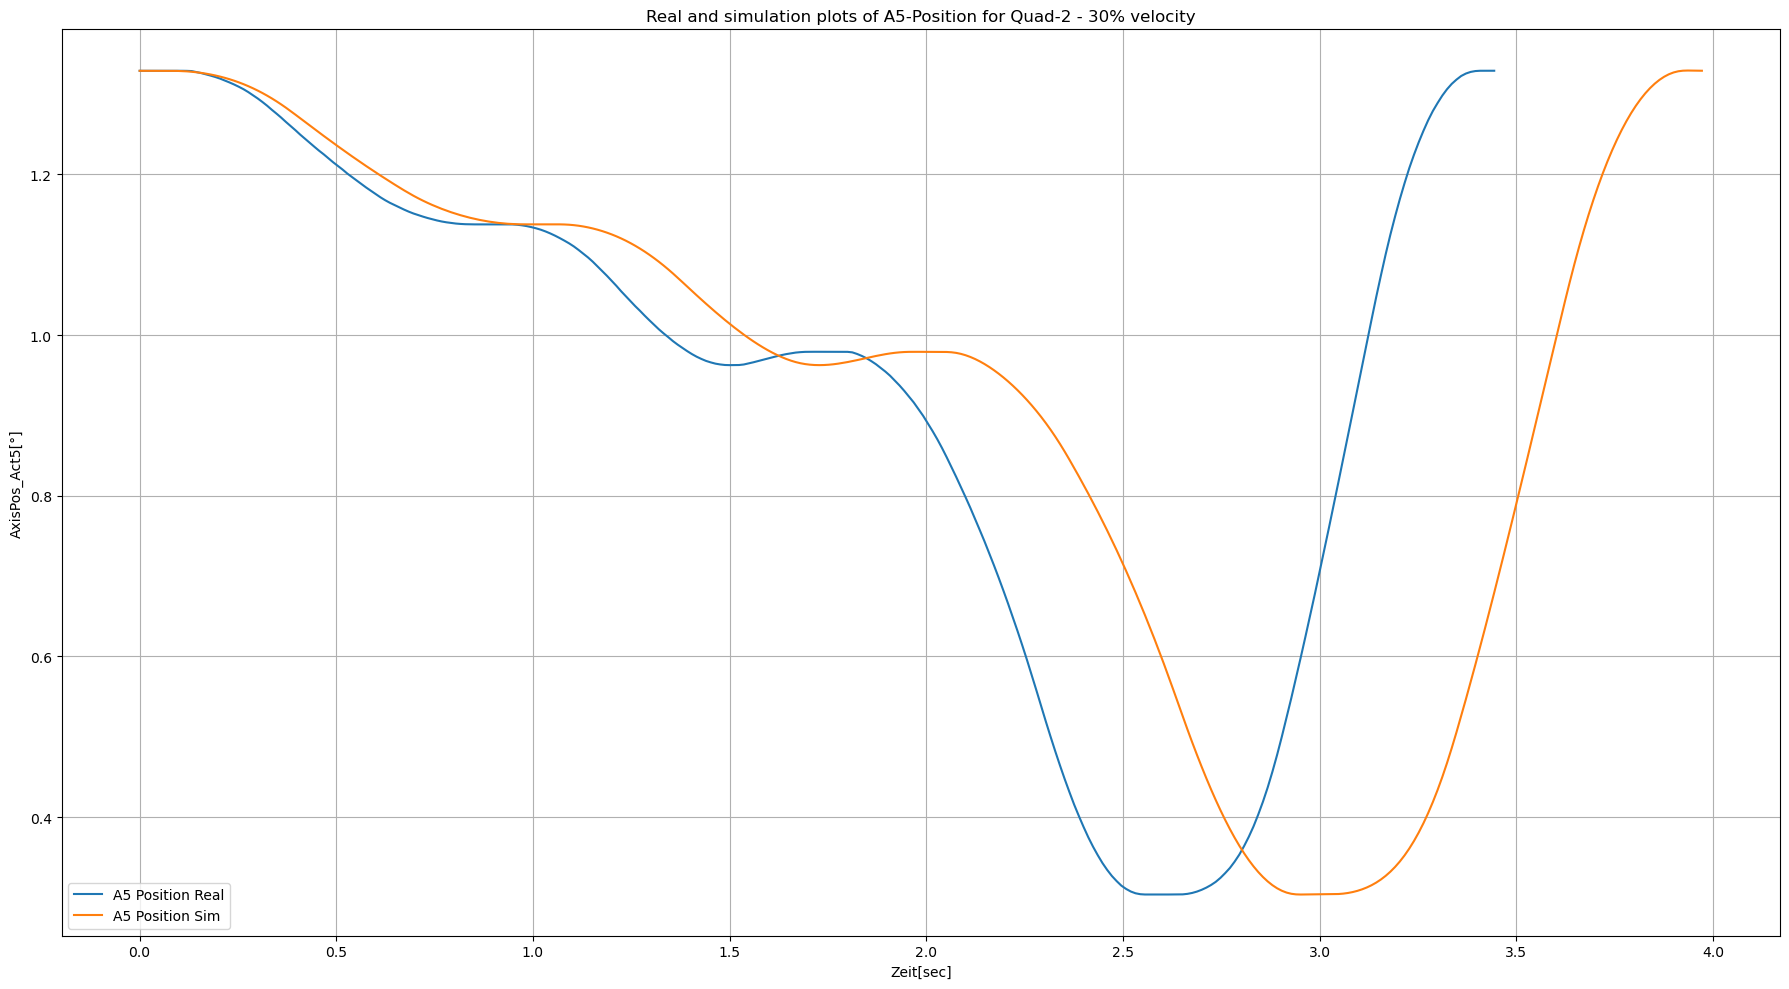

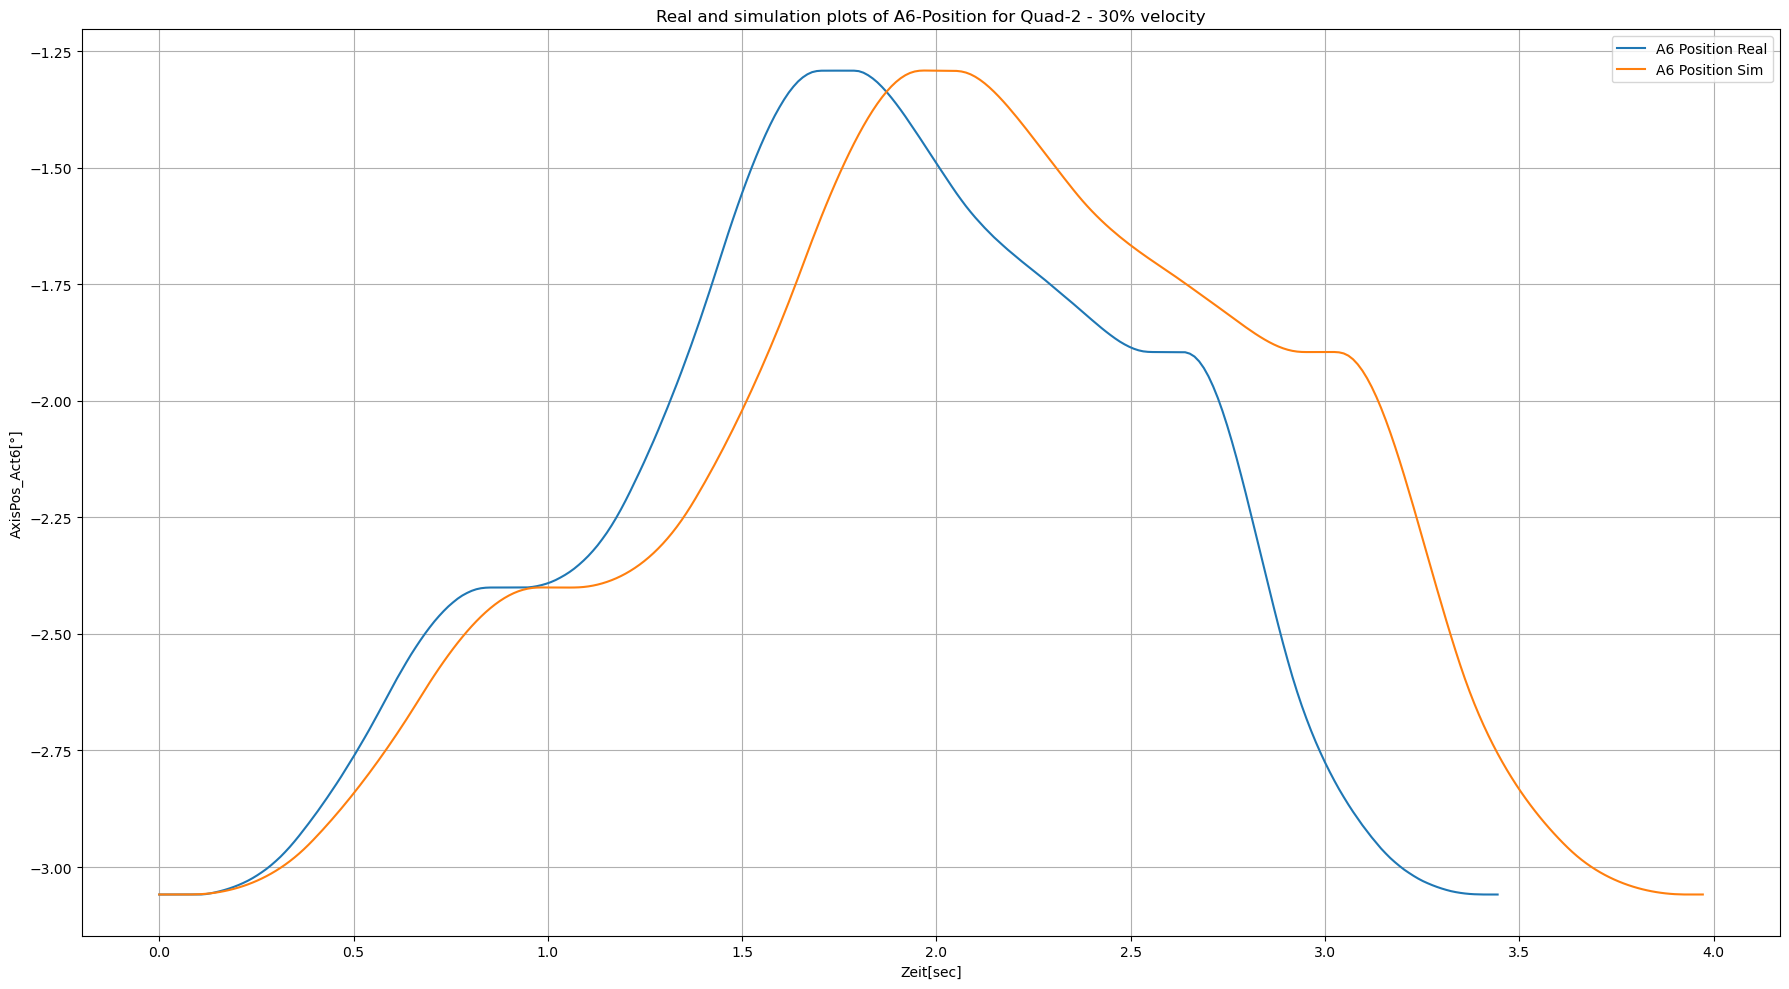

Quadrilaterl -  3


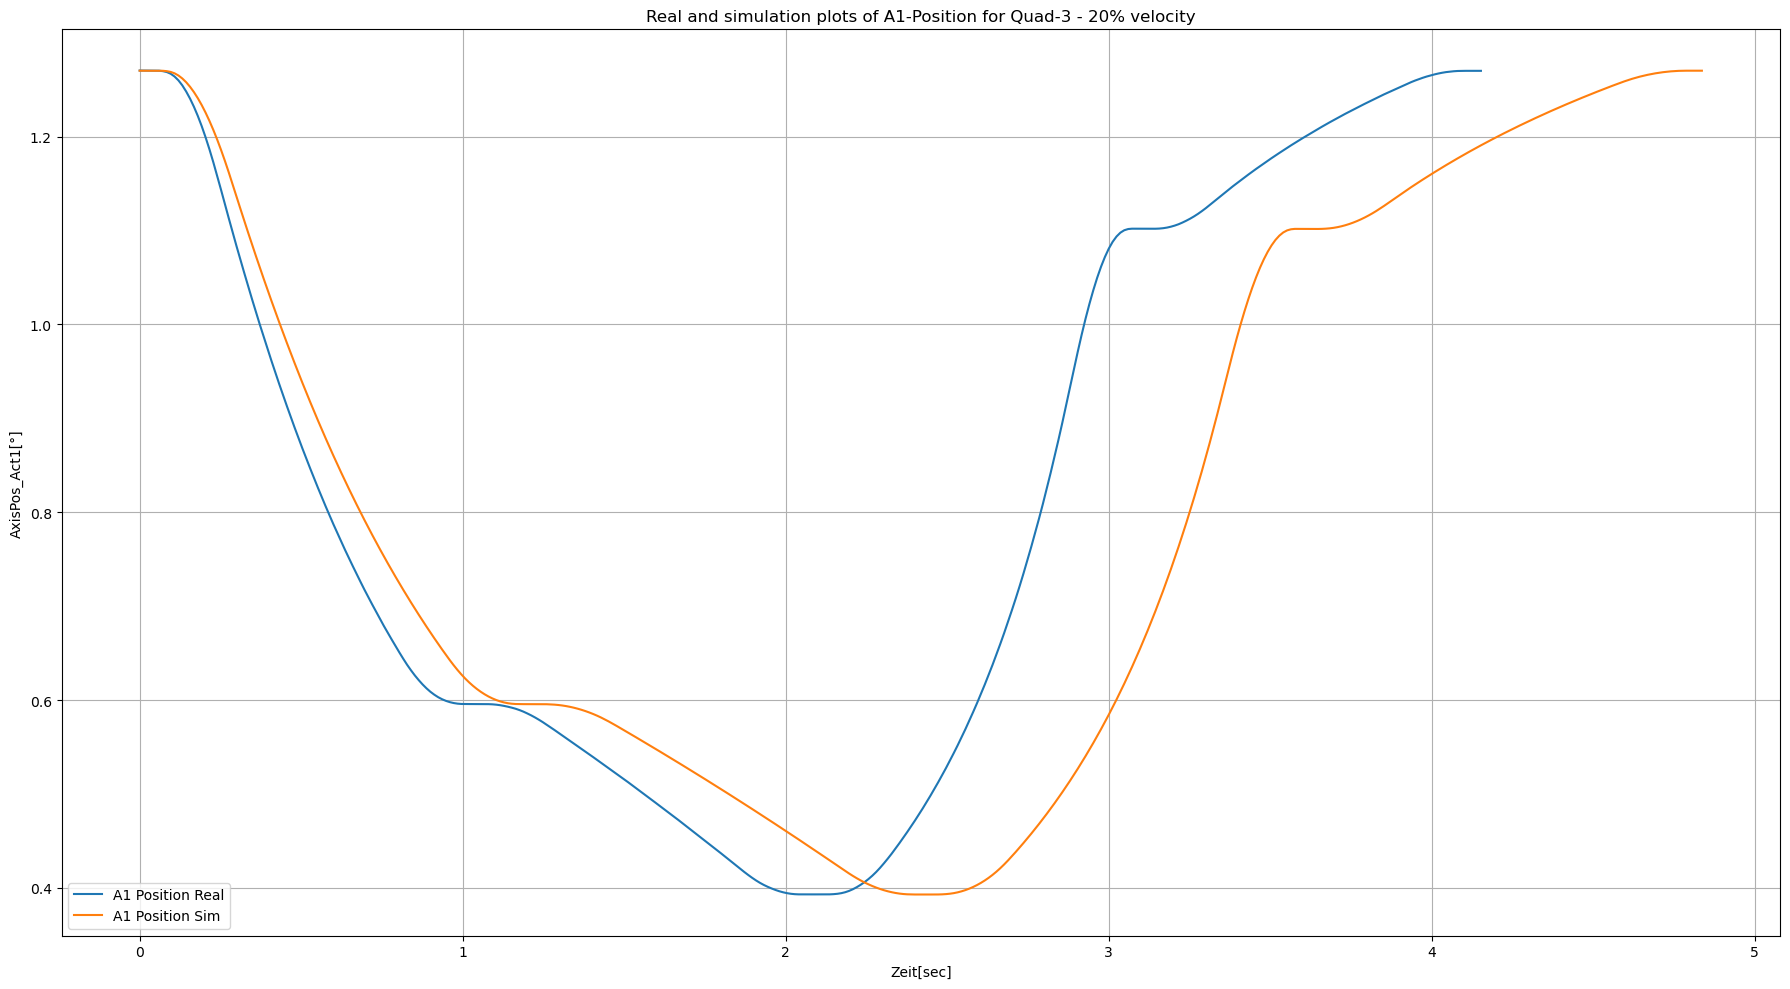

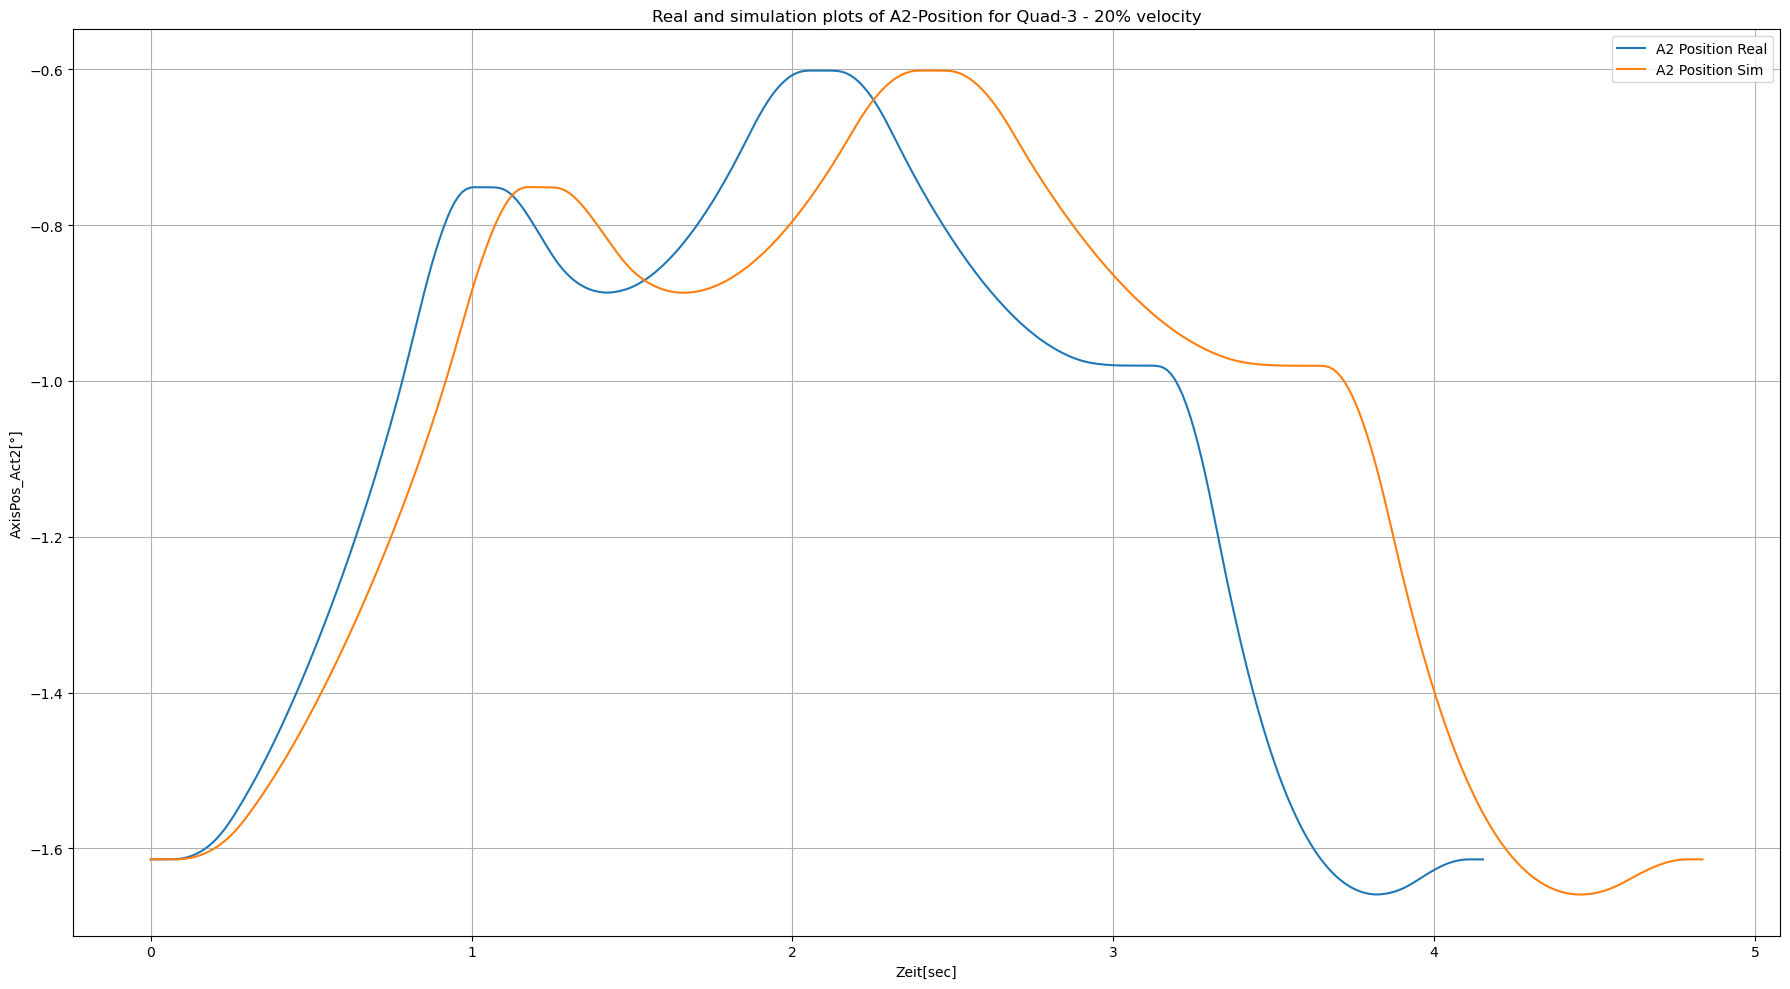

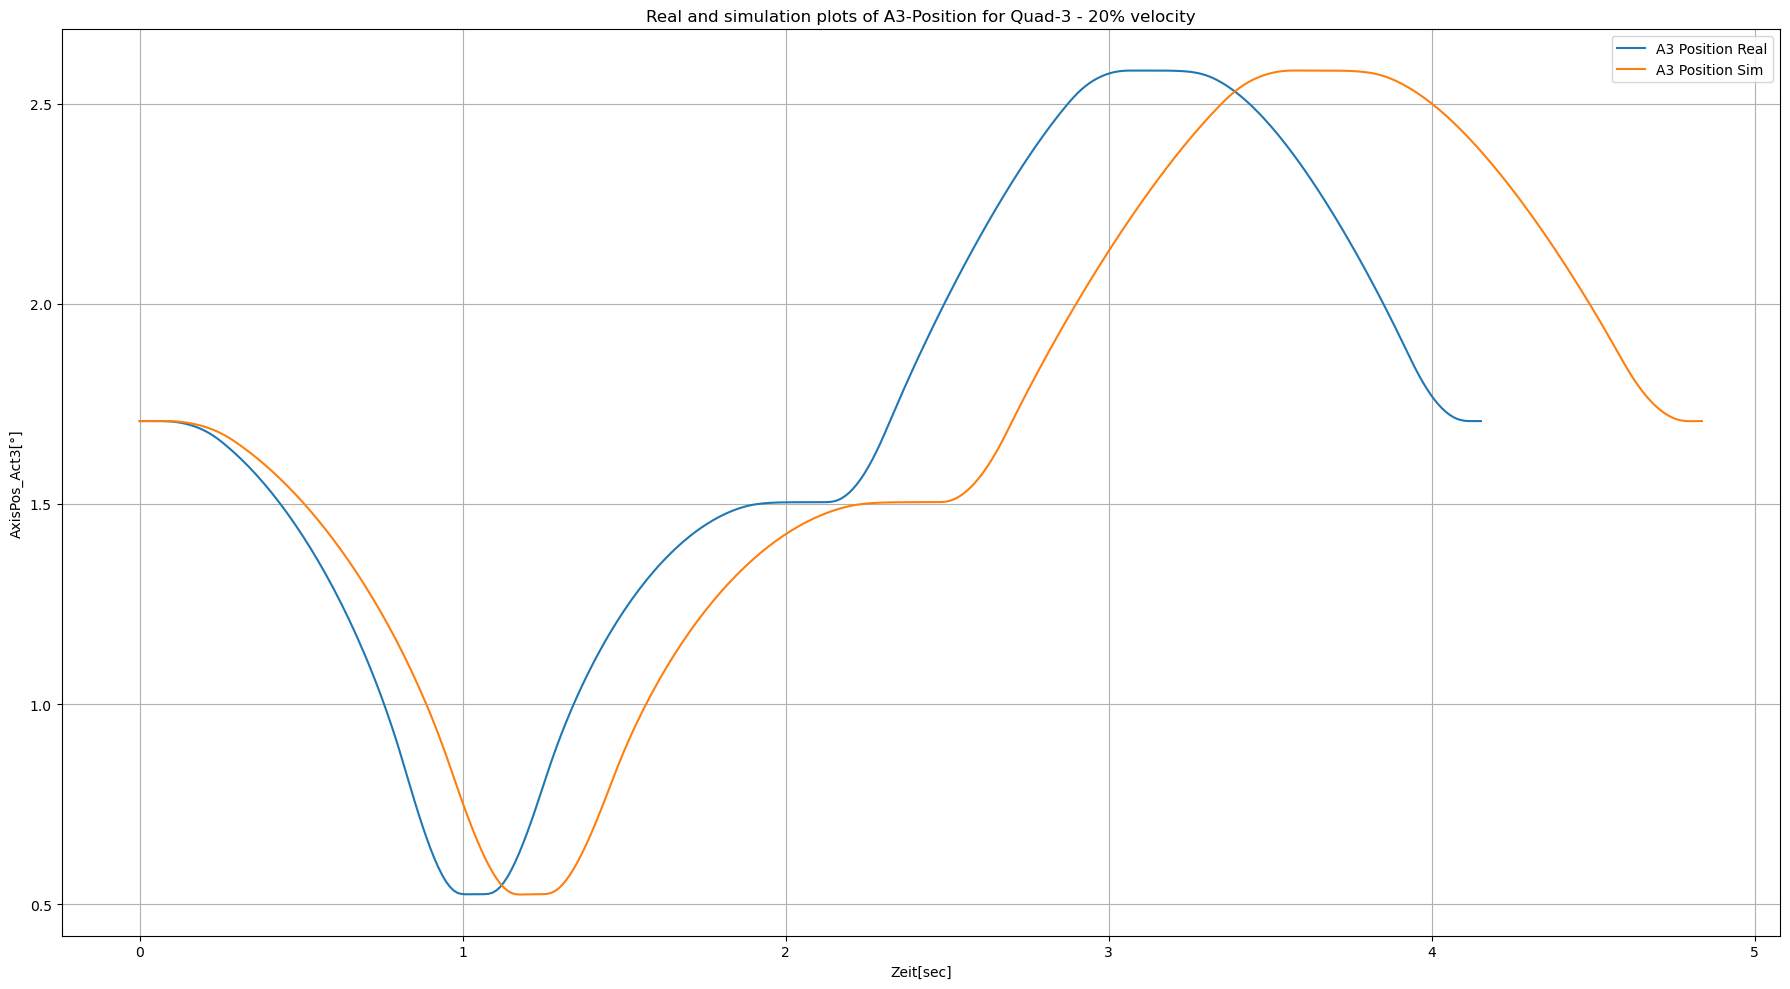

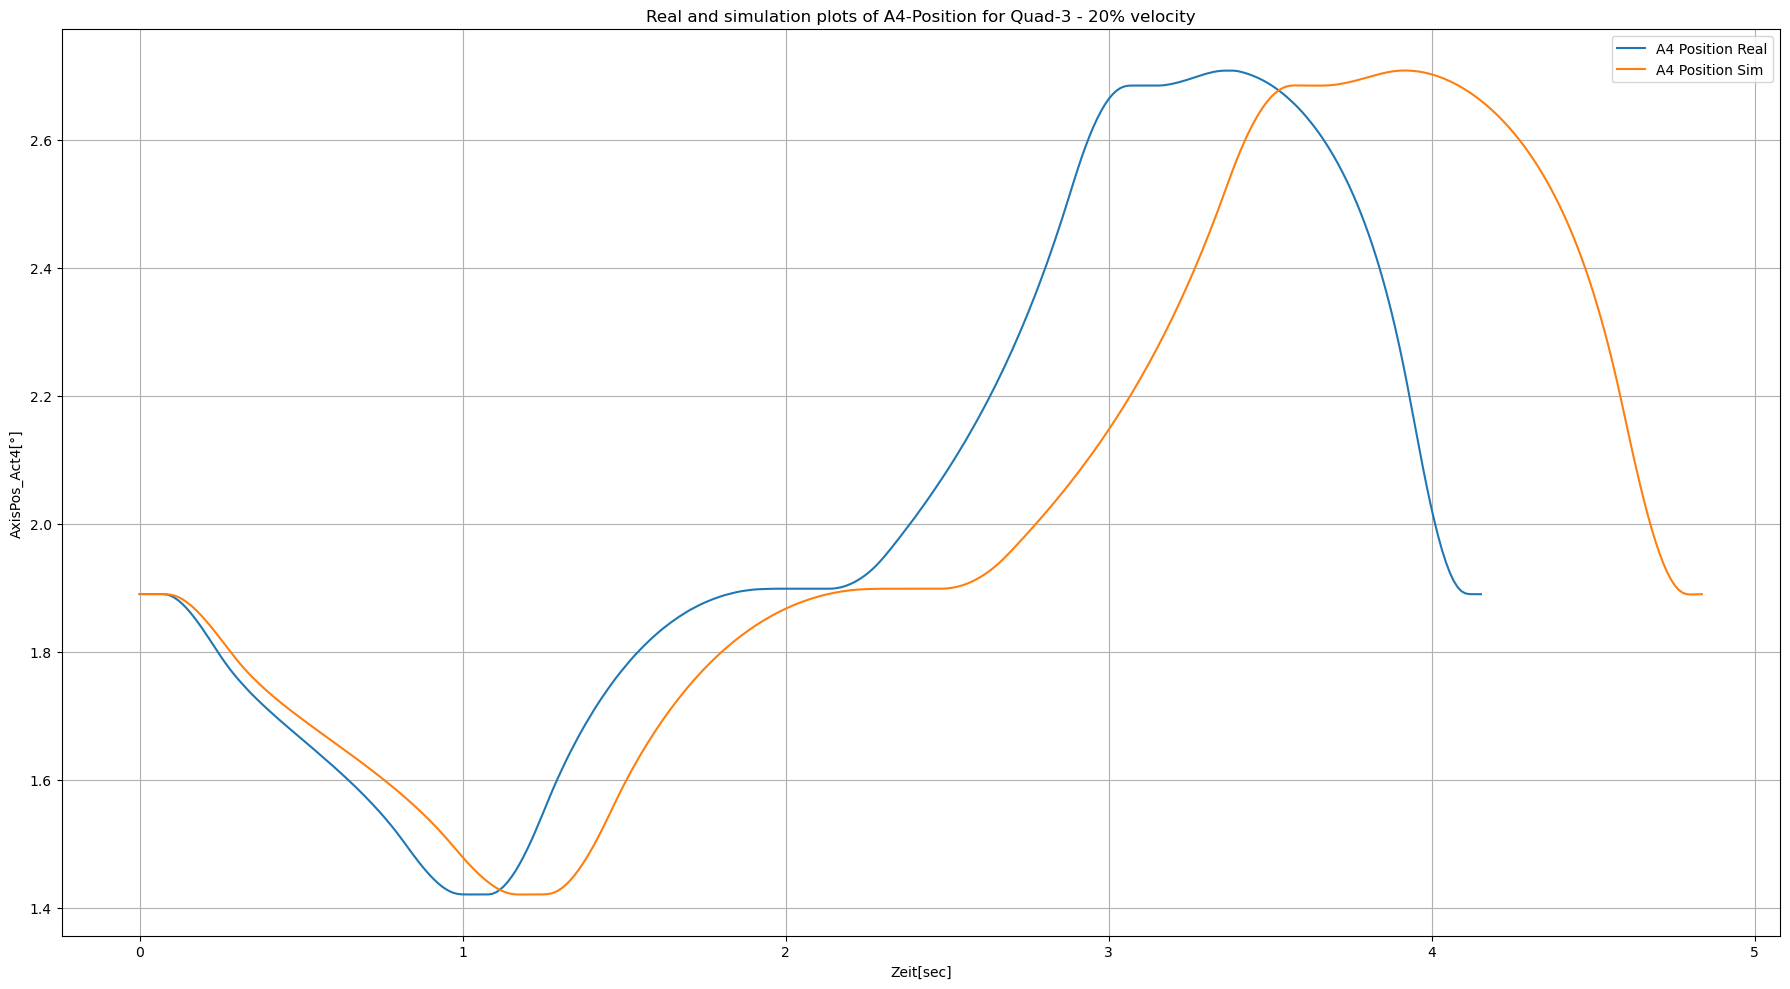

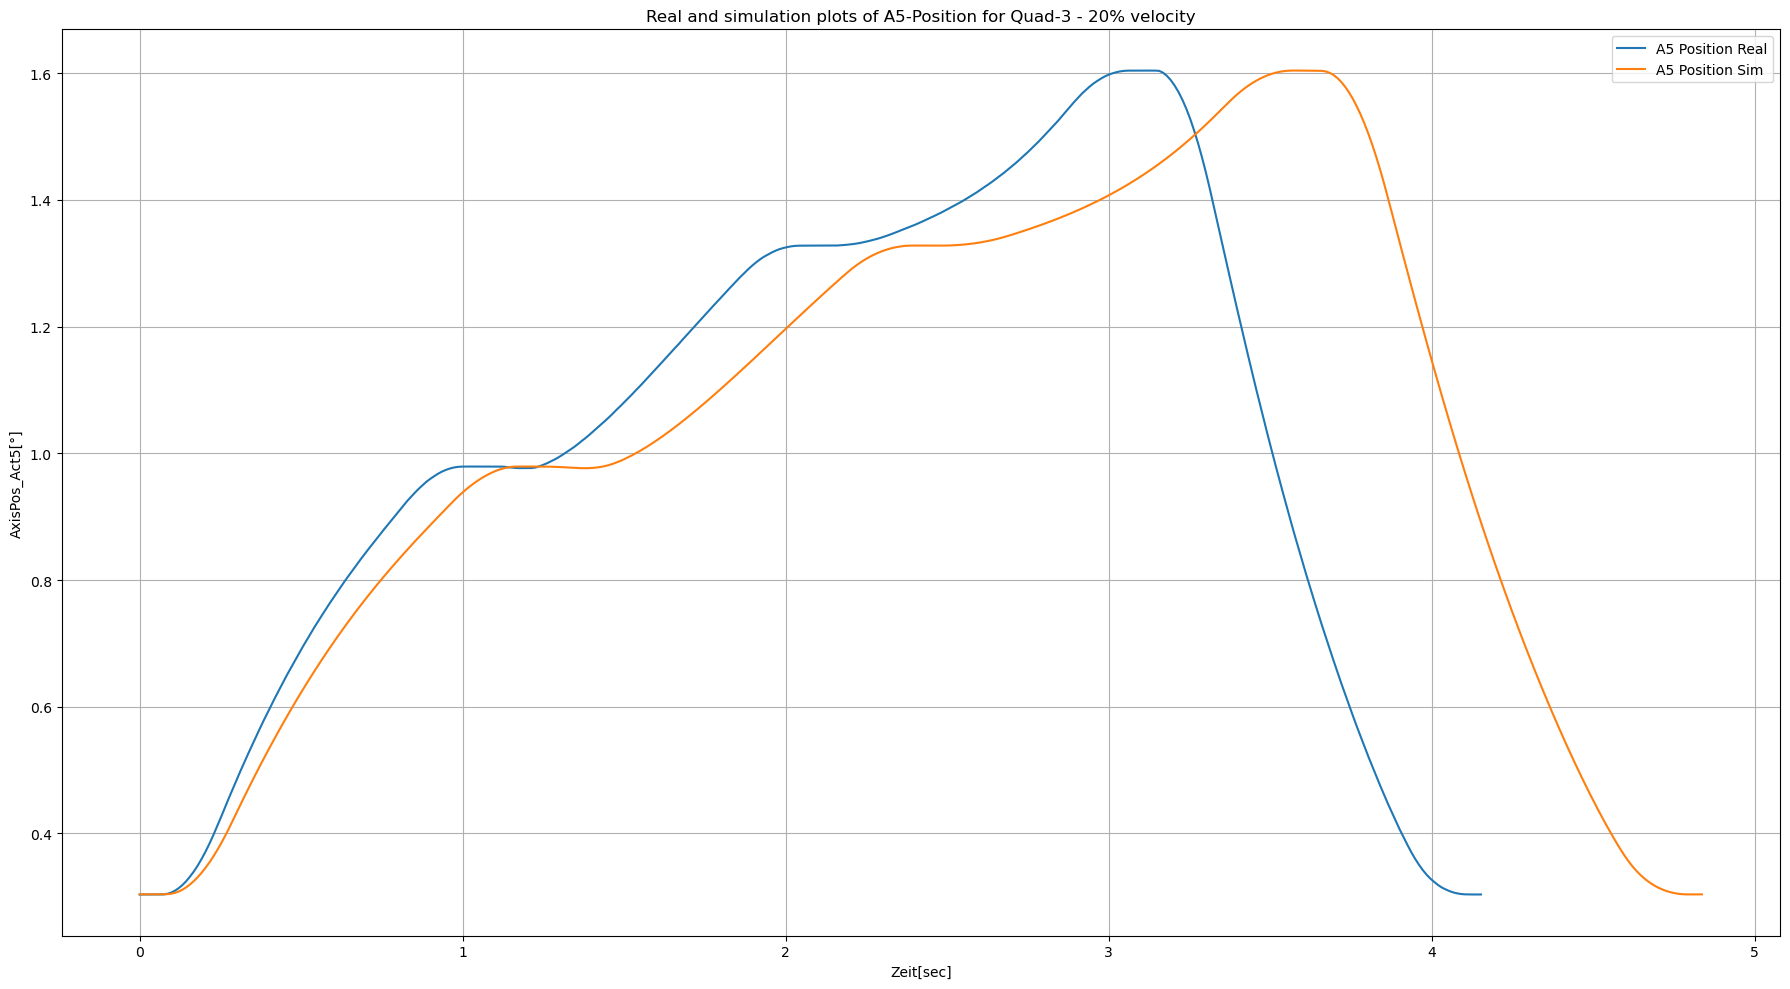

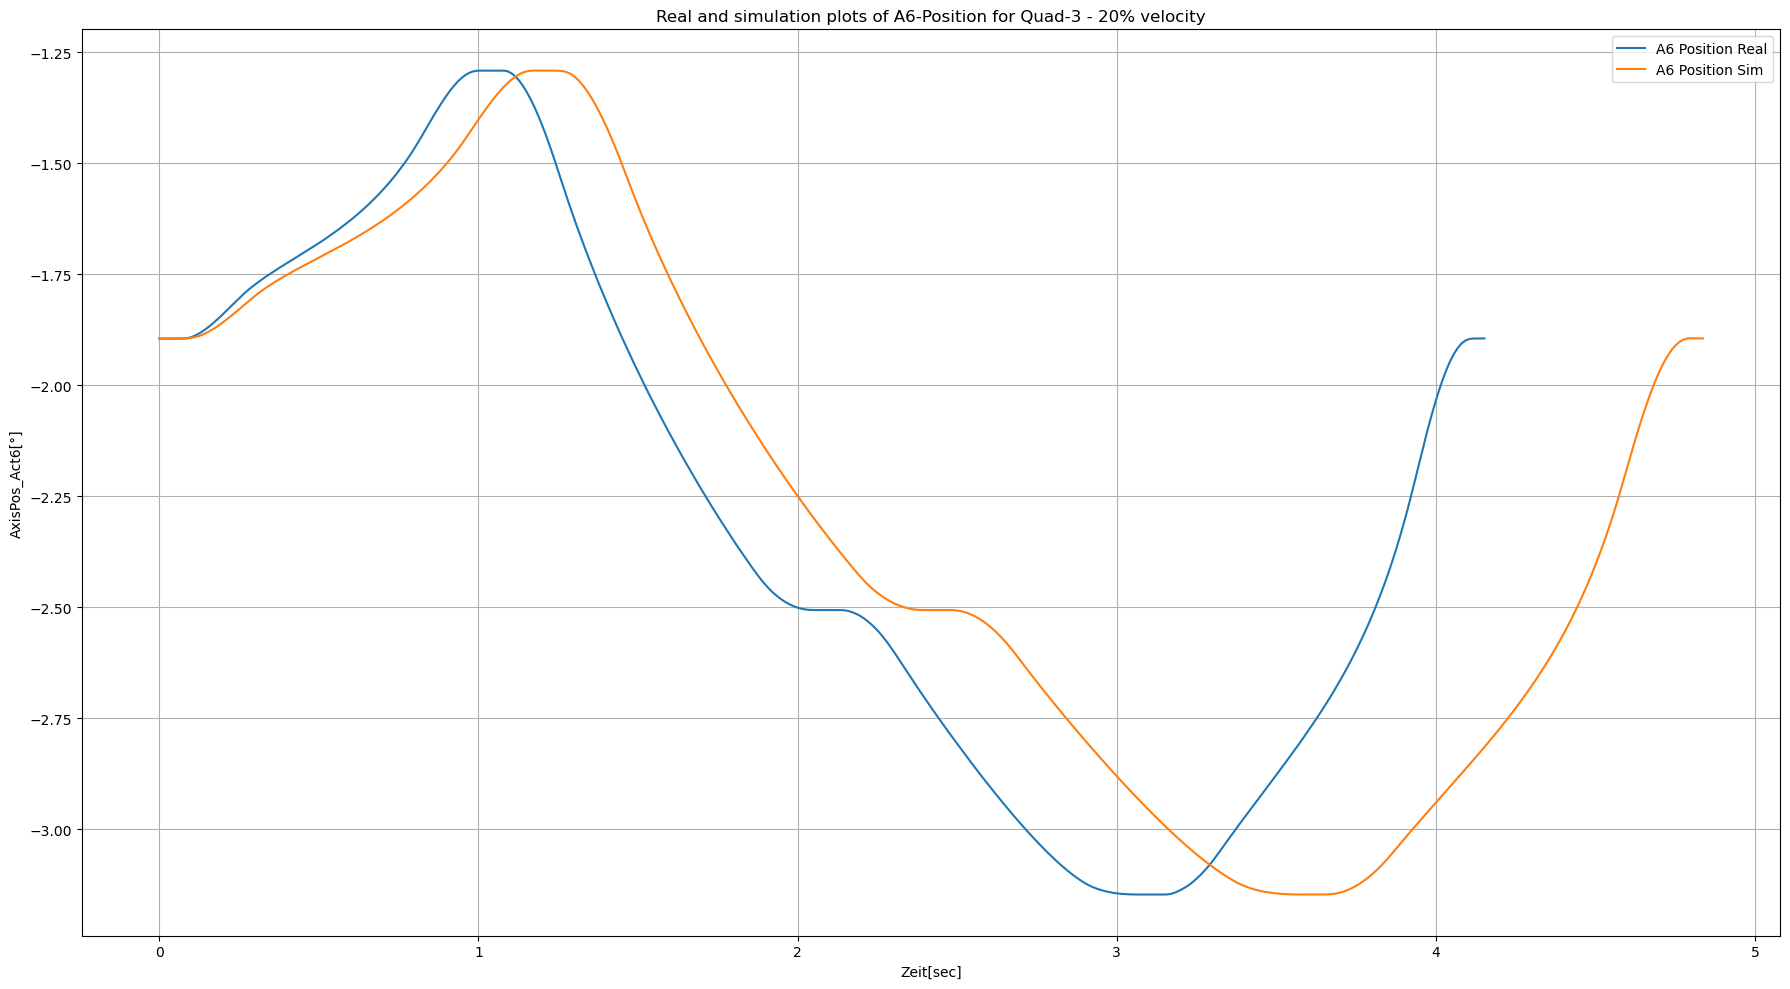

Quadrilaterl -  4


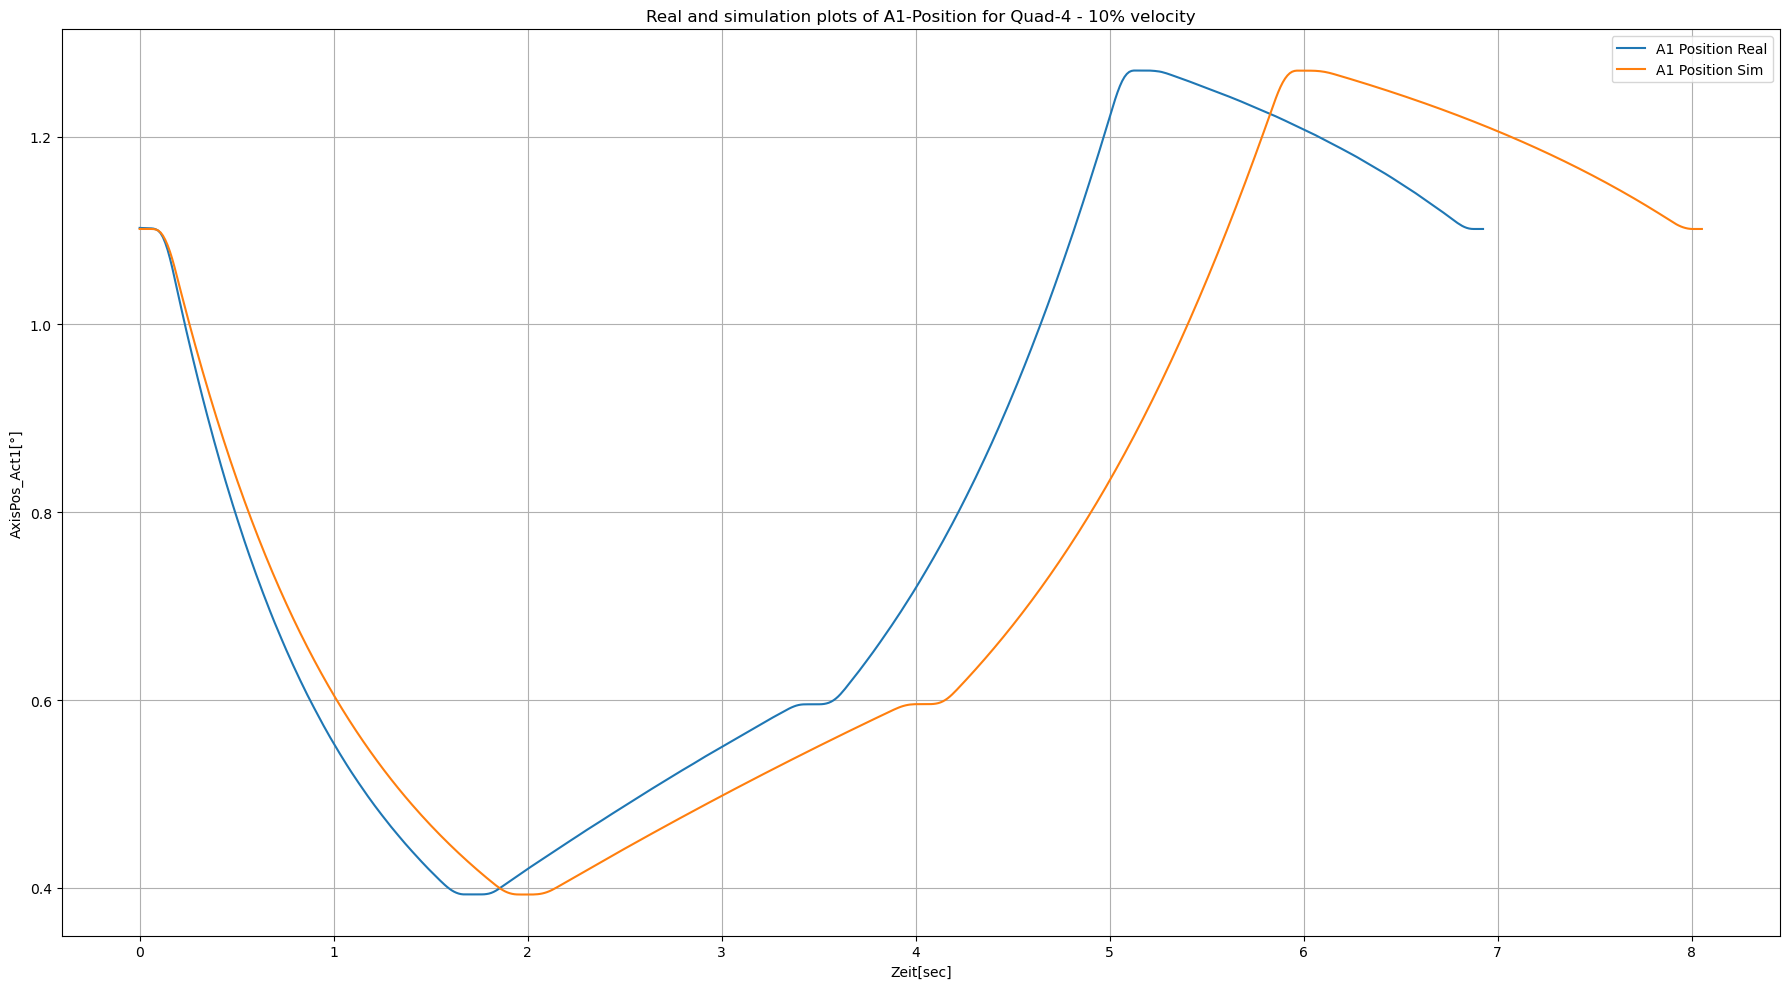

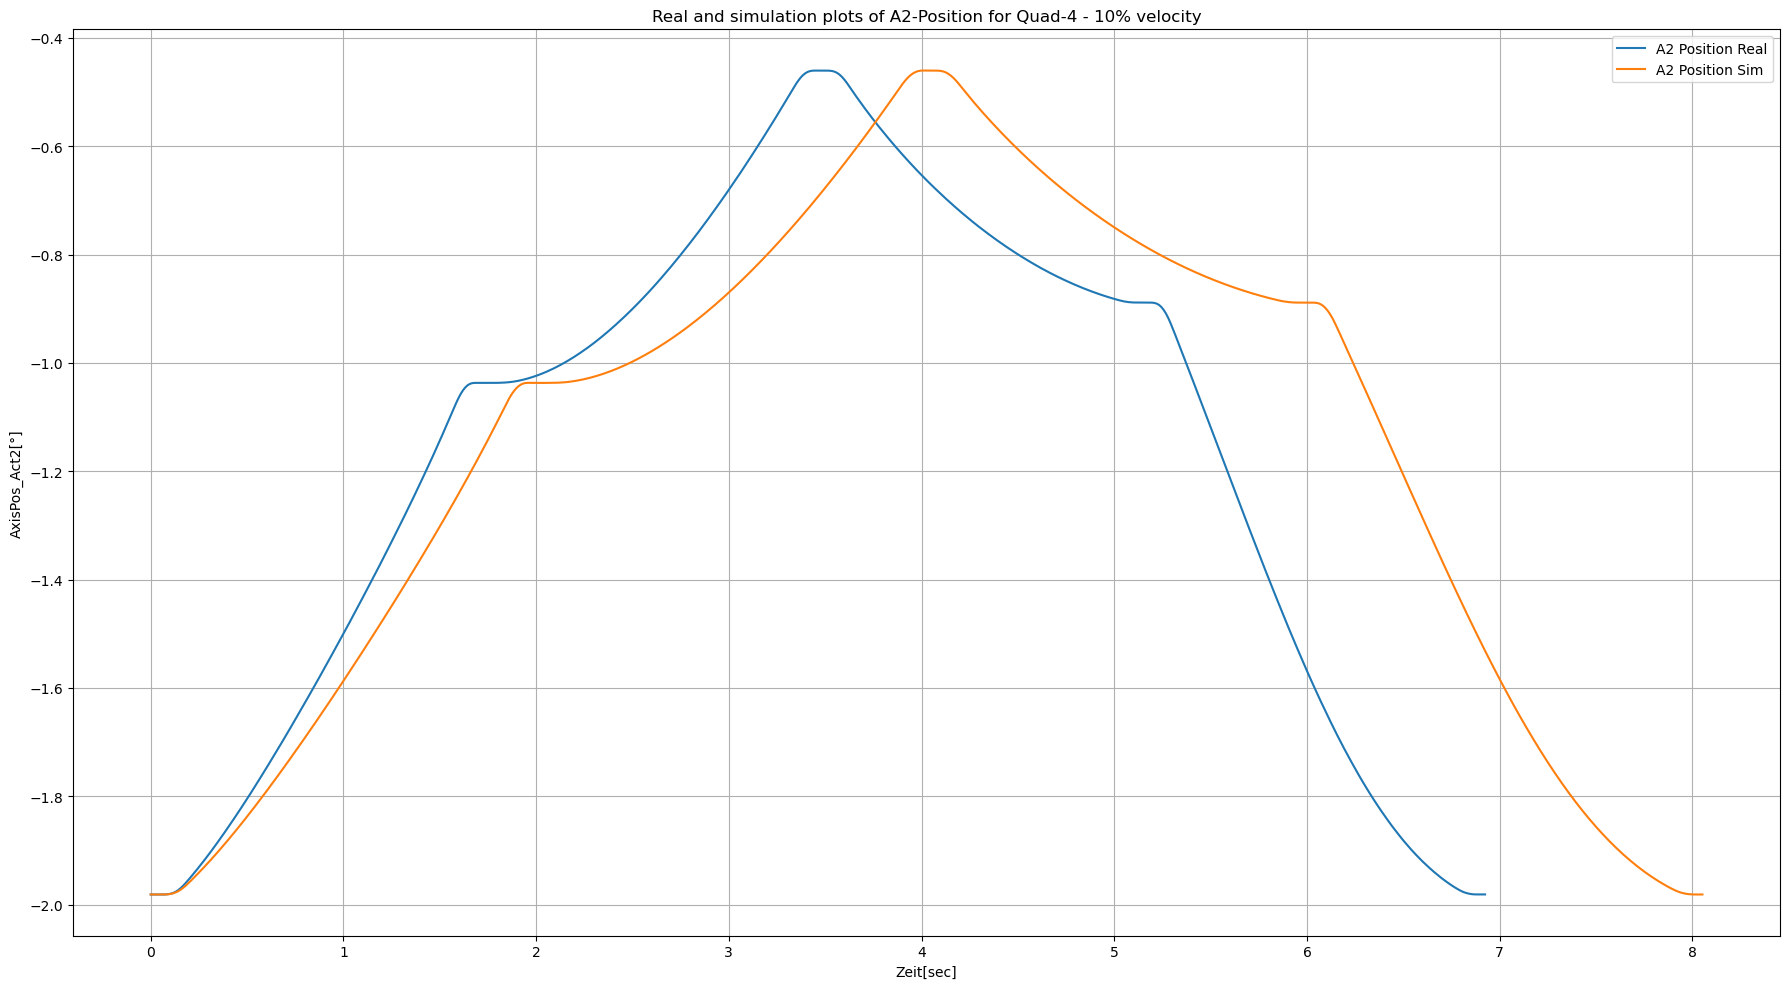

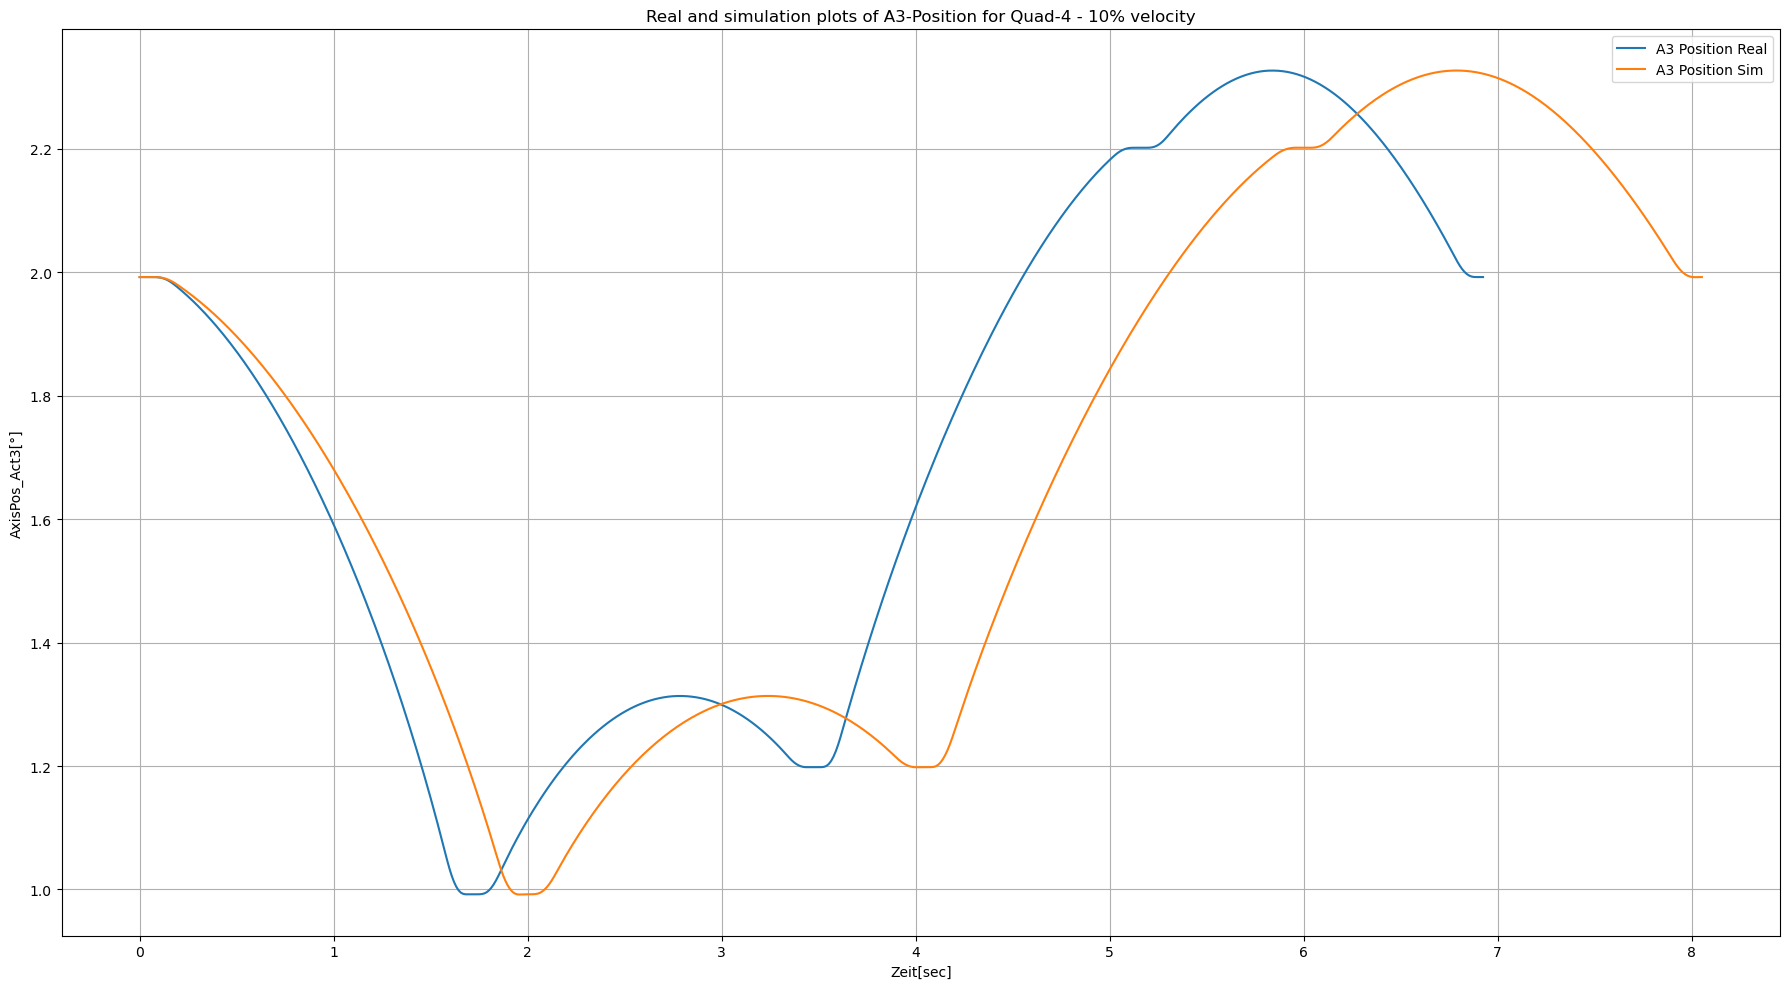

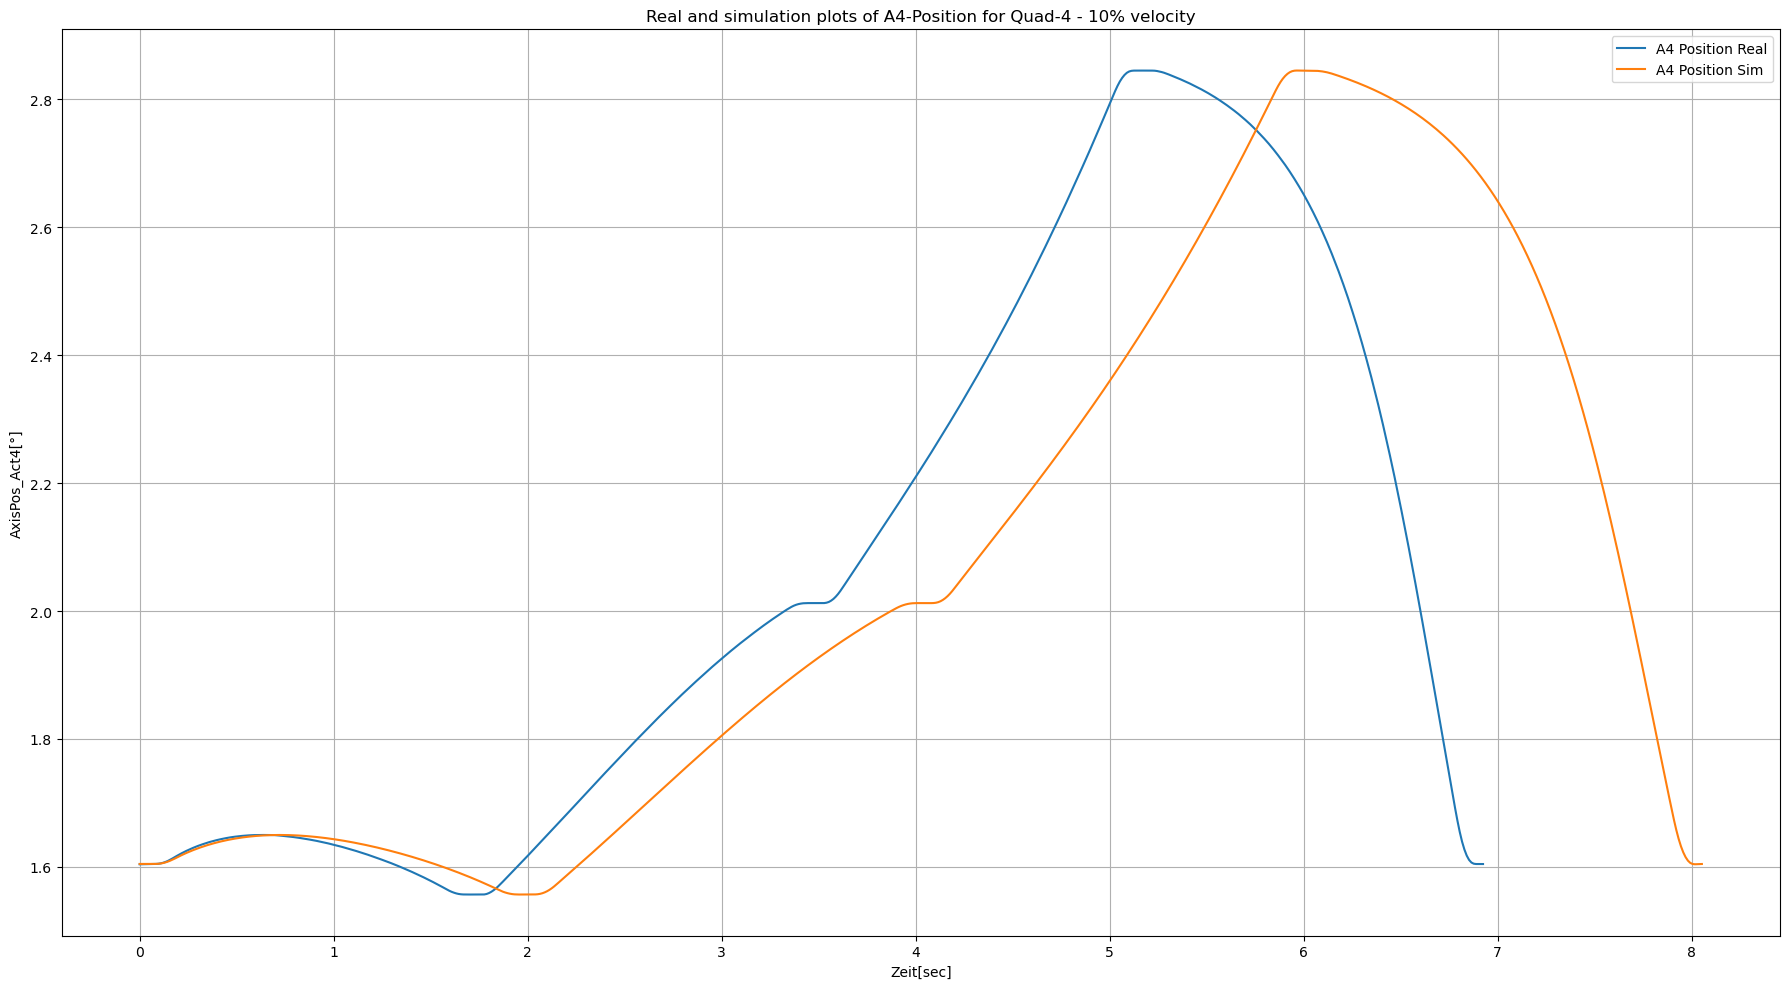

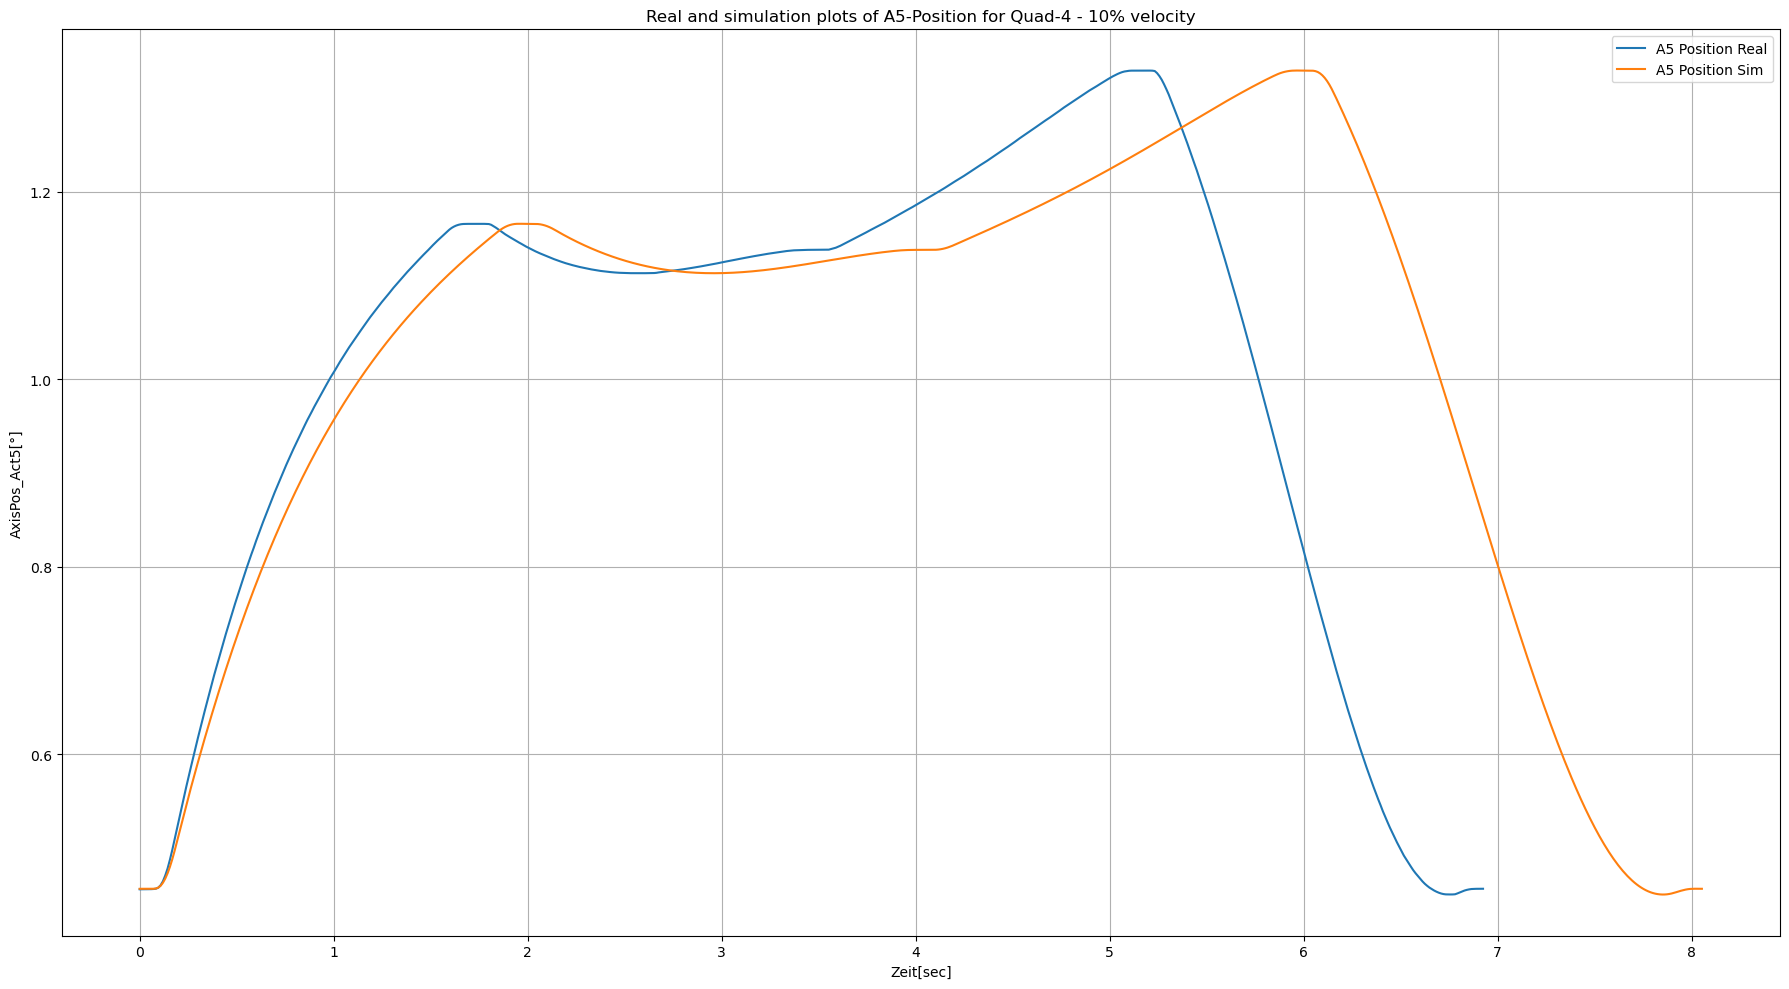

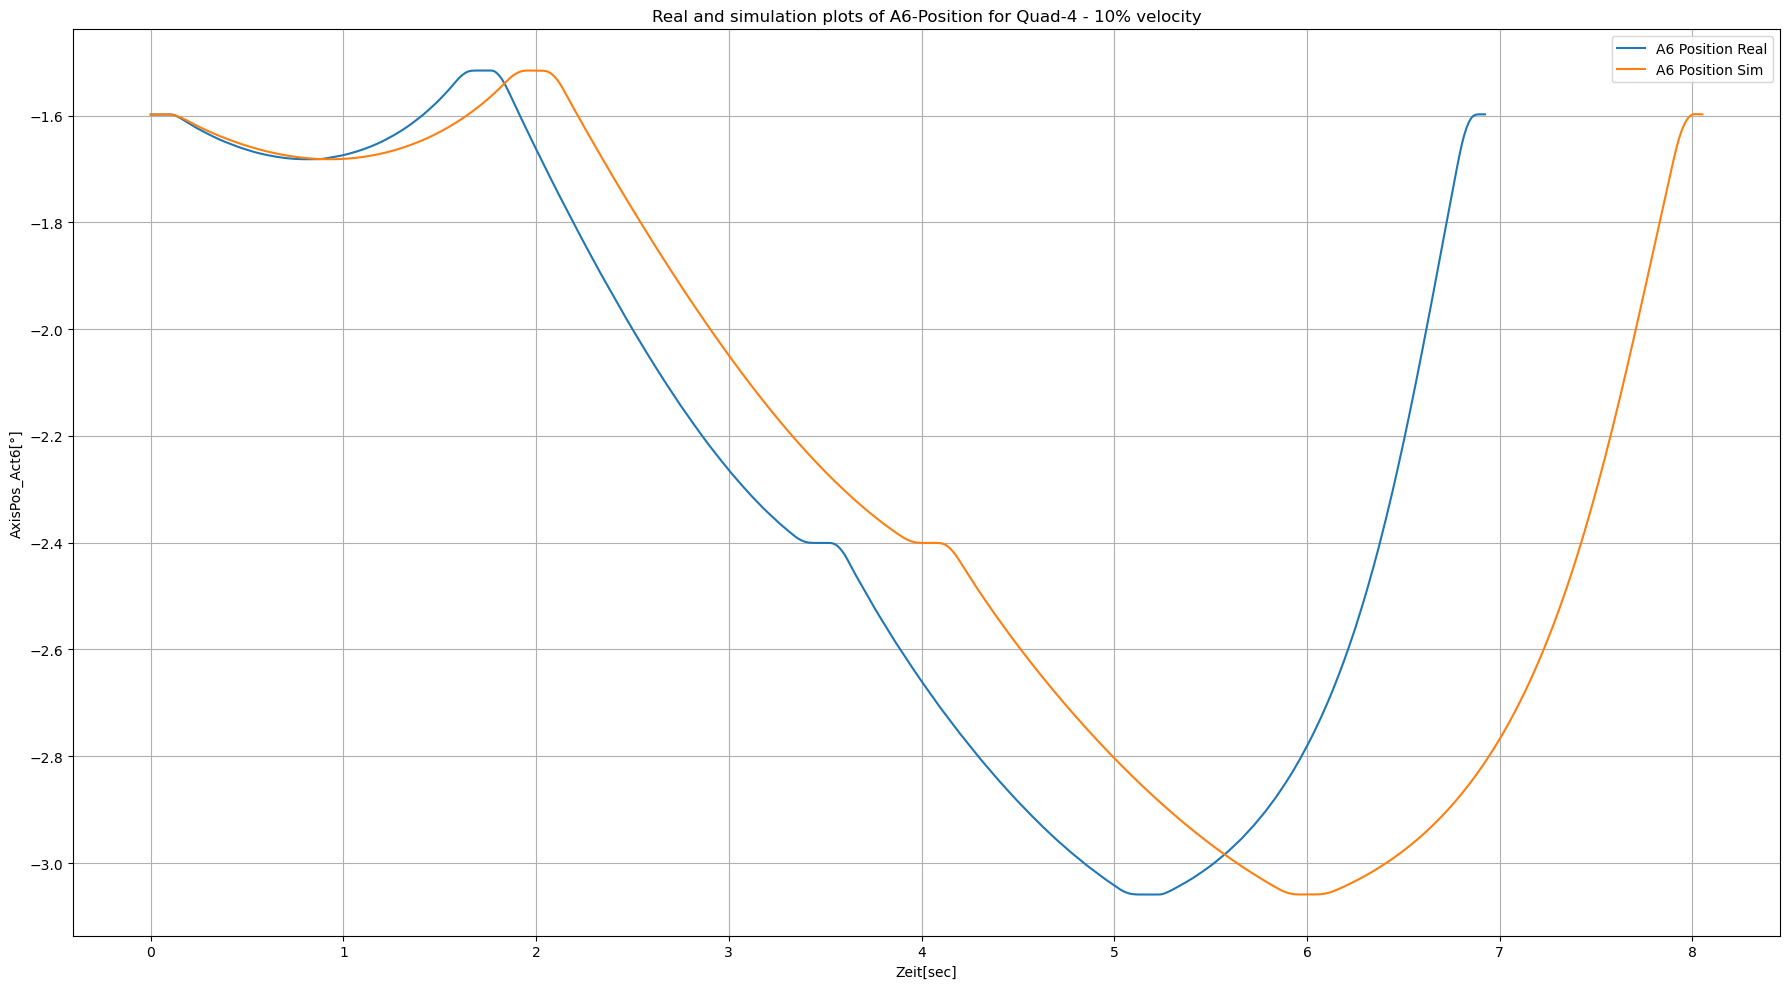

In [8]:
## Axis position comparison Real and Simulation
li_Linear_Real = []
li_Linear_Sim = []

if(len(fileNames_Linear_Real) == len(fileNames_Linear_Sim)):
    for i in range(len(fileNames_Linear_Real)):
        vel=40 - (i*10)
        df_Linear_Real = pd.read_csv(fileNames_Linear_Real[i], delimiter=';',encoding='cp1252')
        df_Linear_Sim = pd.read_csv(fileNames_Linear_Sim[i], delimiter=';', encoding='cp1252')
        li_Linear_Real.append(df_Linear_Real)
        li_Linear_Sim.append(df_Linear_Sim)

        print("Quadrilaterl - ", i+1)

        #Plotting the position of all the 6 axis for every circular movement
        for j in range(6):
            label_real = 'A' + str(j+1) + ' Position Real'
            label_sim = 'A' + str(j+1) + ' Position Sim'

            pos_real = li_Linear_Real[i].columns[j+7]
            pos_sim = li_Linear_Sim[i].columns[j+7]

            plt.figure(num=1, figsize=(18,10), dpi=100, tight_layout=True)
            plt.plot(li_Linear_Real[i]['Zeit[sec]'], li_Linear_Real[i][pos_real], label = label_real)
            plt.plot(li_Linear_Sim[i]['Zeit[sec]'], li_Linear_Sim[i][pos_sim], label = label_sim)
            plt.legend()
            plt.grid()
            plt.xlabel(li_Linear_Sim[i].columns[0])
            plt.ylabel(li_Linear_Sim[i].columns[j+7])
            plt.title('Real and simulation plots of A' + str(j+1) + '-Position for Quad-' + str(i+1) +' - ' + str(vel) + '% velocity')
            plt.show()
            plt.close()

Plot comparison of Cartesain Velocity for Real robot and simulation

Quadrilateral -  1


C:\Users\chatt\AppData\Local\Temp/ipykernel_31112/4126256172.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  li_Linear_Real[i]['Zeit[sec]'] = time_Shift


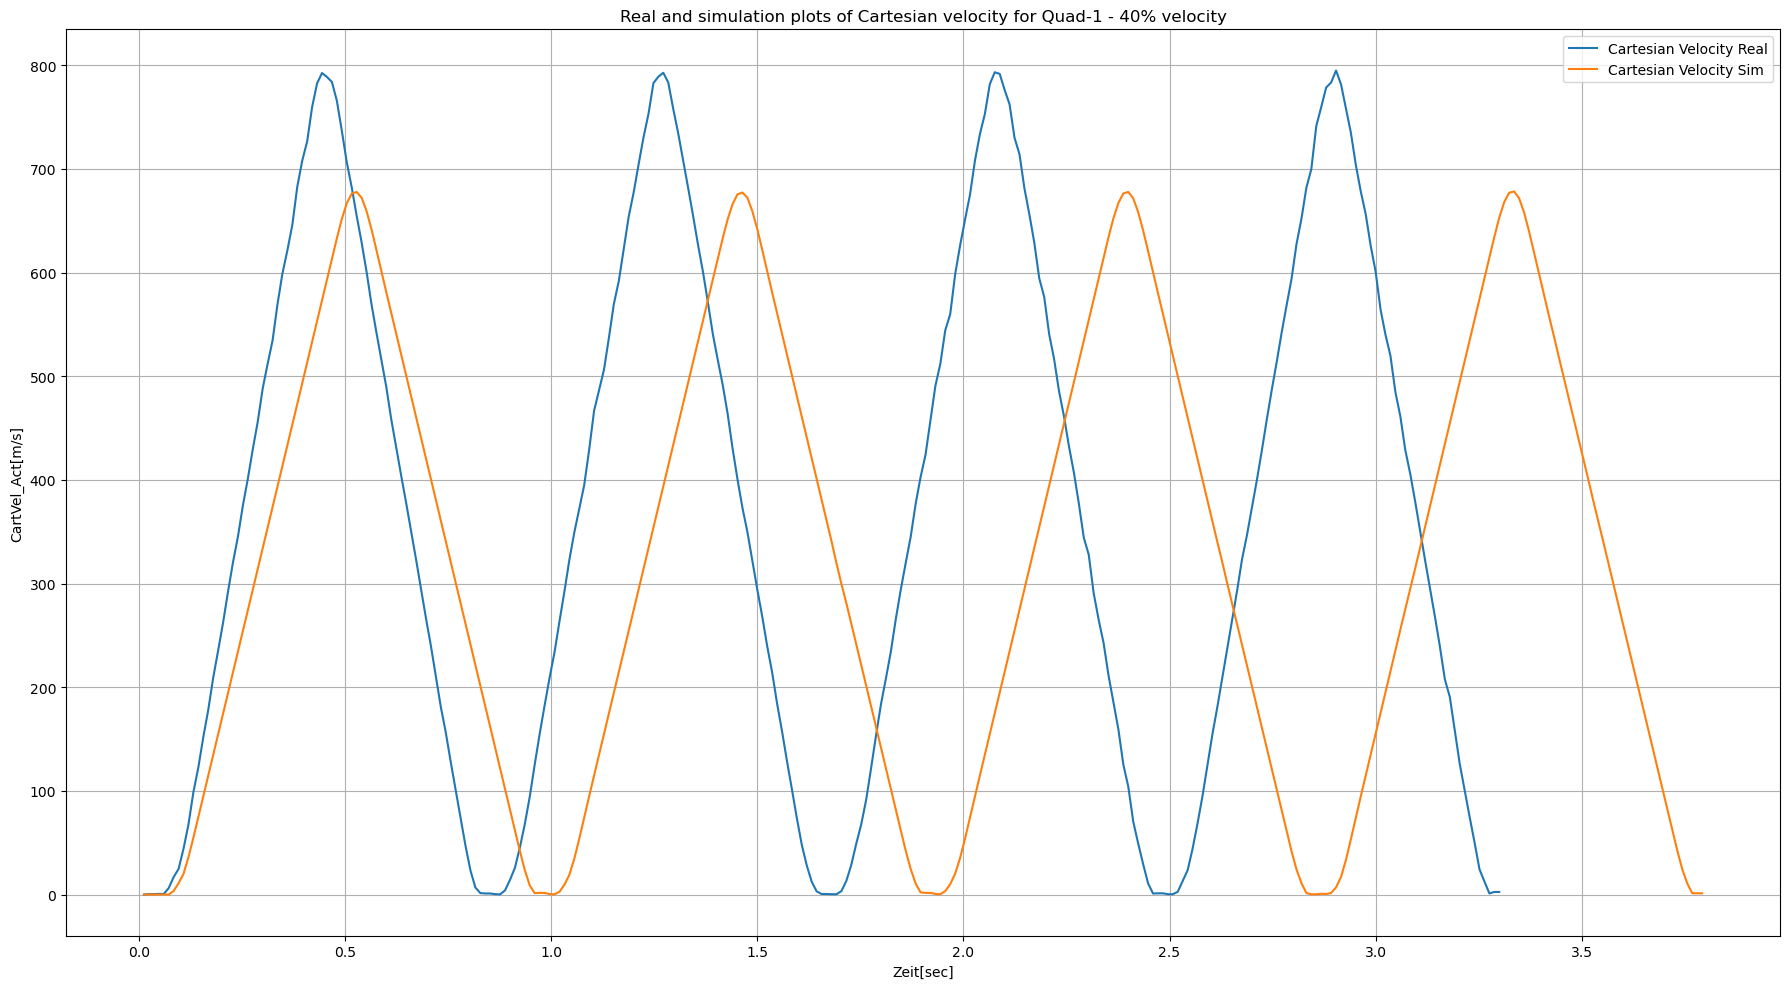

Quadrilateral -  2


C:\Users\chatt\AppData\Local\Temp/ipykernel_31112/4126256172.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  li_Linear_Real[i]['Zeit[sec]'] = time_Shift


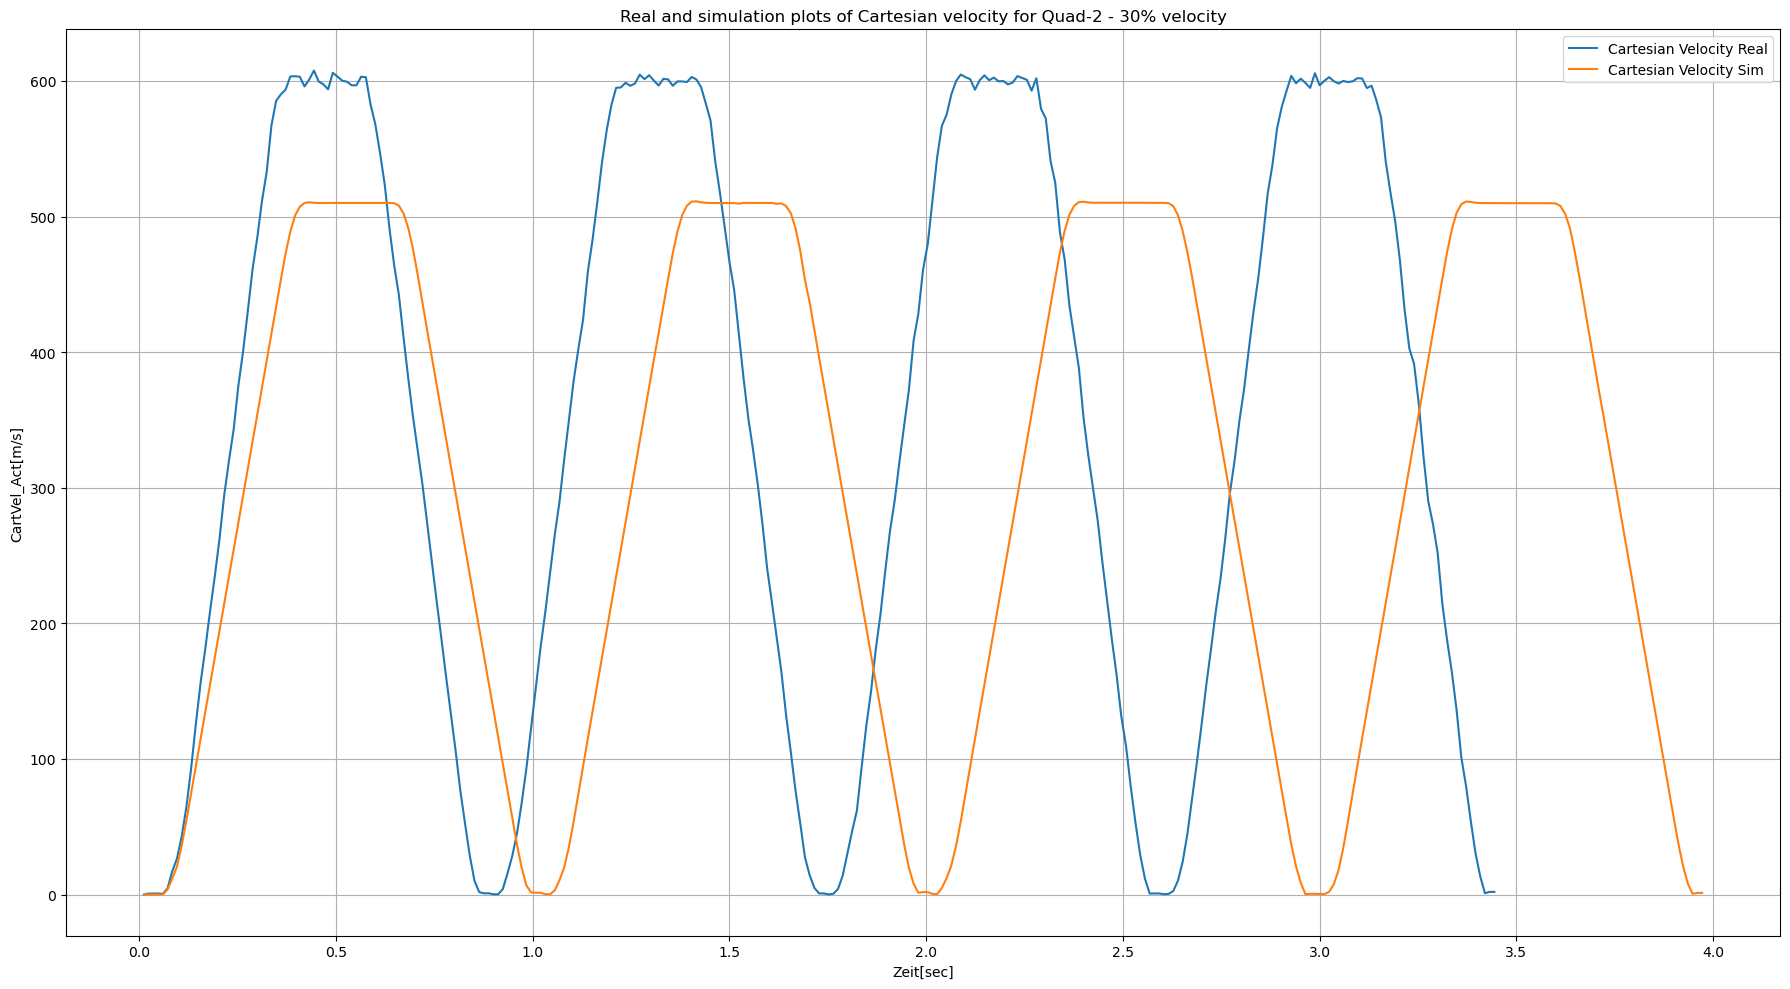

Quadrilateral -  3


C:\Users\chatt\AppData\Local\Temp/ipykernel_31112/4126256172.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  li_Linear_Real[i]['Zeit[sec]'] = time_Shift


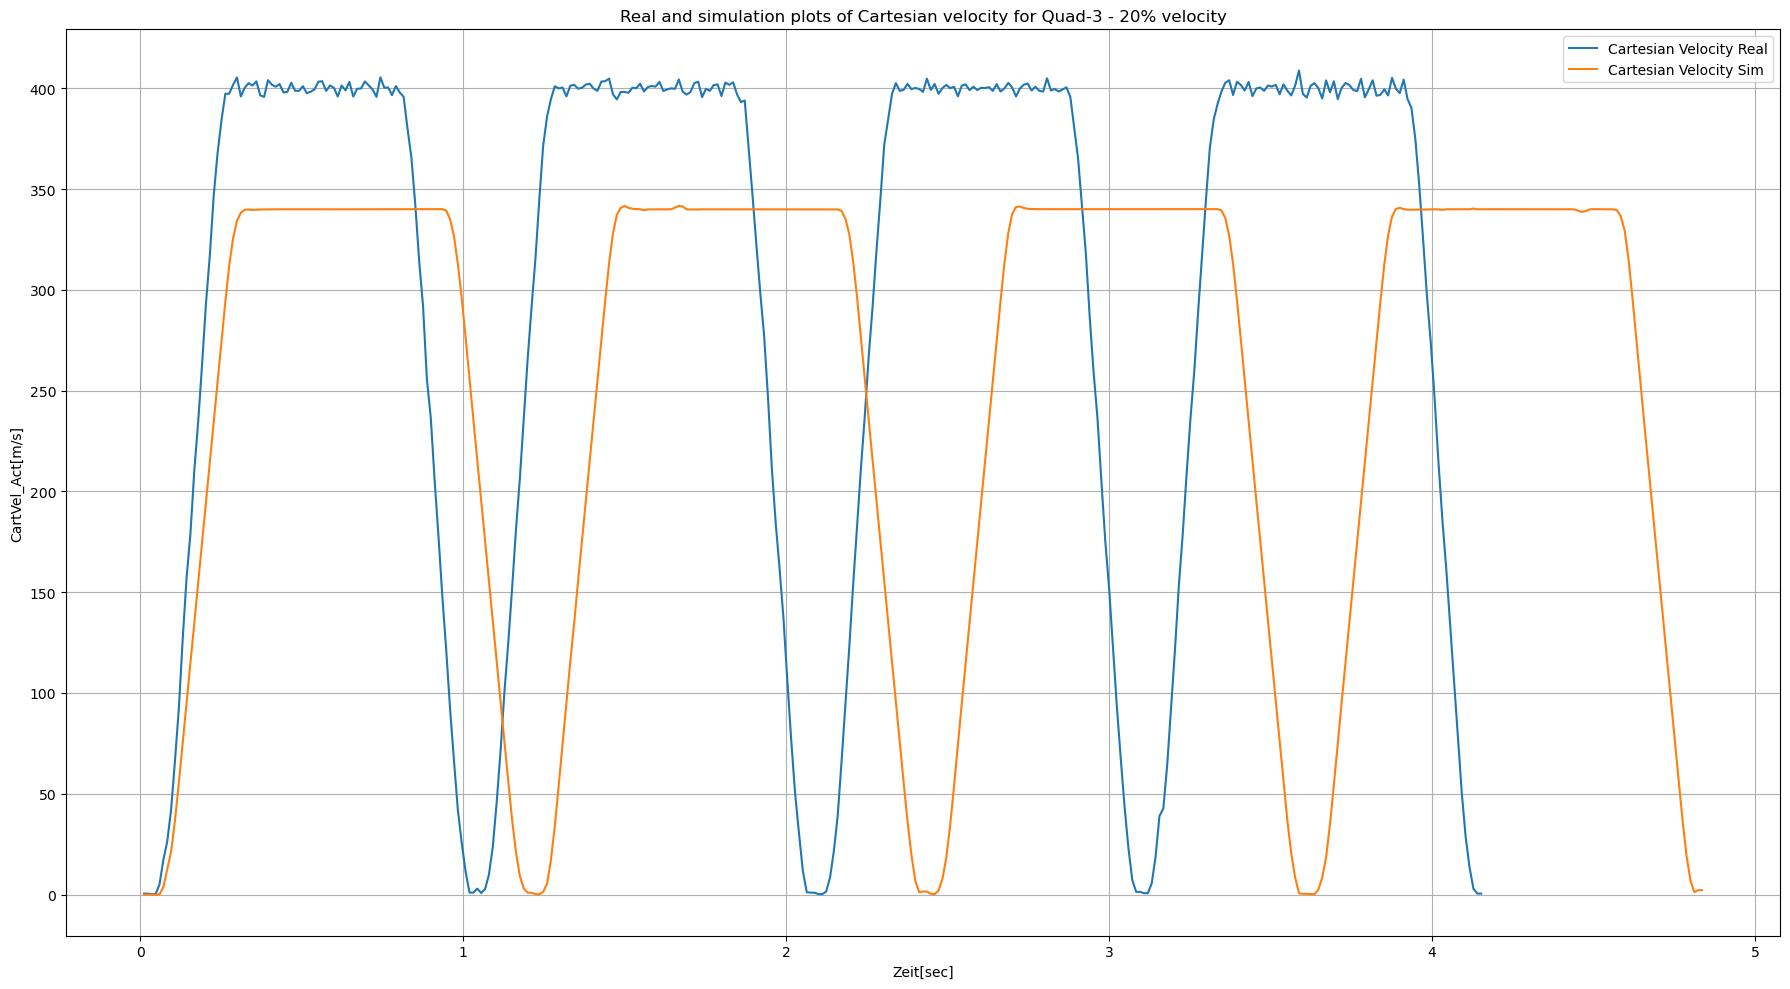

Quadrilateral -  4


C:\Users\chatt\AppData\Local\Temp/ipykernel_31112/4126256172.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  li_Linear_Real[i]['Zeit[sec]'] = time_Shift


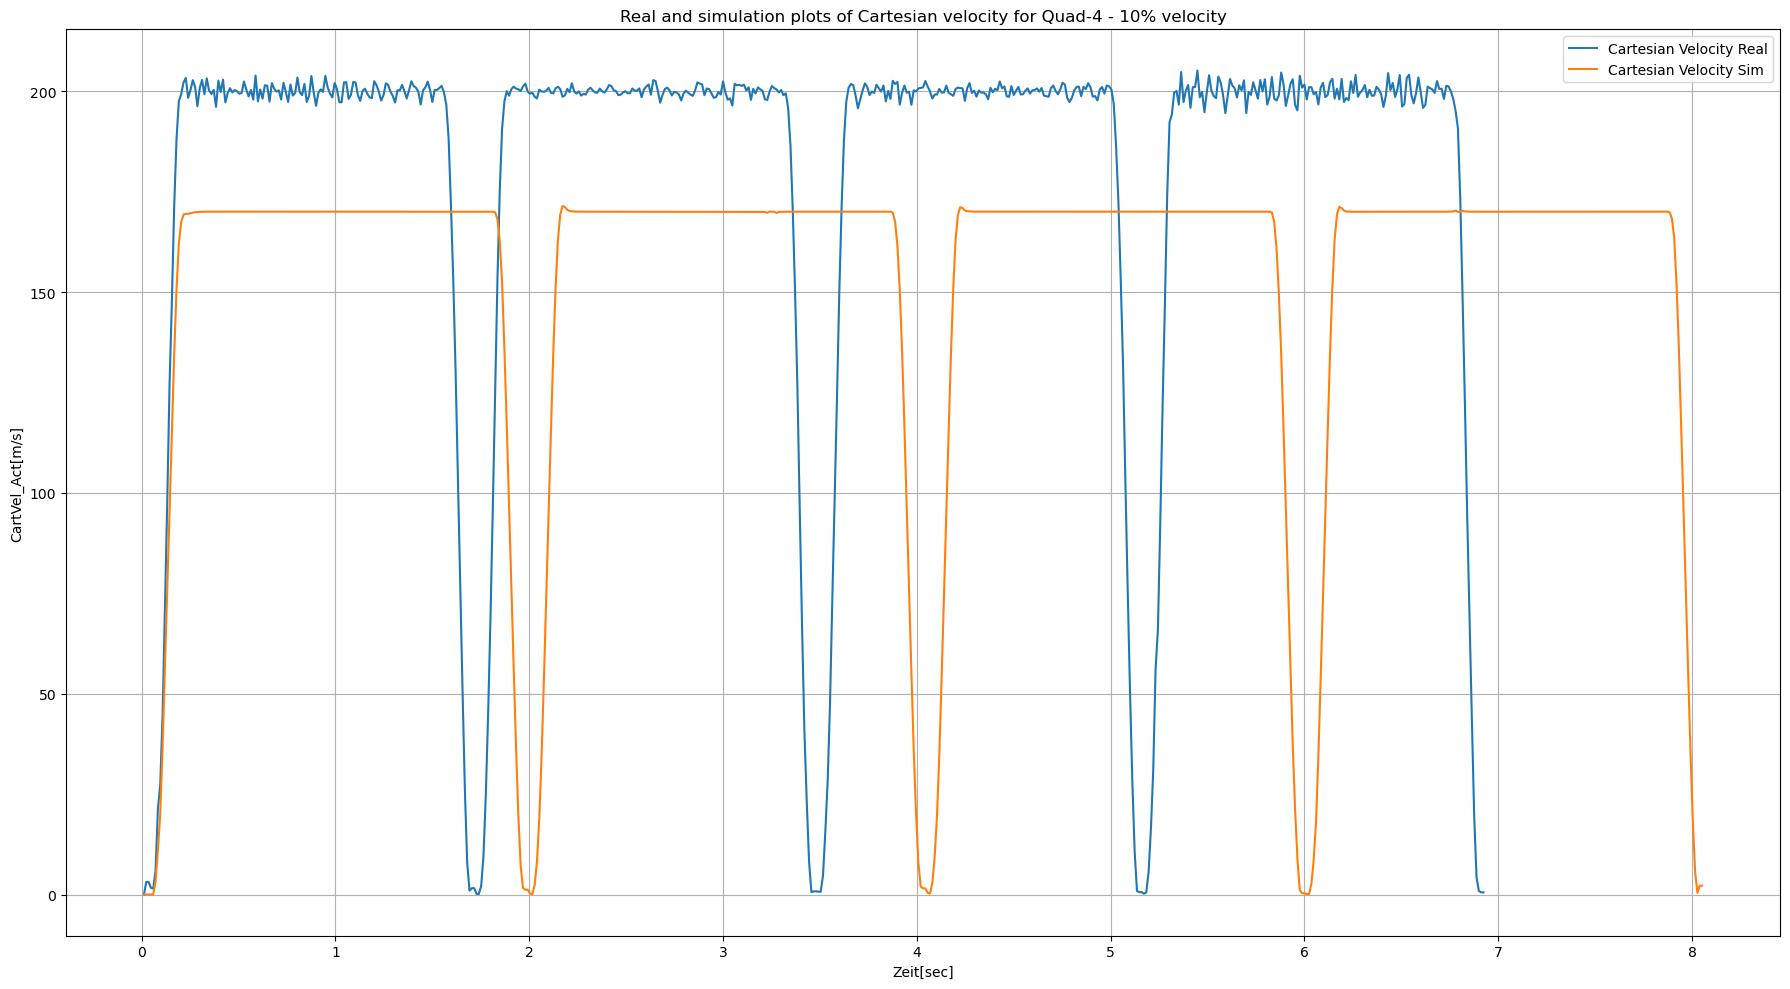

In [19]:
## Cartesian Velocity comparison Real and Simulation
li_Linear_Real = []
li_Linear_Sim = []
if(len(fileNames_Linear_Real) == len(fileNames_Linear_Sim)):
    for i in range(len(fileNames_Linear_Real)):
        df_Linear_Real = pd.read_csv(fileNames_Linear_Real[i], delimiter=';', encoding='cp1252')
        df_Linear_Sim = pd.read_csv(fileNames_Linear_Sim[i], delimiter=';', encoding='cp1252')
        #storing all the data, except first row to eliminate the unwanted spike seen at the start of the trace, in list
        li_Linear_Real.append(df_Linear_Real.iloc[1:,:])
        li_Linear_Sim.append(df_Linear_Sim.iloc[1:,:])

        vel = 40 - (i*10)
        print('Quadrilateral - ', i+1)

        # # Set time delay
        # if (i==0):     # Quad 1 
        #     delay = 0.41
        # elif (i==1):       # Quad 2
        #     delay = 0.45
        # elif (i==2):       # Quad 3
        #     delay = 0.34
        # elif (i==3):       # Quad 4
        #     delay = 0.3
        # else:               # default
        #     delay = 0

        delay = 0

        #Shift Real robot trace to eliminate PTP influence
        time_Shift = li_Linear_Real[i]['Zeit[sec]'] - delay    
        li_Linear_Real[i]['Zeit[sec]'] = time_Shift


        pos_real = li_Linear_Real[i].columns[21]
        pos_sim = li_Linear_Sim[i].columns[21]

        plt.figure(num=1, figsize=(18,10), dpi=100, tight_layout=True)
        plt.plot(li_Linear_Real[i]['Zeit[sec]'], li_Linear_Real[i][pos_real], label = 'Cartesian Velocity Real')
        plt.plot(li_Linear_Sim[i]['Zeit[sec]'], li_Linear_Sim[i][pos_sim], label = 'Cartesian Velocity Sim')

        plt.legend()
        plt.grid()
        # plt.xlim(left=0)
        plt.xlabel(li_Linear_Sim[i].columns[0])
        plt.ylabel(li_Linear_Sim[i].columns[21])
        plt.title('Real and simulation plots of Cartesian velocity for Quad-' + str(i+1) +' - ' + str(vel) + '% velocity')
        if not os.path.exists('Images/Linear'):
            os.makedirs('Images/Linear')
        plt.savefig('Images/Linear/Cartesian Velocity Quad ' + str(i+1) + '.jpg')
        plt.show()
        plt.close()

The following two sections plot the traces of cartesian position and cartesian velocity of the end effector for the linear movements in Vertical, Horizontal and Diagonal orientation. Linear_updated includes the traces for Horizontal and Diagonal movements, while the Linear_vertical includes the traces for vertical movement. These experiments were performed to form a basis for the complete linear experimnet performed with an imaginary cuboid in the previoud section. The results of the previous experiment are compared with those of the following experiments.

Fetching all the trace files of Linear_Updated movement (Z) and storing them in Two variables. One of them include trace files of Simulation for Linear_updated movement, while the other variable include trace files of Real robot.

In [10]:
# Fetch all regular motion files
target_path_1 = '../Traces_Real/Linear_Updated'
target_path_2 = '../Traces_Simulation/Linear_Updated'

root_path = './'
fileNames_1 = os.listdir(target_path_1)
fileNames_2 = os.listdir(target_path_2)

fileNames_Linear_Real = [file for file in fileNames_1 if 'KRCIpo.csv' in file]
fileNames_Linear_Sim = [file for file in fileNames_2 if 'KRCIpo.csv' in file]

for file in fileNames_Linear_Real:
    shutil.copy(path.join(target_path_1, file), root_path)

for file in fileNames_Linear_Sim:
    shutil.copy(path.join(target_path_2, file), root_path)


Plot comparison of Cartesian coordinates for Real robot and simulation

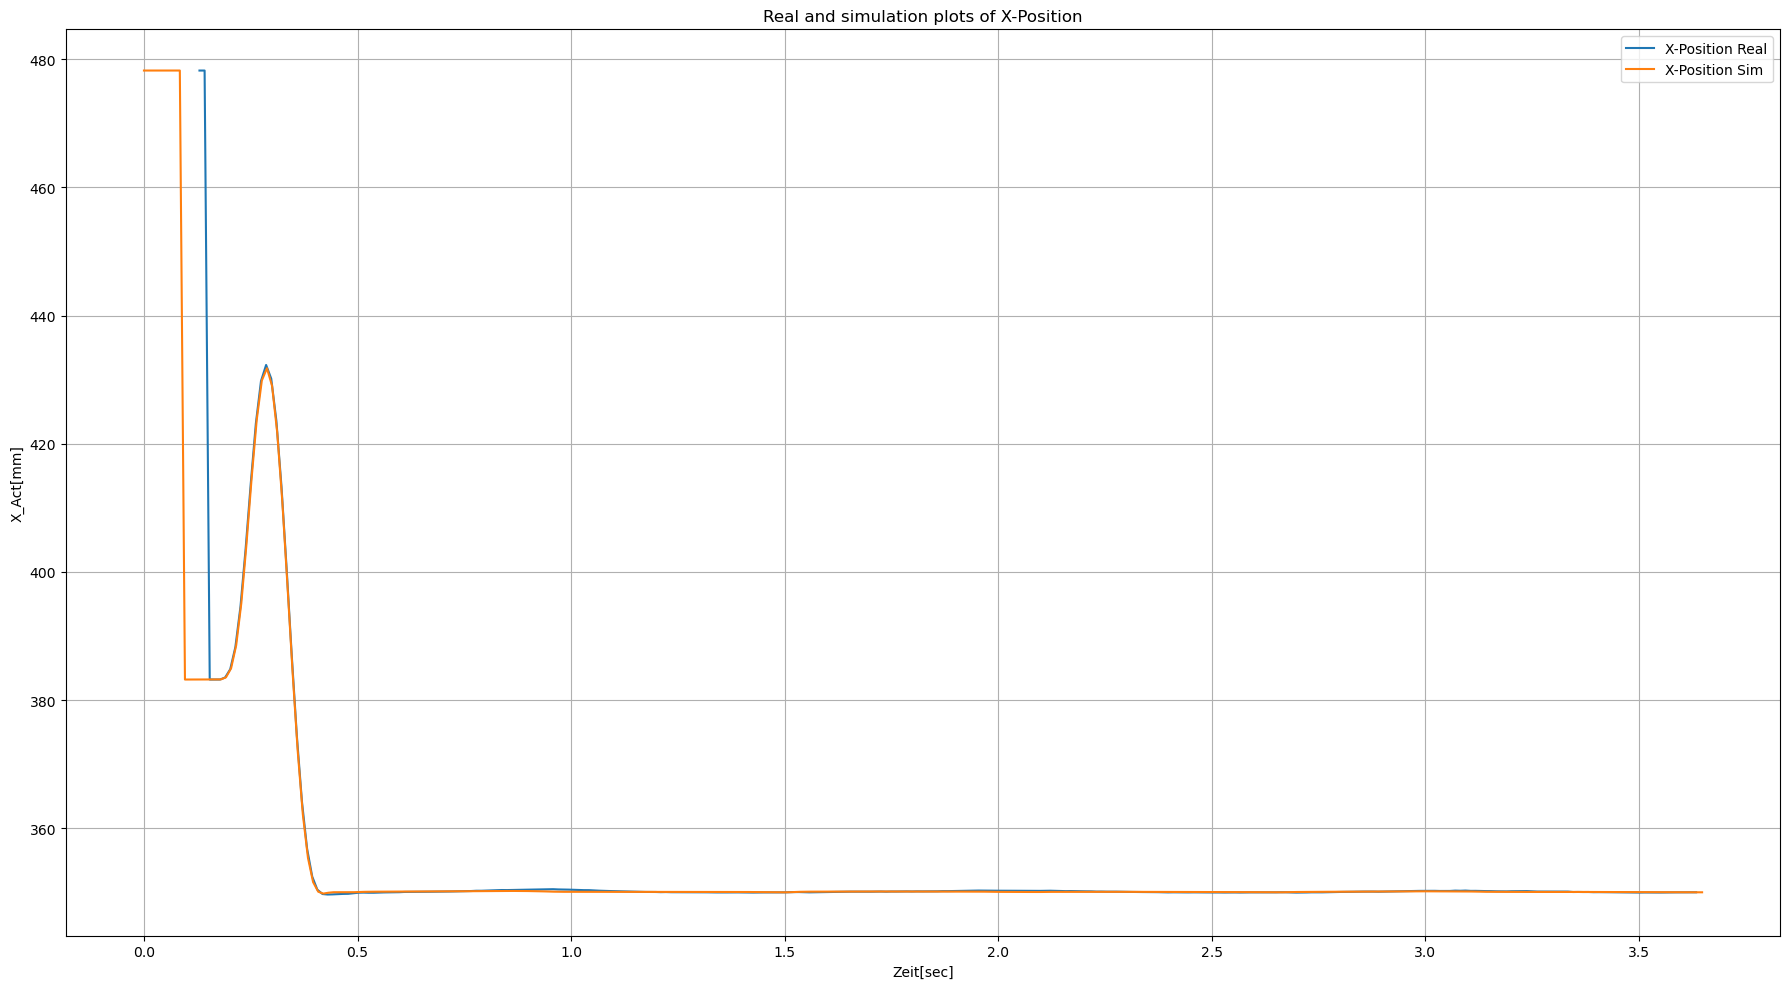

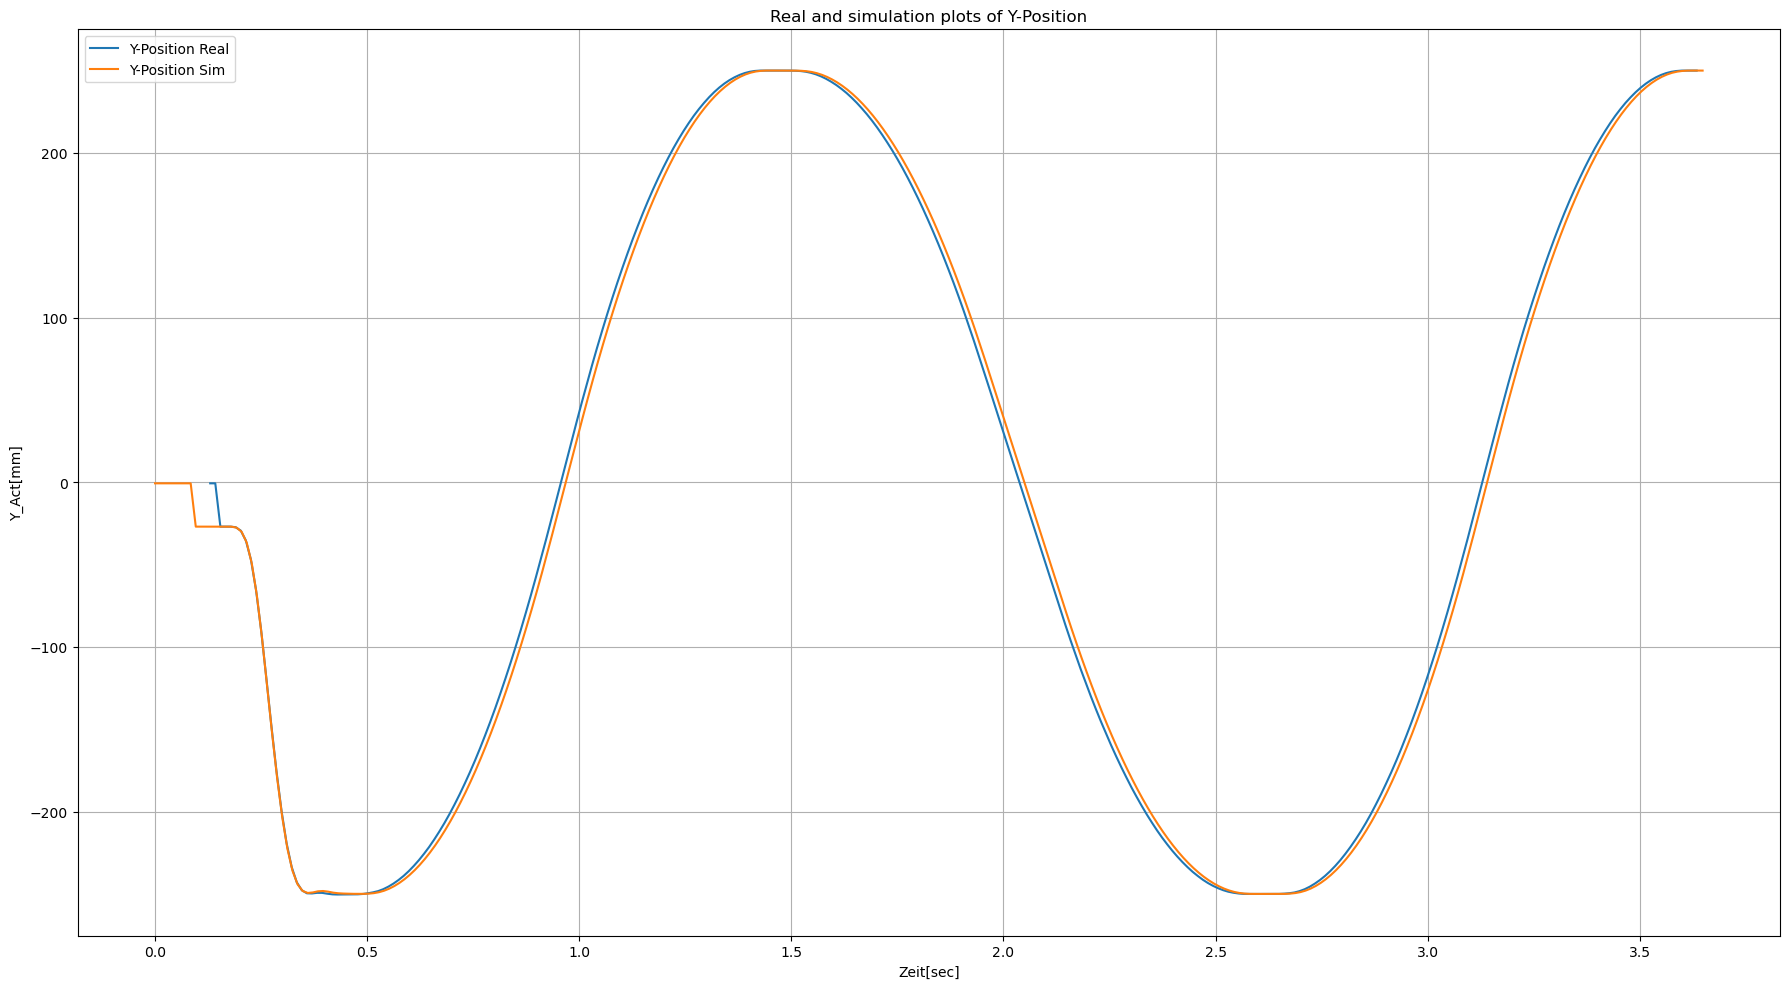

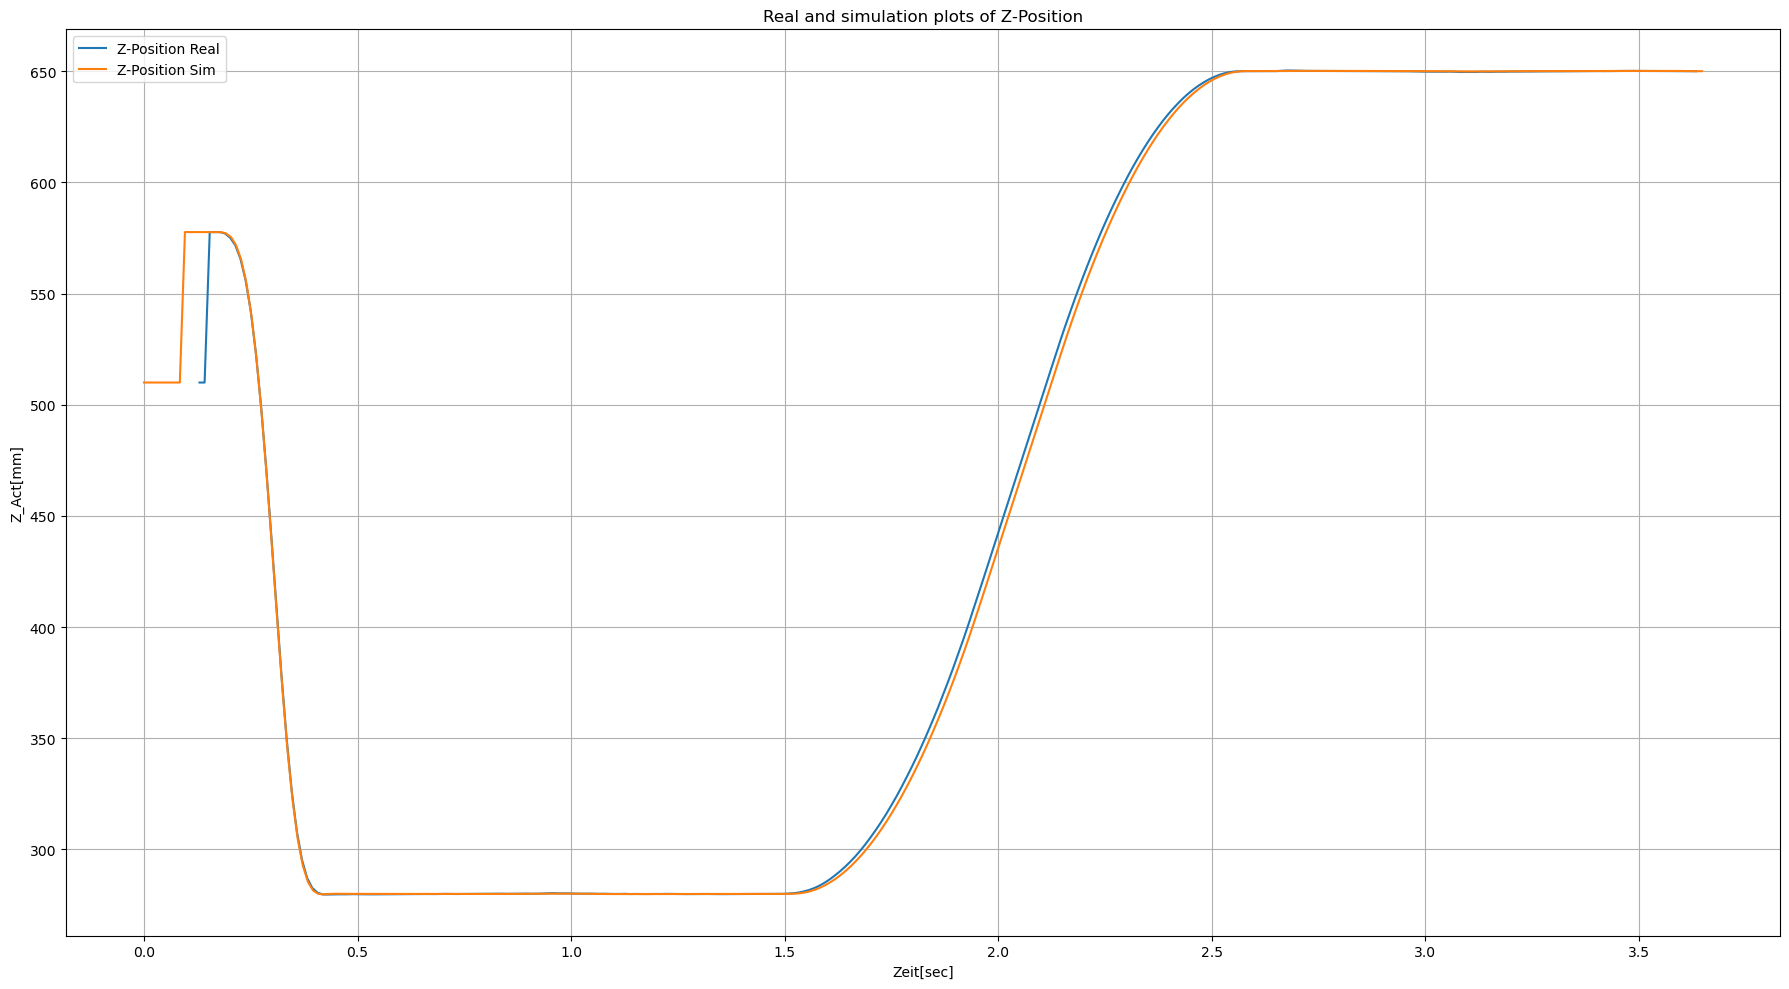

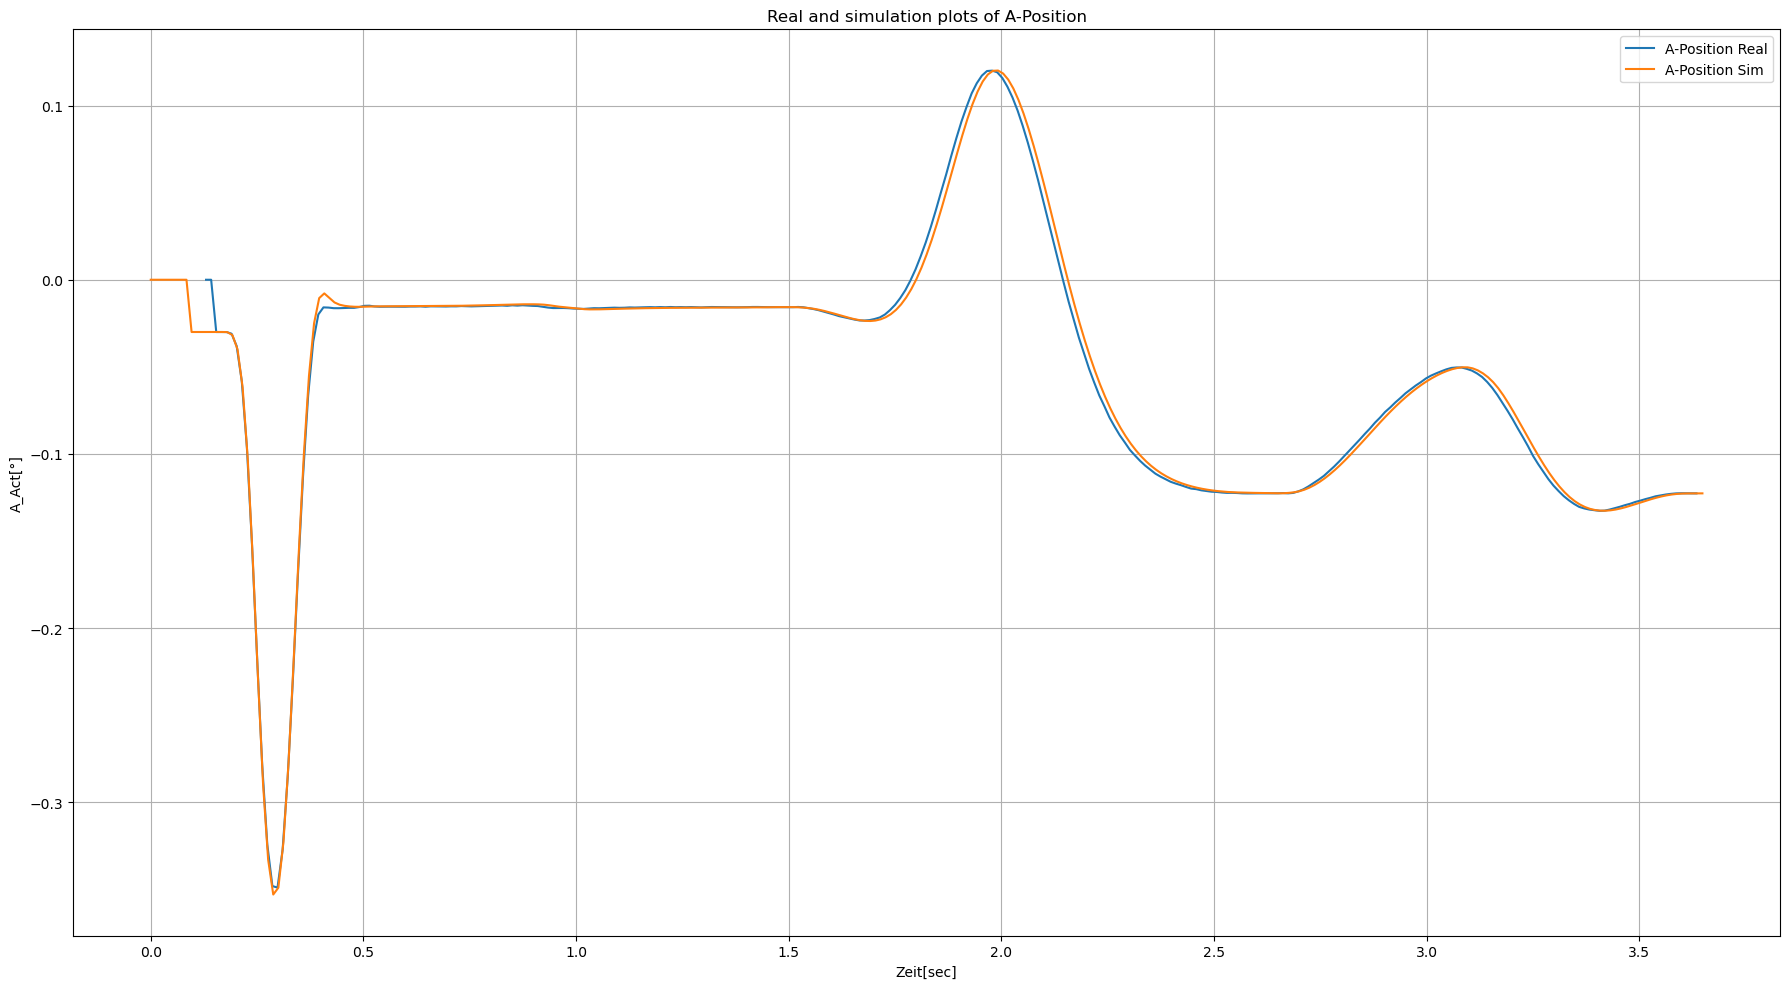

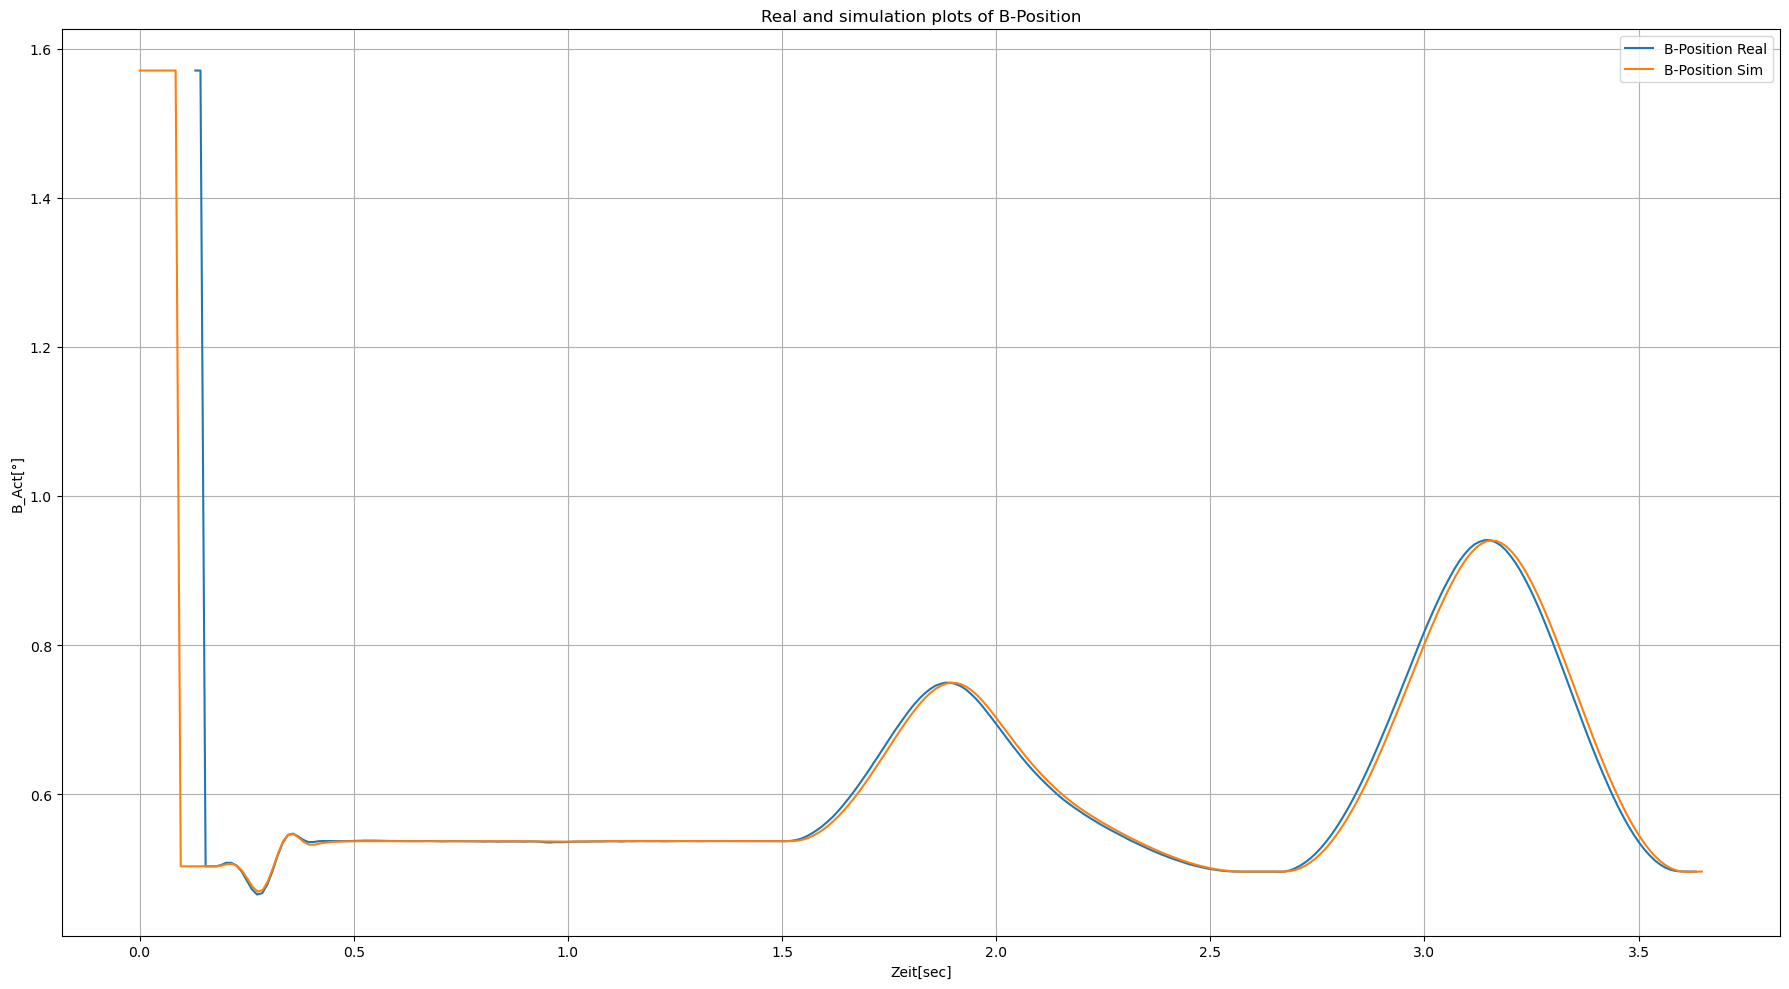

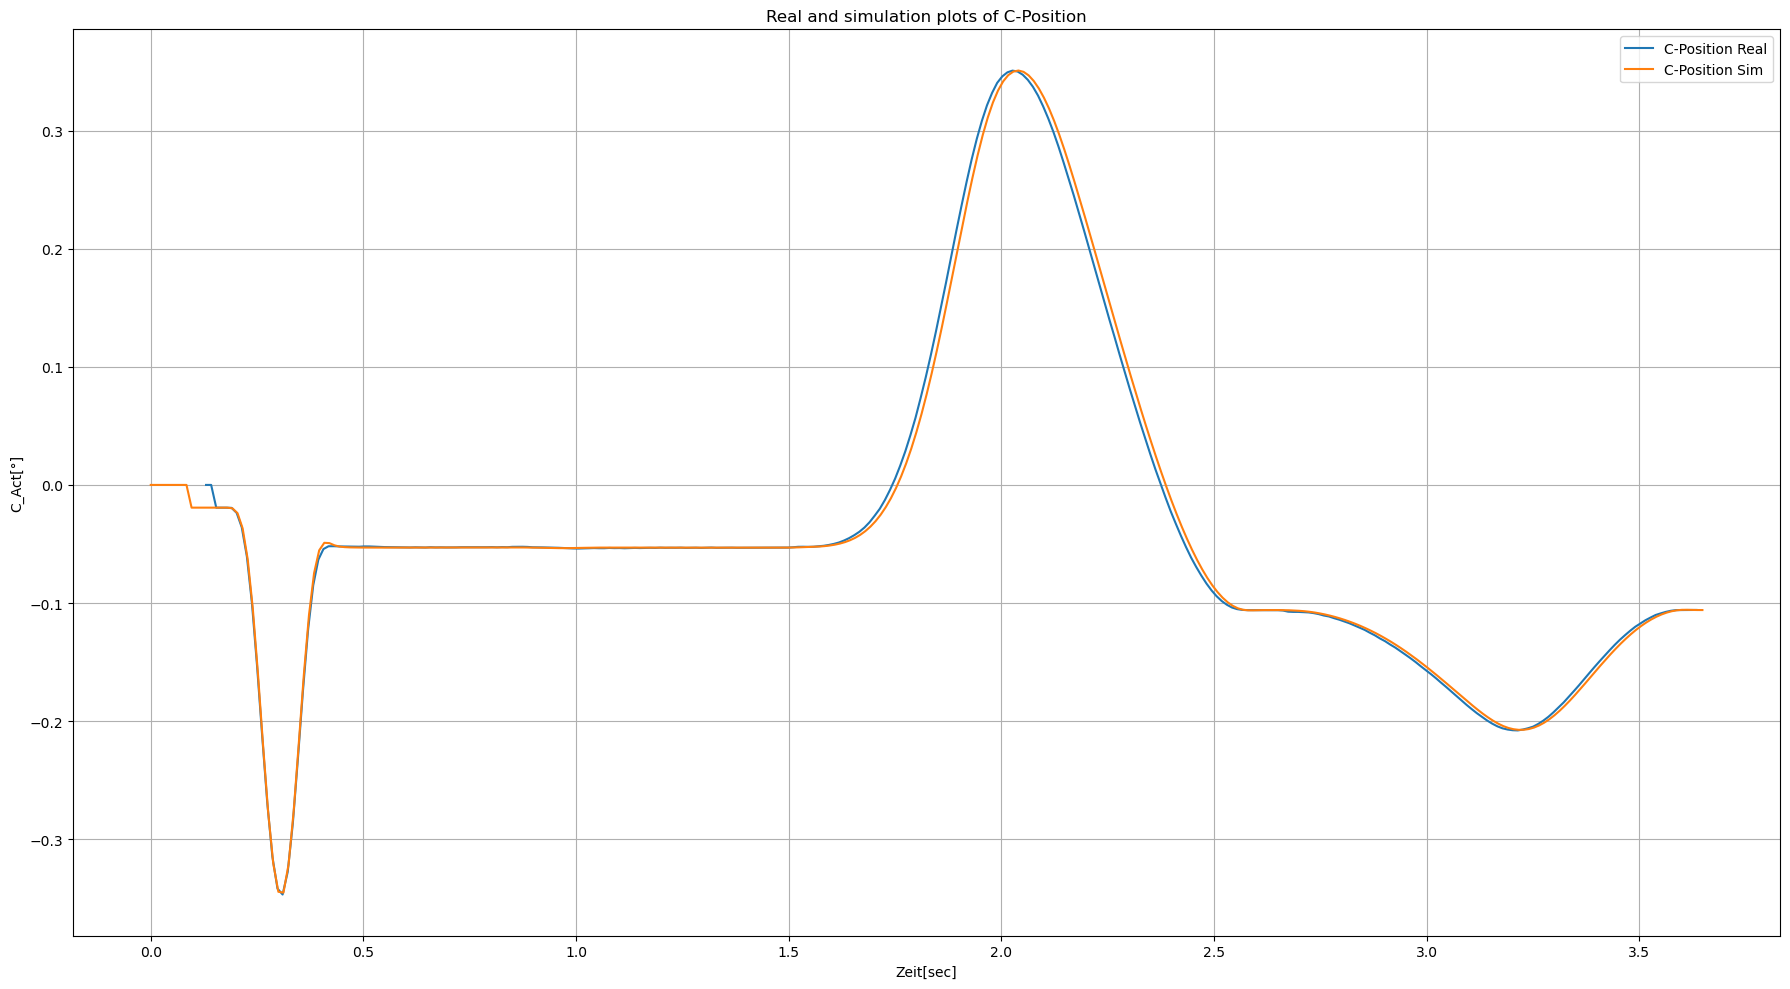

In [11]:
## Linear Updated cartesian position
li_Linear_Real = []
li_Linear_Sim = []

if (len(fileNames_Linear_Real)==len(fileNames_Linear_Sim)):
    for i in range (len(fileNames_Linear_Real)):
        # vel = 40 - (i*10)
        df_Linear_Real = pd.read_csv(fileNames_Linear_Real[i], delimiter=';', encoding='cp1252')
        df_Linear_Sim = pd.read_csv(fileNames_Linear_Sim[i], delimiter=';', encoding='cp1252')  

        li_Linear_Real.append(df_Linear_Real)
        li_Linear_Sim.append(df_Linear_Sim)

        # print("Quadrilaterl - ", i+1)

        for j in range(6):
            if j < 3:
                a = j + 88
            else:
                a = j + 62

            pos_real = li_Linear_Real[i].columns[j+1]
            pos_sim = li_Linear_Sim[i].columns[j+1]

            label_real = chr(a) + '-Position Real'
            label_sim = chr(a) + '-Position Sim'

            time_Shift = li_Linear_Real[i]['Zeit[sec]'] + 0.13
            li_Linear_Real[i]['Zeit[sec]'] = time_Shift

            plt.figure(num=1, figsize=(18,10), dpi=100, tight_layout=True)
            plt.plot(li_Linear_Real[i]['Zeit[sec]'], li_Linear_Real[i][pos_real], label = label_real)
            plt.plot(li_Linear_Sim[i]['Zeit[sec]'], li_Linear_Sim[i][pos_sim], label = label_sim)
            plt.legend()
            plt.grid()
            plt.xlabel(li_Linear_Sim[i].columns[0])
            plt.ylabel(li_Linear_Sim[i].columns[j+1])
            plt.title('Real and simulation plots of ' + chr(a) + '-Position')
            # if not os.path.exists('Images/Linear'):
            #     os.makedirs('Images/Linear')
            # plt.savefig('Images/Linear/' + chr(a) + '-Pos Rect ' + str(i+1) + '.jpg')
            plt.show()
            plt.close()

            time_Shift = li_Linear_Real[i]['Zeit[sec]'] - 0.13
            li_Linear_Real[i]['Zeit[sec]'] = time_Shift


Plot comparison of Cartesain Velocity for Real robot and simulation

C:\Users\chatt\AppData\Local\Temp/ipykernel_31112/1345301624.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  li_Linear_Real[i]['Zeit[sec]'] = time_Shift


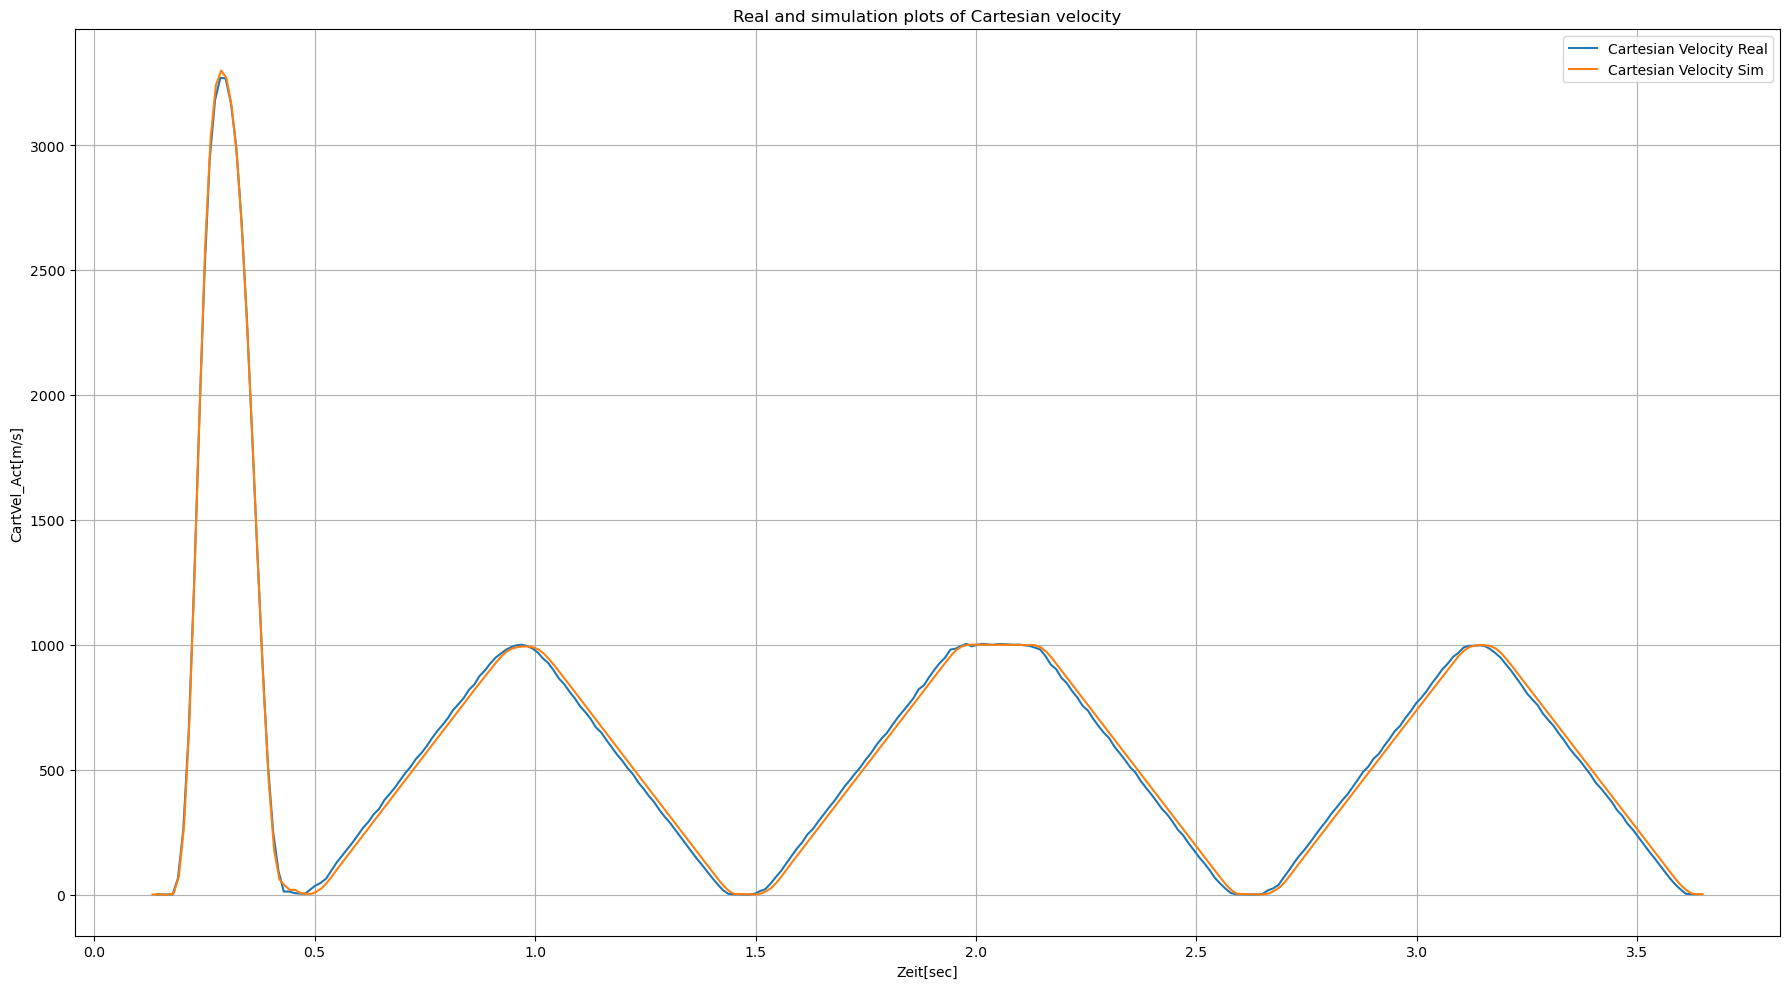

C:\Users\chatt\AppData\Local\Temp/ipykernel_31112/1345301624.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  li_Linear_Real[i]['Zeit[sec]'] = time_Shift


In [12]:
## Cartesian Velocity comparison Real and Simulation
li_Linear_Real = []
li_Linear_Sim = []
if(len(fileNames_Linear_Real) == len(fileNames_Linear_Sim)):
    for i in range(len(fileNames_Linear_Real)):
        df_Linear_Real = pd.read_csv(fileNames_Linear_Real[i], delimiter=';', encoding='cp1252')
        df_Linear_Sim = pd.read_csv(fileNames_Linear_Sim[i], delimiter=';', encoding='cp1252')
        li_Linear_Real.append(df_Linear_Real.iloc[1:,:])
        li_Linear_Sim.append(df_Linear_Sim.iloc[11:,:])

        # vel = 40 - (i*10)
        # print('Quadrilateral - ', i+1)

        pos_real = li_Linear_Real[i].columns[21]
        pos_sim = li_Linear_Sim[i].columns[21]

        time_Shift = li_Linear_Real[i]['Zeit[sec]'] + 0.13
        li_Linear_Real[i]['Zeit[sec]'] = time_Shift

        plt.figure(num=1, figsize=(18,10), dpi=100, tight_layout=True)
        plt.plot(li_Linear_Real[i]['Zeit[sec]'], li_Linear_Real[i][pos_real], label = 'Cartesian Velocity Real')
        plt.plot(li_Linear_Sim[i]['Zeit[sec]'], li_Linear_Sim[i][pos_sim], label = 'Cartesian Velocity Sim')

        plt.legend()
        plt.grid()
        plt.xlabel(li_Linear_Sim[i].columns[0])
        plt.ylabel(li_Linear_Sim[i].columns[21])
        plt.title('Real and simulation plots of Cartesian velocity')
        # if not os.path.exists('Images/Linear'):
        #     os.makedirs('Images/Linear')
        # plt.savefig('Images/Linear/Cartesian Velocity Quad ' + str(i+1) + '.jpg')
        plt.show()
        plt.close()

        time_Shift = li_Linear_Real[i]['Zeit[sec]'] - 0.13
        li_Linear_Real[i]['Zeit[sec]'] = time_Shift

Fetching all the trace files of Linear_vertical movement and storing them in Two variables. One of them include trace files of Simulation for Linear_vertical movement, while the other variable include trace files of Real robot.

In [13]:
# Fetch all regular motion files
target_path_1 = '../Traces_Real/Linear_Vertical'
target_path_2 = '../Traces_Simulation/Linear_Vertical'

root_path = './'
fileNames_1 = os.listdir(target_path_1)
fileNames_2 = os.listdir(target_path_2)

fileNames_Linear_Real = [file for file in fileNames_1 if 'KRCIpo.csv' in file]
fileNames_Linear_Sim = [file for file in fileNames_2 if 'KRCIpo.csv' in file]

for file in fileNames_Linear_Real:
    shutil.copy(path.join(target_path_1, file), root_path)

for file in fileNames_Linear_Sim:
    shutil.copy(path.join(target_path_2, file), root_path)


Plot comparison of Cartesian coordinates for Real robot and simulation

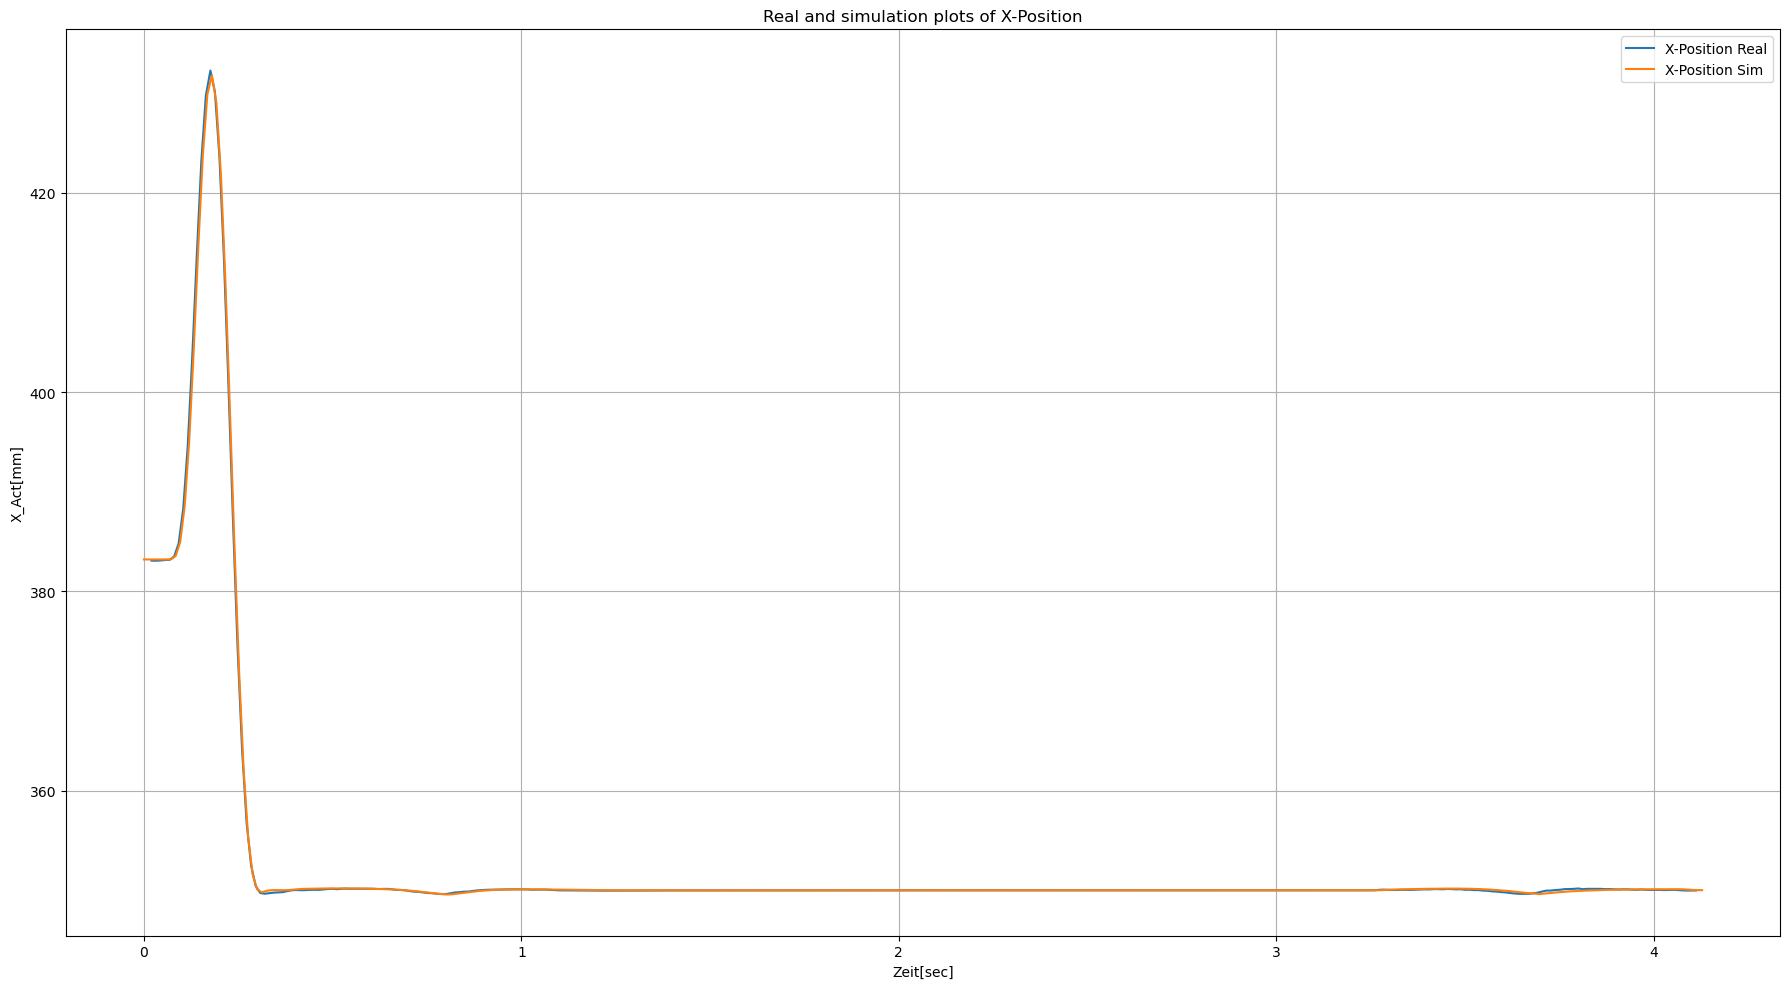

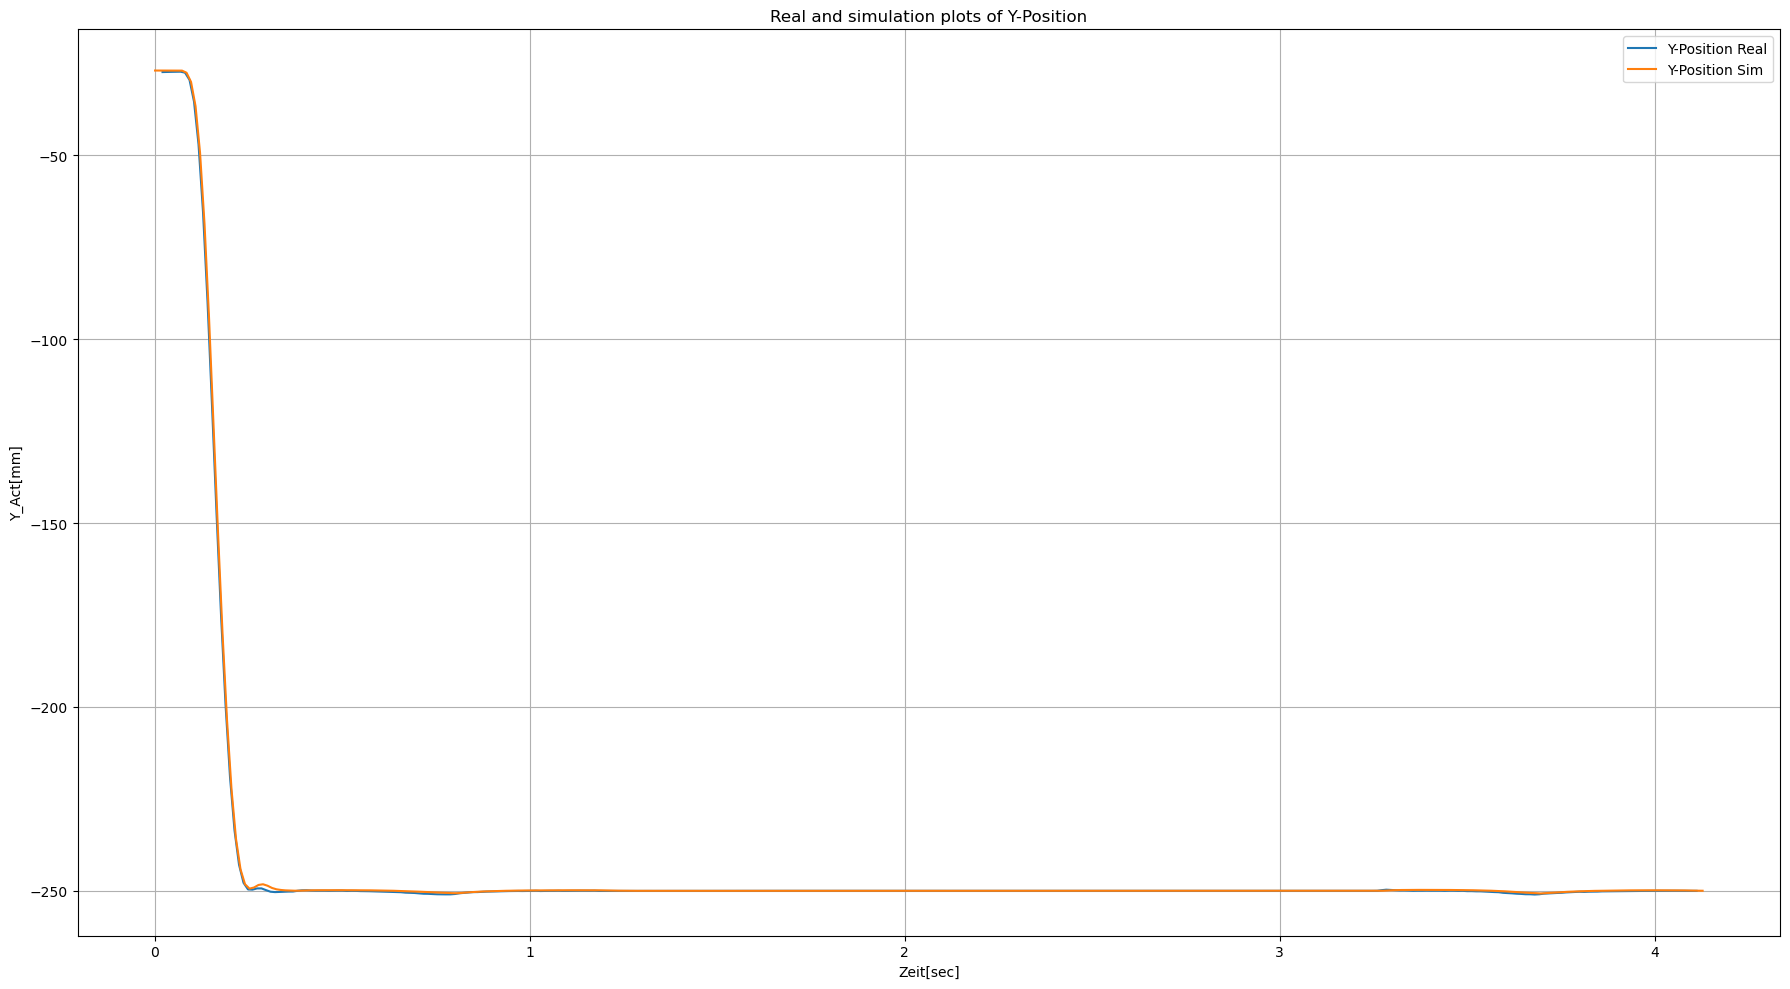

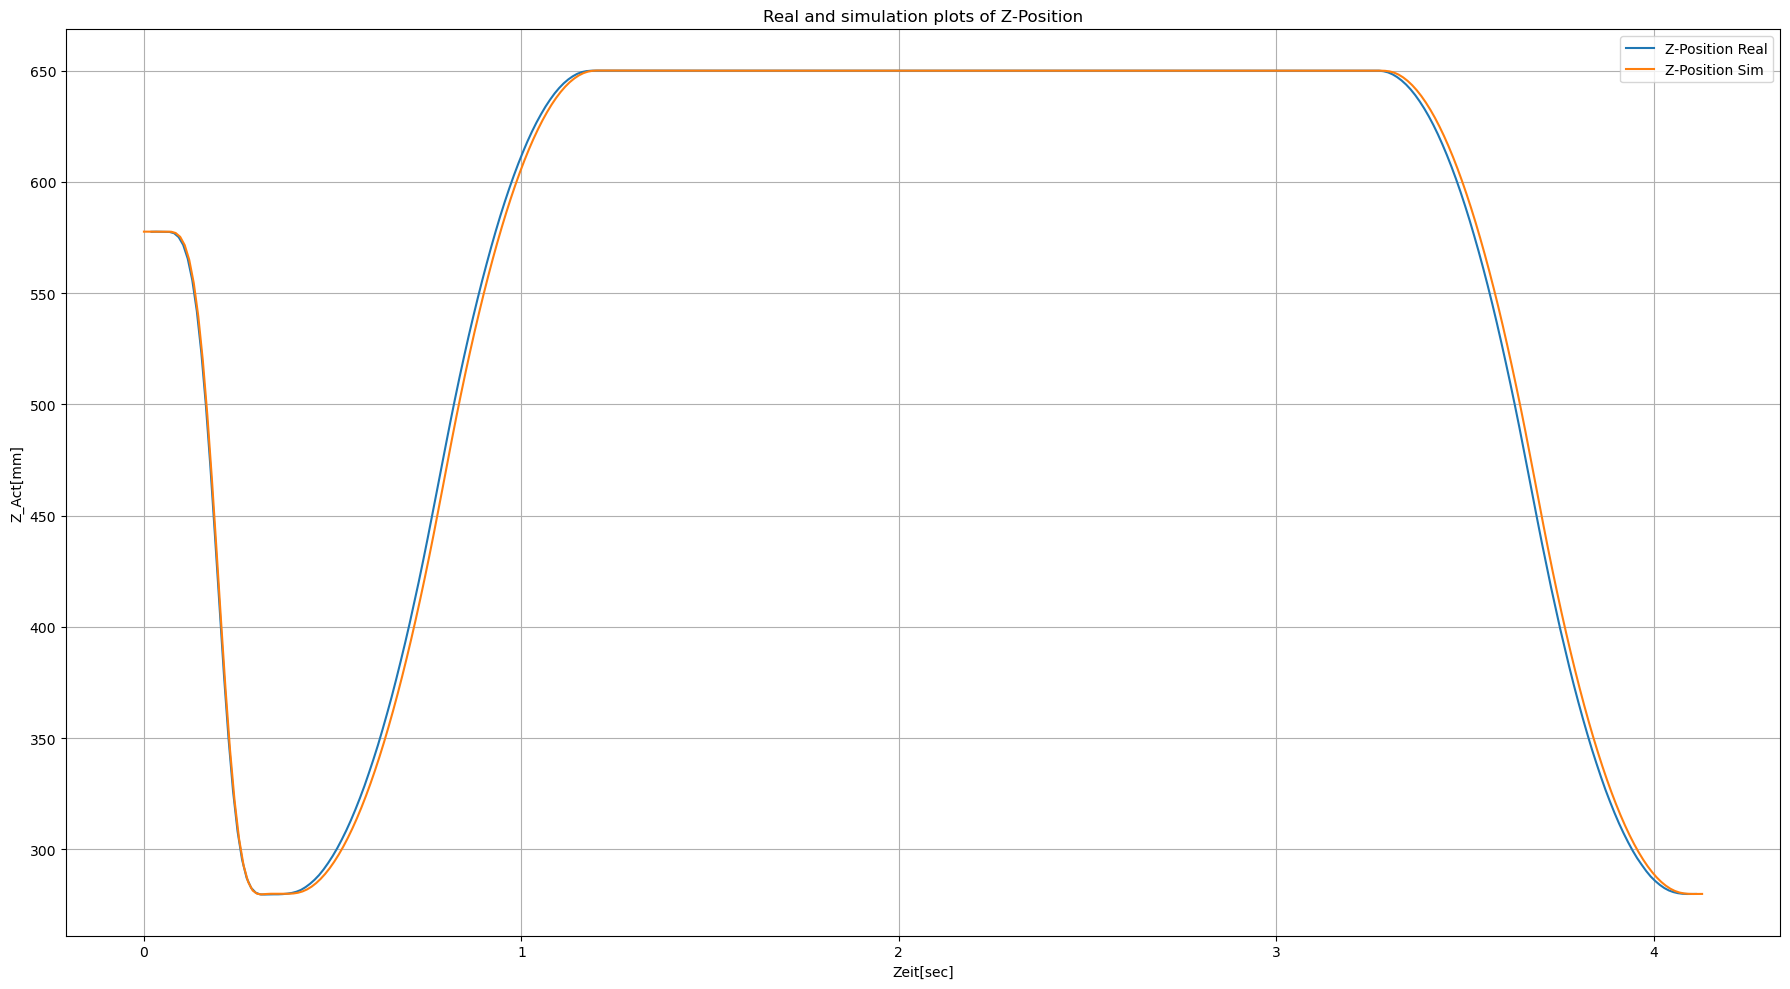

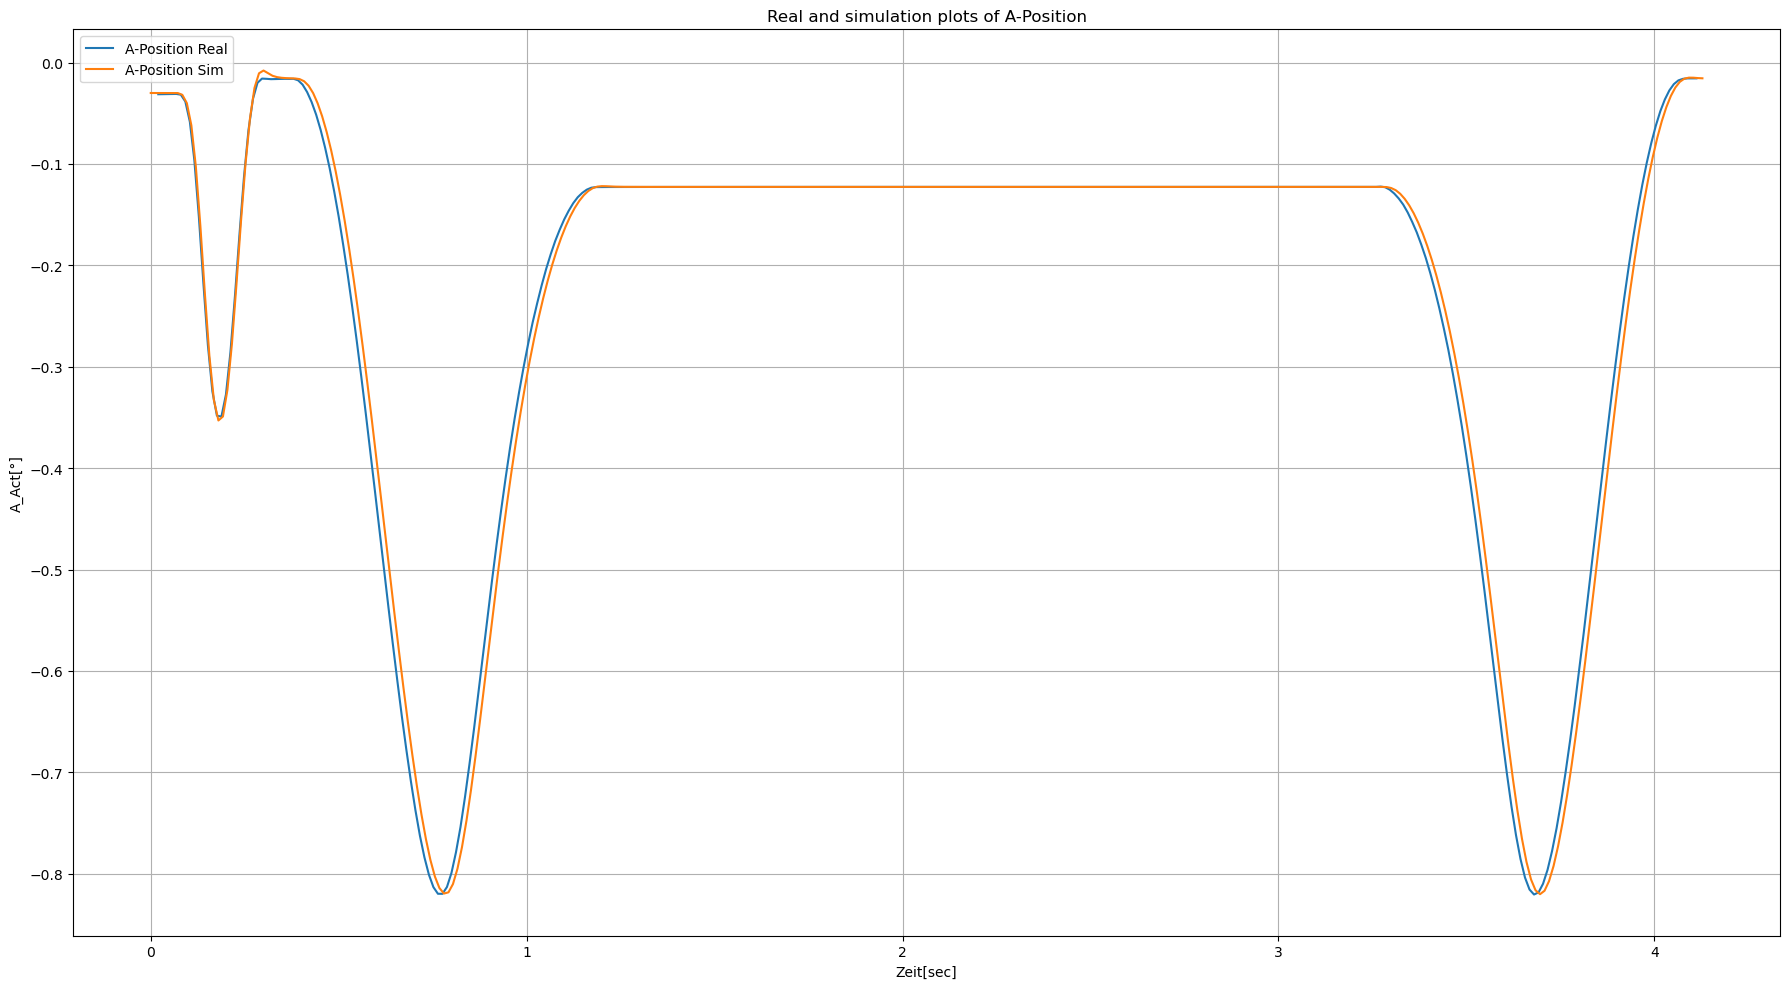

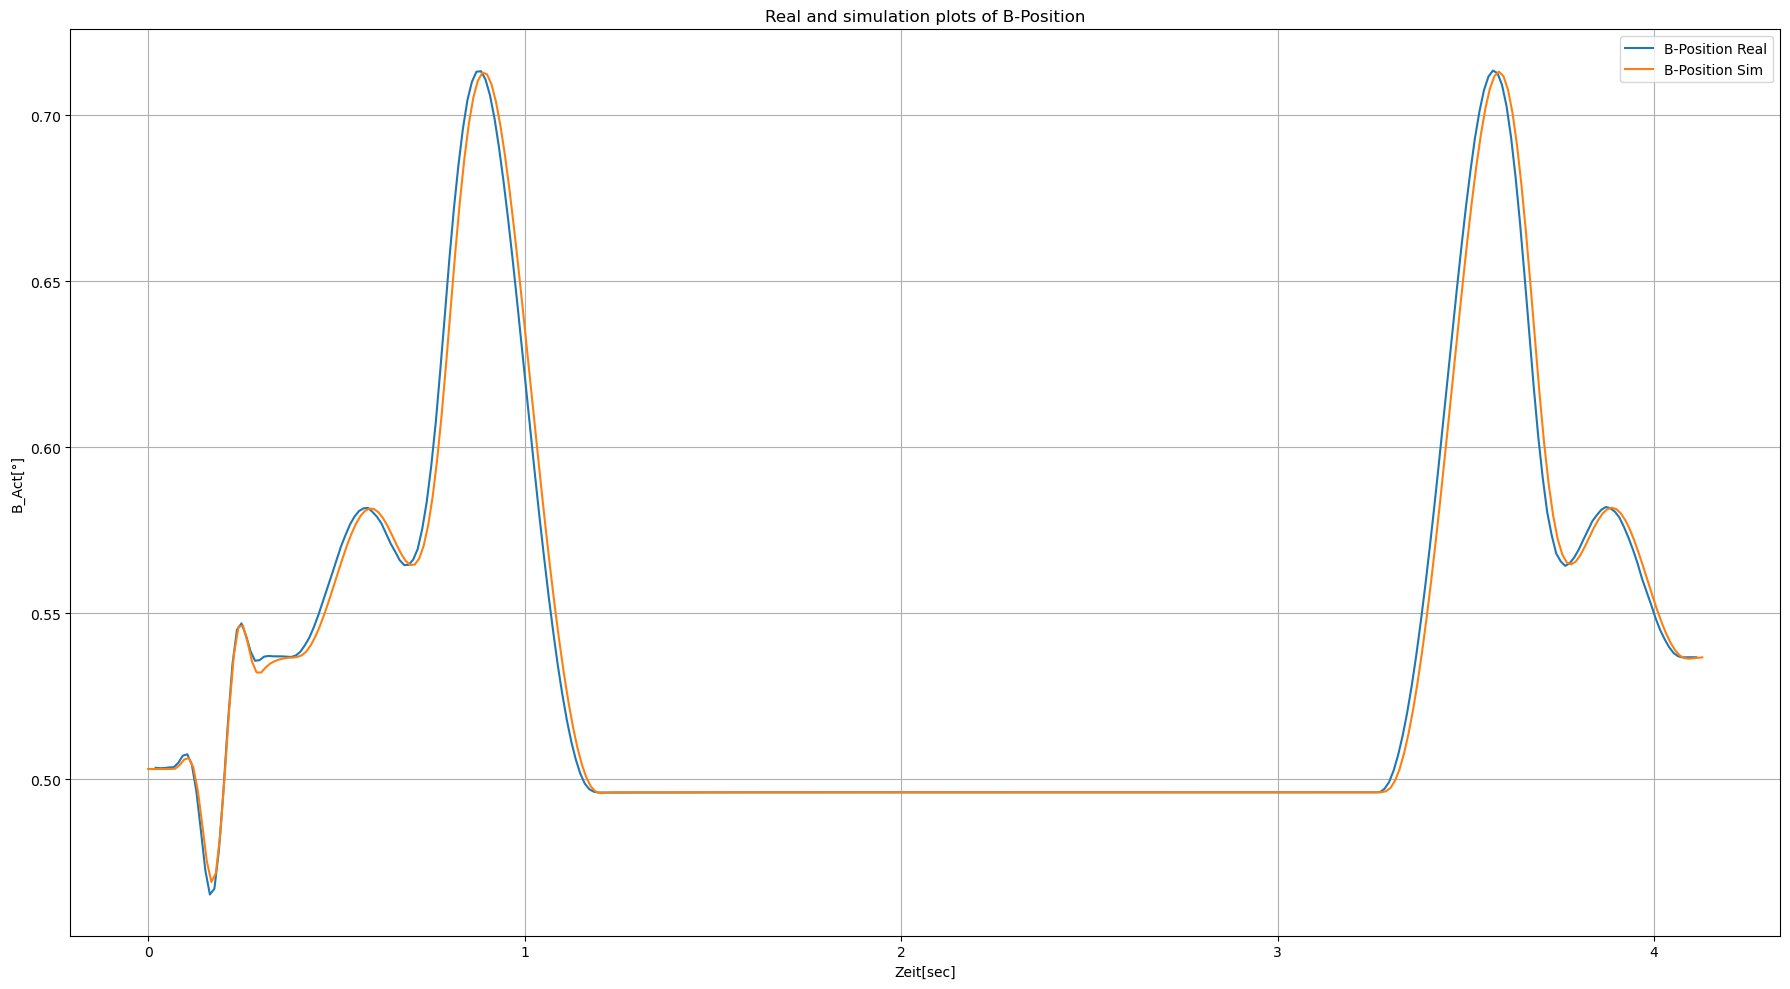

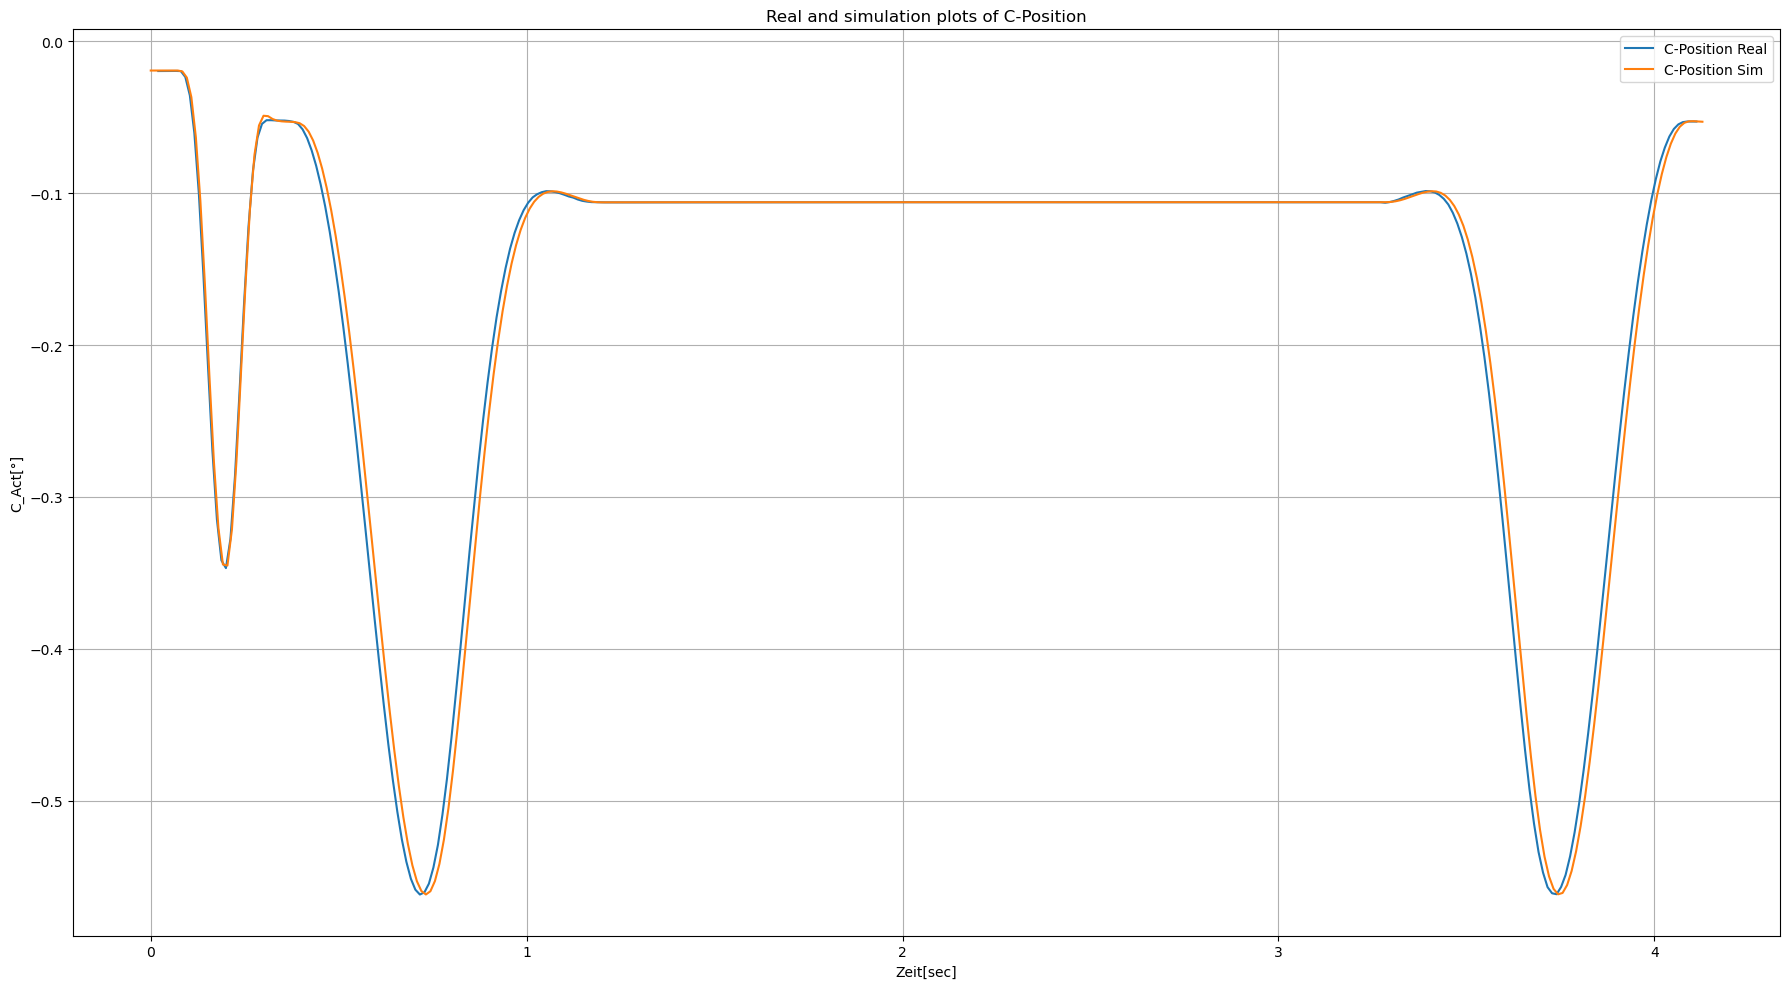

In [14]:
## Linear Vertical cartesian position
li_Linear_Real = []
li_Linear_Sim = []

if (len(fileNames_Linear_Real)==len(fileNames_Linear_Sim)):
    for i in range (len(fileNames_Linear_Real)):
        # vel = 40 - (i*10)
        df_Linear_Real = pd.read_csv(fileNames_Linear_Real[i], delimiter=';', encoding='cp1252')
        df_Linear_Sim = pd.read_csv(fileNames_Linear_Sim[i], delimiter=';', encoding='cp1252')  

        li_Linear_Real.append(df_Linear_Real)
        li_Linear_Sim.append(df_Linear_Sim)

        # print("Quadrilaterl - ", i+1)

        for j in range(6):
            if j < 3:
                a = j + 88
            else:
                a = j + 62

            pos_real = li_Linear_Real[i].columns[j+1]
            pos_sim = li_Linear_Sim[i].columns[j+1]

            label_real = chr(a) + '-Position Real'
            label_sim = chr(a) + '-Position Sim'

            time_Shift = li_Linear_Real[i]['Zeit[sec]'] + 0.02
            li_Linear_Real[i]['Zeit[sec]'] = time_Shift

            plt.figure(num=1, figsize=(18,10), dpi=100, tight_layout=True)
            plt.plot(li_Linear_Real[i]['Zeit[sec]'], li_Linear_Real[i][pos_real], label = label_real)
            plt.plot(li_Linear_Sim[i]['Zeit[sec]'], li_Linear_Sim[i][pos_sim], label = label_sim)
            plt.legend()
            plt.grid()
            plt.xlabel(li_Linear_Sim[i].columns[0])
            plt.ylabel(li_Linear_Sim[i].columns[j+1])
            plt.title('Real and simulation plots of ' + chr(a) + '-Position')
            # if not os.path.exists('Images/Linear'):
            #     os.makedirs('Images/Linear')
            # plt.savefig('Images/Linear/' + chr(a) + '-Pos Rect ' + str(i+1) + '.jpg')
            plt.show()
            plt.close()

            time_Shift = li_Linear_Real[i]['Zeit[sec]'] - 0.02
            li_Linear_Real[i]['Zeit[sec]'] = time_Shift


Plot comparison of Cartesain Velocity for Real robot and simulation

C:\Users\chatt\AppData\Local\Temp/ipykernel_31112/3932860397.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  li_Linear_Real[i]['Zeit[sec]'] = time_Shift


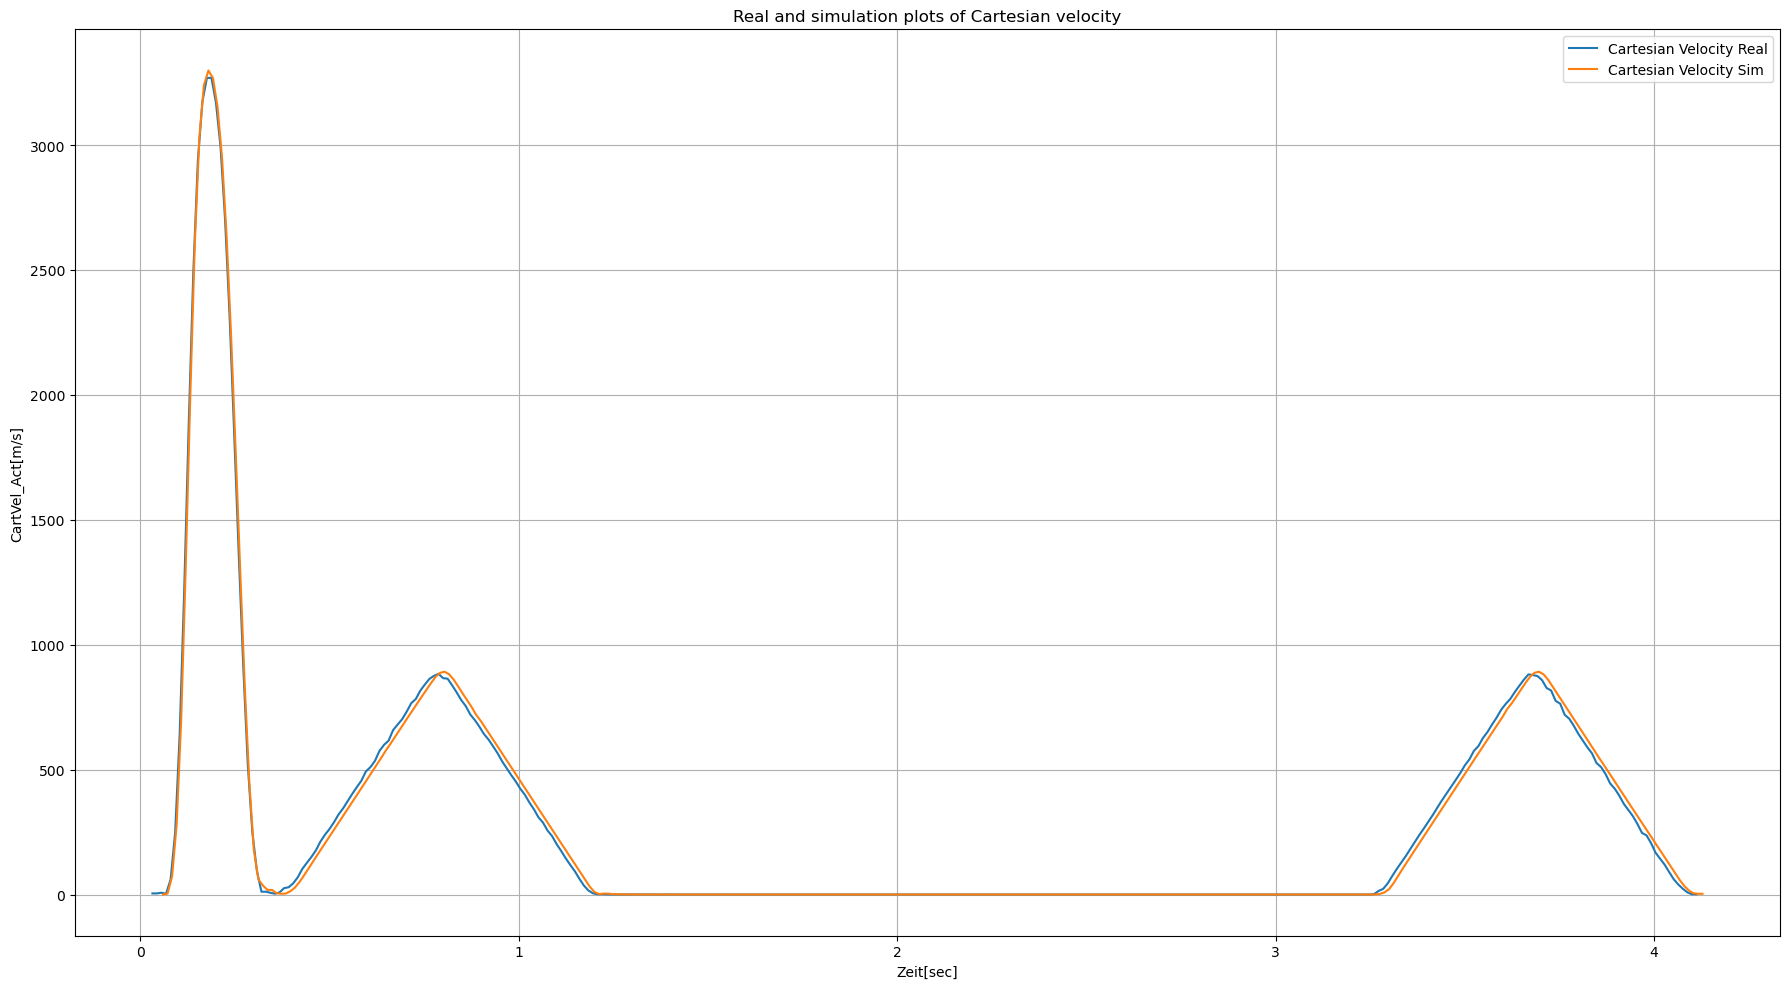

C:\Users\chatt\AppData\Local\Temp/ipykernel_31112/3932860397.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  li_Linear_Real[i]['Zeit[sec]'] = time_Shift


In [15]:
## Cartesian Velocity comparison Real and Simulation
li_Linear_Real = []
li_Linear_Sim = []
if(len(fileNames_Linear_Real) == len(fileNames_Linear_Sim)):
    for i in range(len(fileNames_Linear_Real)):
        df_Linear_Real = pd.read_csv(fileNames_Linear_Real[i], delimiter=';', encoding='cp1252')
        df_Linear_Sim = pd.read_csv(fileNames_Linear_Sim[i], delimiter=';', encoding='cp1252')
        li_Linear_Real.append(df_Linear_Real.iloc[1:,:])
        li_Linear_Sim.append(df_Linear_Sim.iloc[5:,:])

        # vel = 40 - (i*10)
        # print('Quadrilateral - ', i+1)

        pos_real = li_Linear_Real[i].columns[21]
        pos_sim = li_Linear_Sim[i].columns[21]

        time_Shift = li_Linear_Real[i]['Zeit[sec]'] + 0.02
        li_Linear_Real[i]['Zeit[sec]'] = time_Shift

        plt.figure(num=1, figsize=(18,10), dpi=100, tight_layout=True)
        plt.plot(li_Linear_Real[i]['Zeit[sec]'], li_Linear_Real[i][pos_real], label = 'Cartesian Velocity Real')
        plt.plot(li_Linear_Sim[i]['Zeit[sec]'], li_Linear_Sim[i][pos_sim], label = 'Cartesian Velocity Sim')

        plt.legend()
        plt.grid()
        plt.xlabel(li_Linear_Sim[i].columns[0])
        plt.ylabel(li_Linear_Sim[i].columns[21])
        plt.title('Real and simulation plots of Cartesian velocity')
        # if not os.path.exists('Images/Linear'):
        #     os.makedirs('Images/Linear')
        # plt.savefig('Images/Linear/Cartesian Velocity Quad ' + str(i+1) + '.jpg')
        plt.show()
        plt.close()

        time_Shift = li_Linear_Real[i]['Zeit[sec]'] - 0.02
        li_Linear_Real[i]['Zeit[sec]'] = time_Shift